In [1]:
import numpy as np
import cv2 

In [2]:
import keras

Using TensorFlow backend.


In [3]:
from keras.models import Model,Sequential
from keras.layers import Lambda, Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, GaussianNoise, Input, Dropout, concatenate
from keras import optimizers
from keras.preprocessing.image import img_to_array
from sklearn.metrics import accuracy_from __future__ import print_function
import numpy as np
import pandas as pd

import os
batch_size = 64
epochs = 50
import keras
from PIL import Image
from keras.models import Model
# from keras.applications import ResNet50
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.layers import Lambda, Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, GaussianNoise, Input
from keras.layers import concatenate,GlobalAveragePooling2D, AveragePooling2D
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils
from keras.datasets import mnist
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
from keras import backend as K


input_shape = (28,28,1)

# cnn_extractor = ResNet50(weights='imagenet',include_top=False, input_shape= input_shape)

def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj,
                     name=None):

    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)
    # conv_1 = Conv2D(filters_1x1, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_1)

    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu')(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_5x5 = Conv2D(filters_5x5, (3, 3), padding='same', activation='relu')(conv_5x5)

    pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same')(pool_proj)

    output = concatenate([x,conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)

    return output

input_layer = Input(shape=input_shape)

x = Conv2D(32, (5, 5), padding='same', strides=(1, 1), activation='relu')(input_layer)
x = Conv2D(32, (5, 5), padding='same', strides=(1, 1), activation='relu')(x)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2))(x)

x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu')(x)
x = Conv2D(64, (3, 3), padding='same', strides=(1, 1), activation='relu')(x)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2))(x)

x = Conv2D(128, (3, 3), padding='same', strides=(1, 1), activation='relu')(x)
x = Conv2D(128, (3, 3), padding='same', strides=(1, 1), activation='relu')(x)

x = Dropout(0.5)(x)
x = Flatten()(x)

x = Dropout(0.5)(x)
x = LeakyReLU()(x)
x = Dense(1048)(x)
x = Dropout(0.5)(x)
x = LeakyReLU()(x)
x = Dense(10, activation='softmax')(x)

model = Model(input_layer, x)
model.summary()

score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import keras.backend as K
from keras.backend import tf as ktf

In [4]:
def resize(img, dim, aspectRatio = True):
    if aspectRatio:
        old_size = img.shape[:2]
        ratio = min(float(dim[0])/float(img.shape[0]), float(dim[1])/float(img.shape[1]))
        d1 = int(img.shape[1]*ratio)
        d0 = int(img.shape[0]*ratio)
        img = cv2.resize(img, (d1,d0) )

        delta_w = dim[1] - d1
        delta_h = dim[0] - d0
        top, bottom = delta_h//2, delta_h-(delta_h//2)
        left, right = delta_w//2, delta_w-(delta_w//2)

        color = [0, 0, 0]
        new_im = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
        return new_im
    return cv2.resize(img, (dim[1],dim[0]))

In [5]:
weight_dir = "../q1/q1_2_2/mnist/"

In [101]:
model.load_weights(weight_dir + "mnist.h5")

img=np.load('x_test.npy')[:6]
# np.save('test_line_3.npy',img)
#img  = cv2.imread("xyz.jpg")
#img   = resize(img, (28,28))


In [23]:
layer_outputs = [layer.output for layer in model.layers[1:3]]
layer_outputs1 = [layer.output for layer in model.layers[5:11]]

layer_outputs = layer_outputs+layer_outputs1 

In [24]:
activation_model = Model(inputs=model.input, outputs=layer_outputs)

In [25]:
a = activation_model.predict(img)

In [26]:
a[1].shape


(6, 28, 28, 32)

In [27]:
len(a)
a[0].shape

(6, 28, 28, 32)

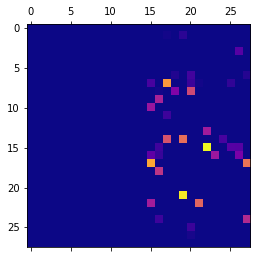

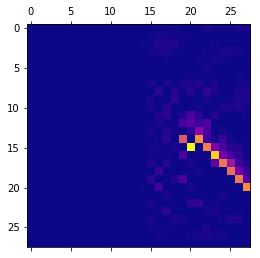

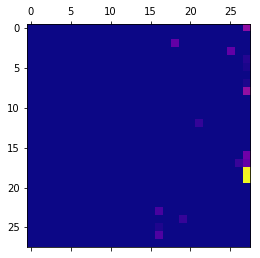

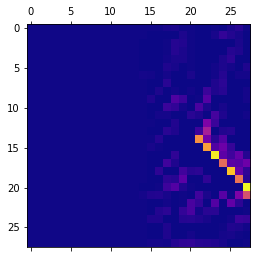

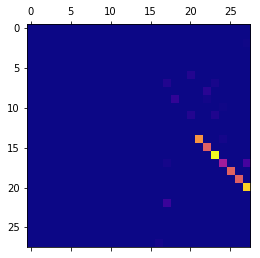

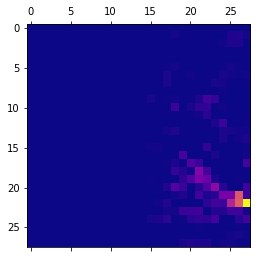

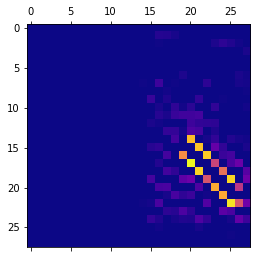

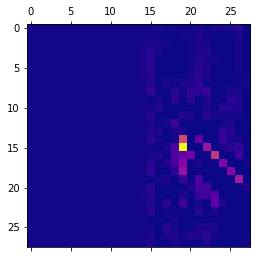

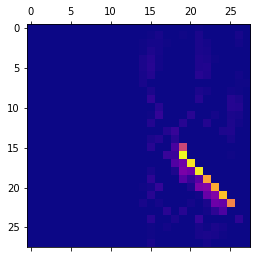

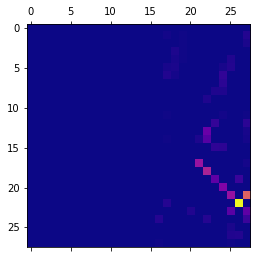

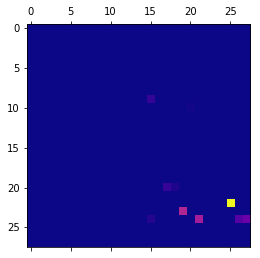

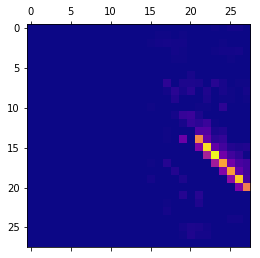

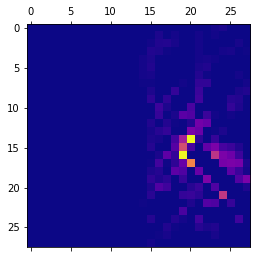

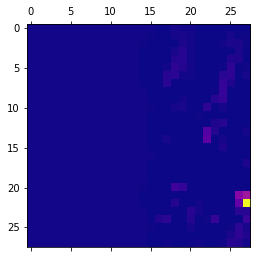

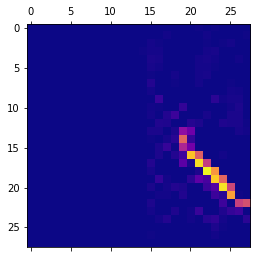

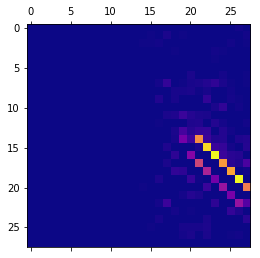

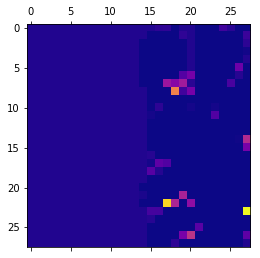

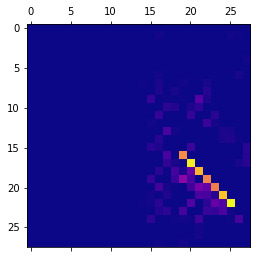

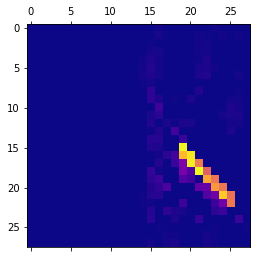

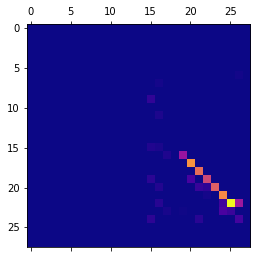

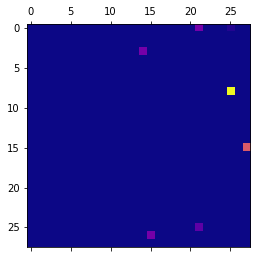

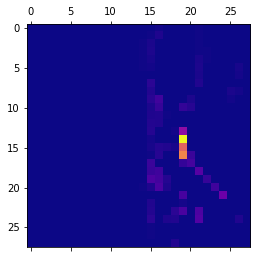

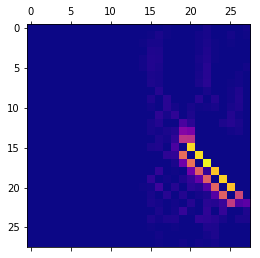

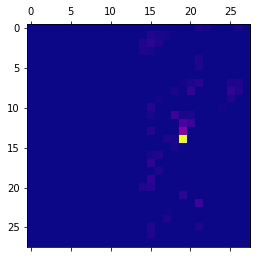

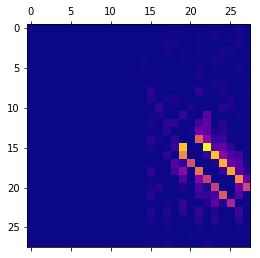

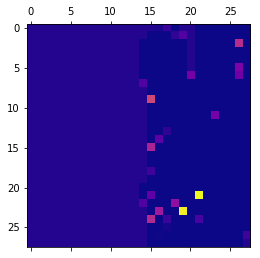

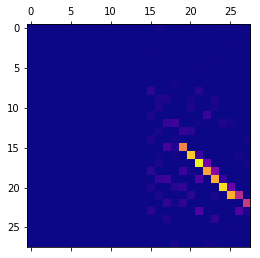

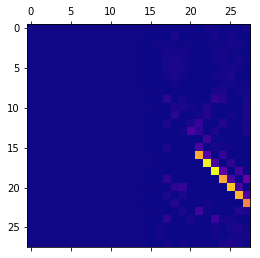

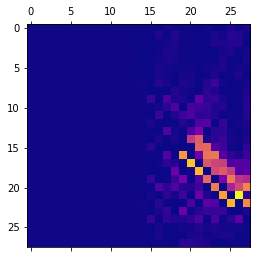

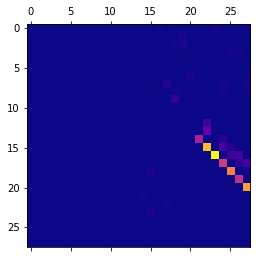

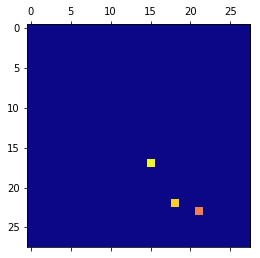

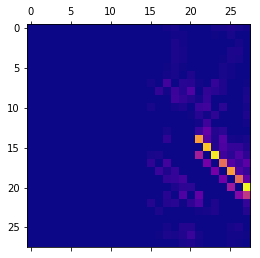

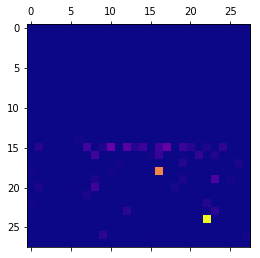

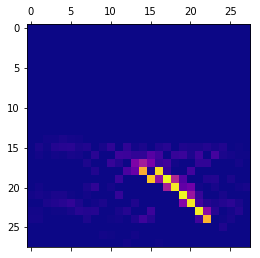

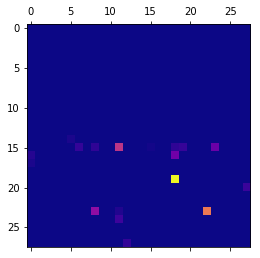

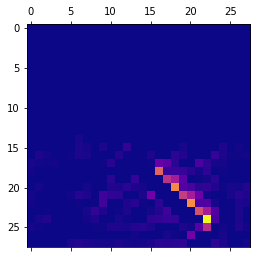

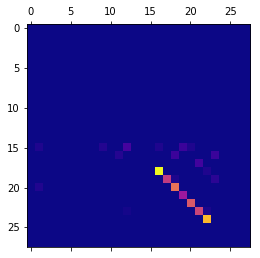

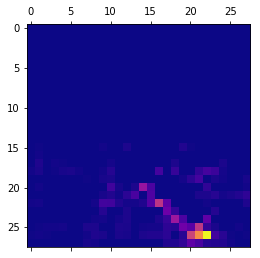

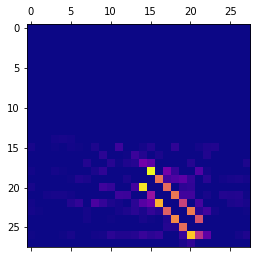

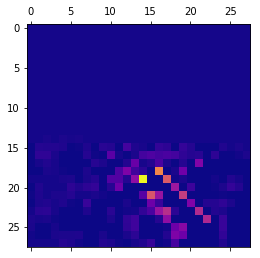

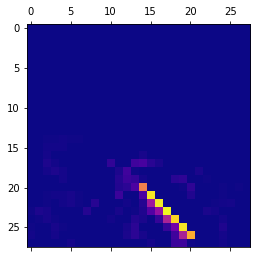

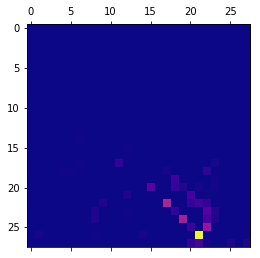

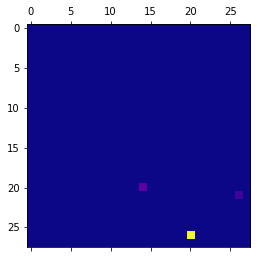

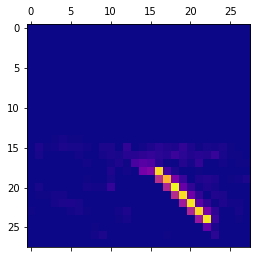

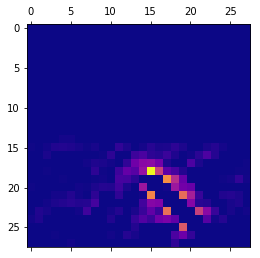

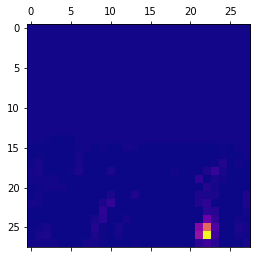

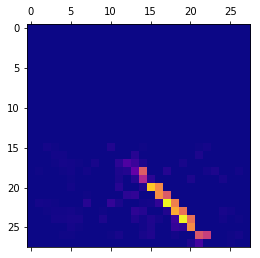

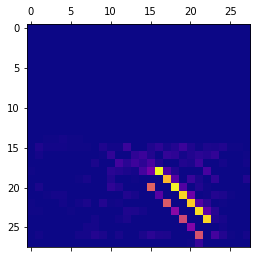

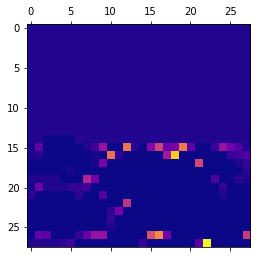

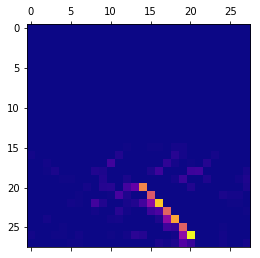

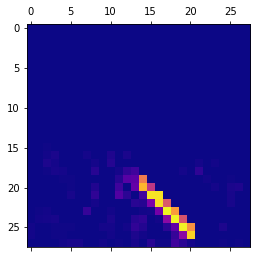

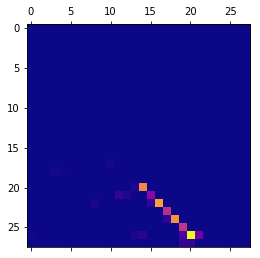

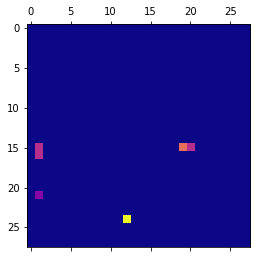

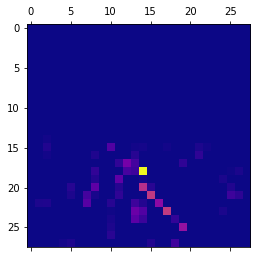

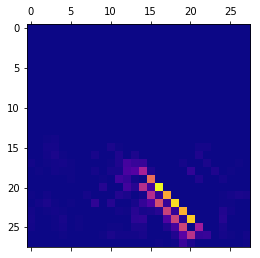

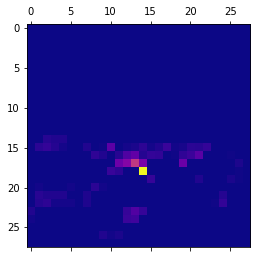

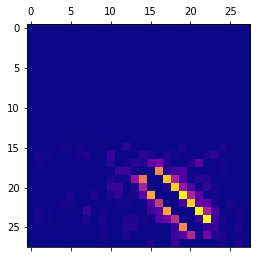

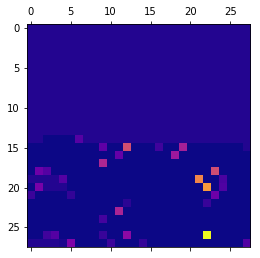

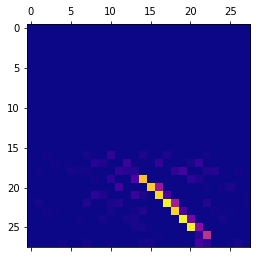

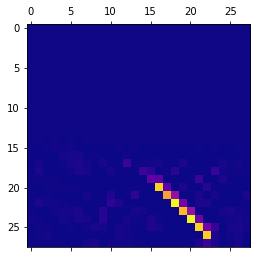

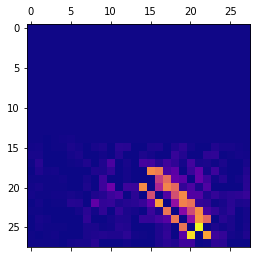

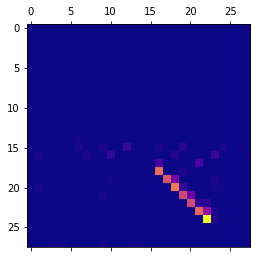

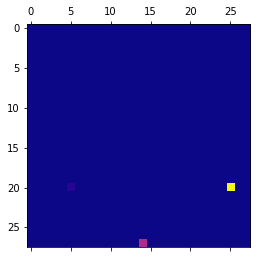

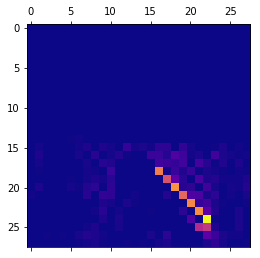

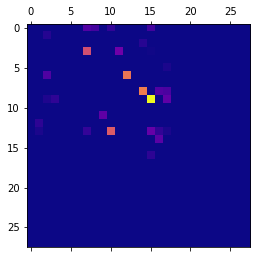

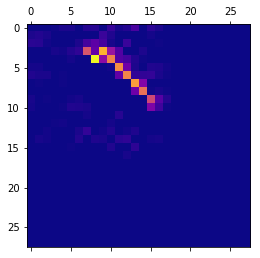

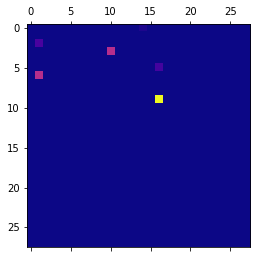

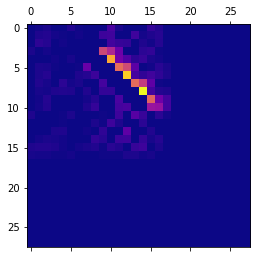

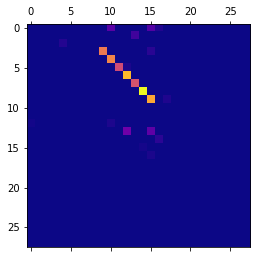

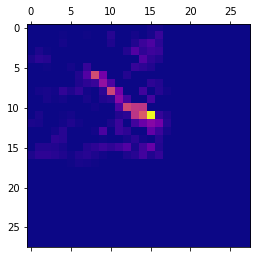

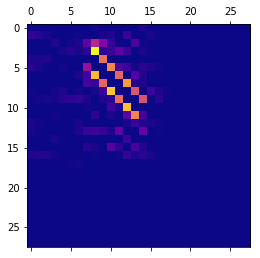

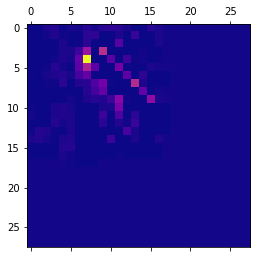

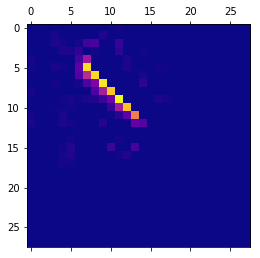

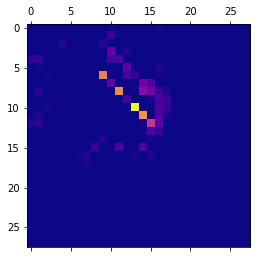

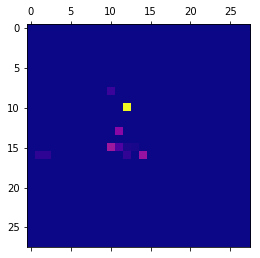

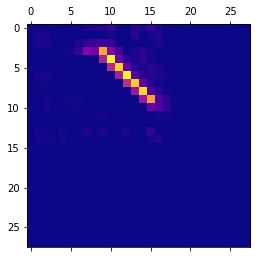

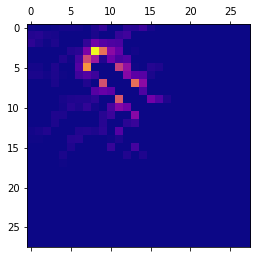

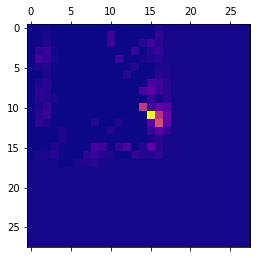

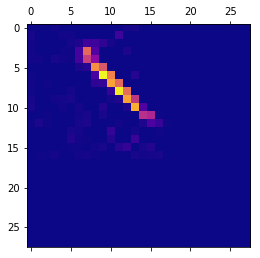

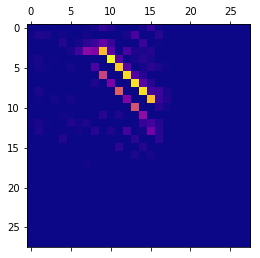

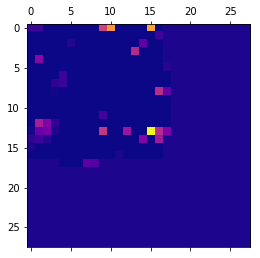

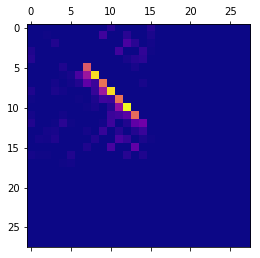

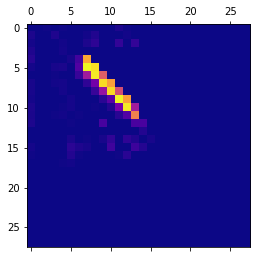

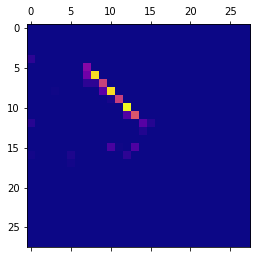

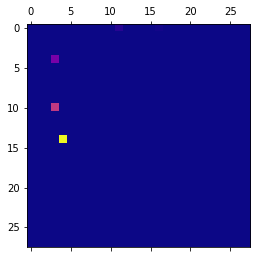

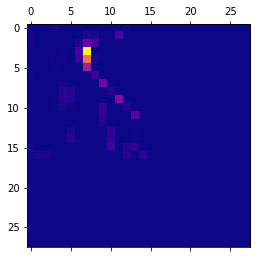

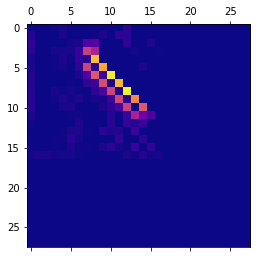

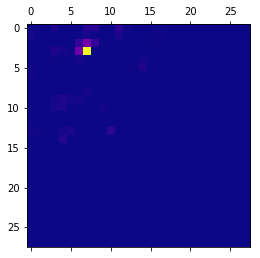

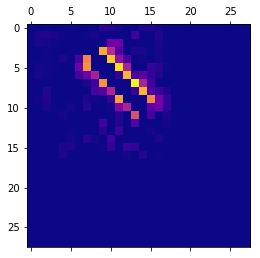

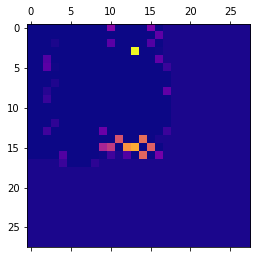

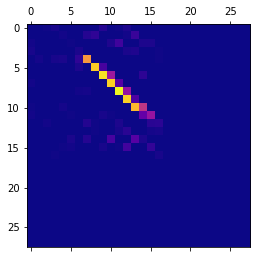

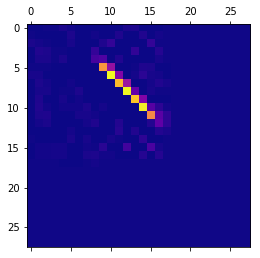

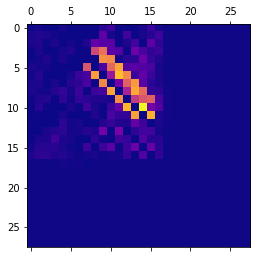

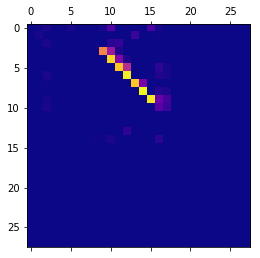

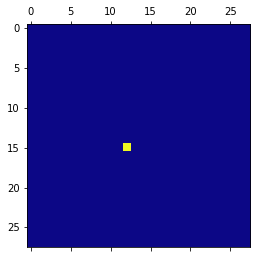

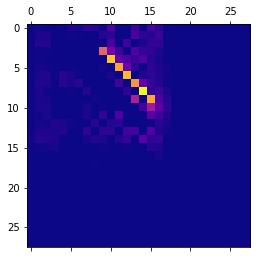

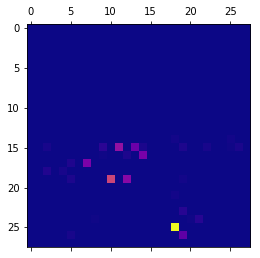

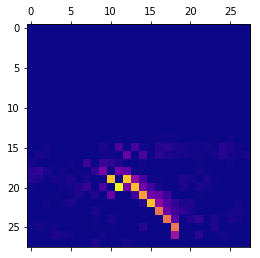

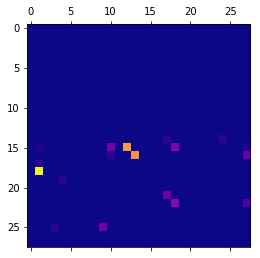

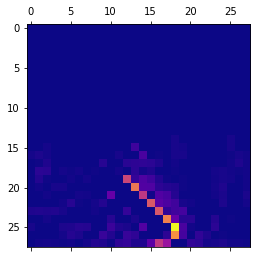

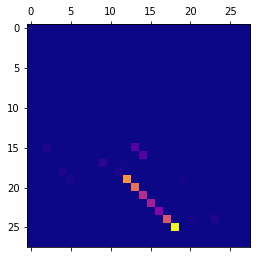

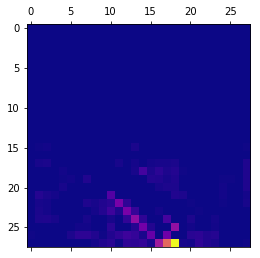

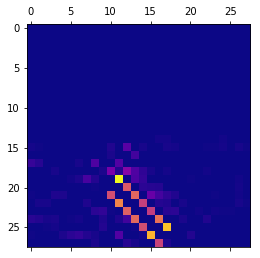

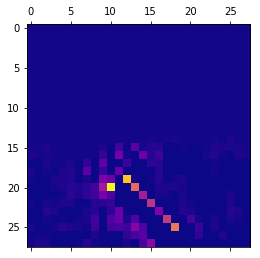

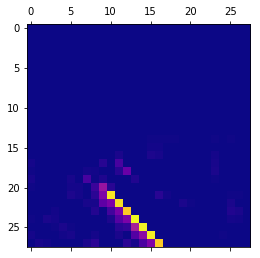

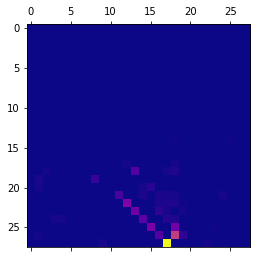

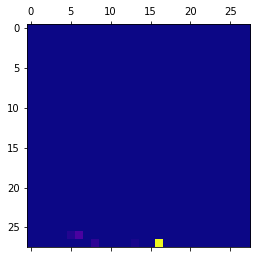

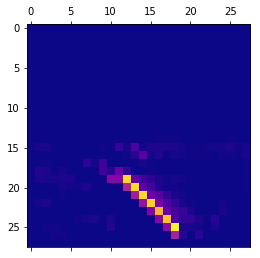

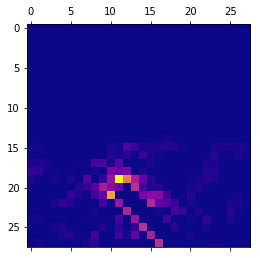

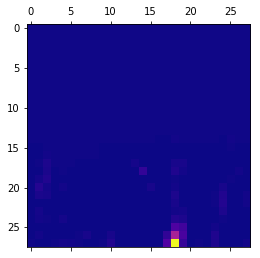

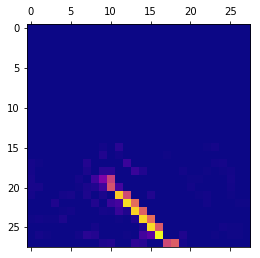

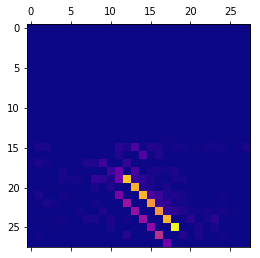

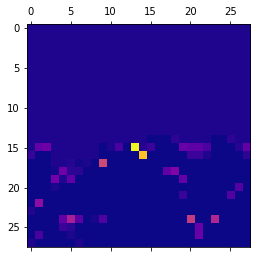

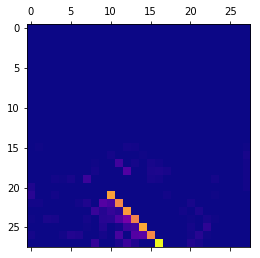

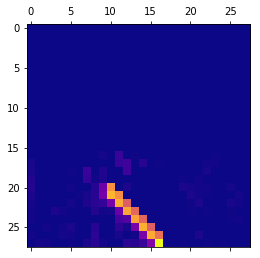

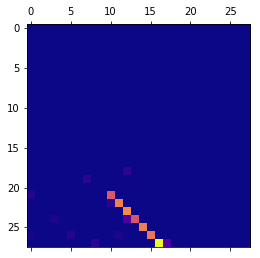

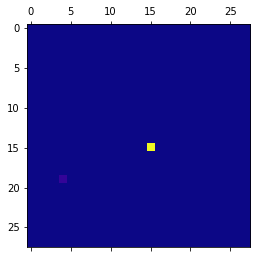

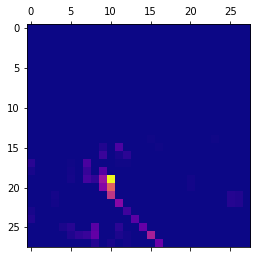

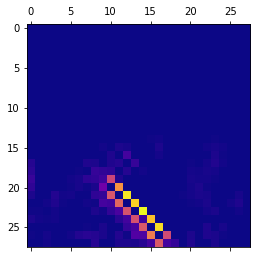

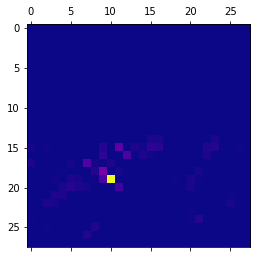

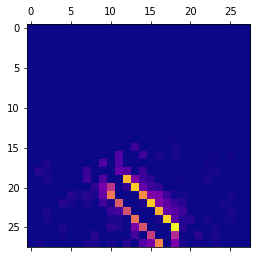

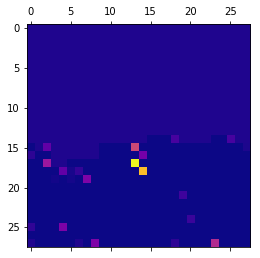

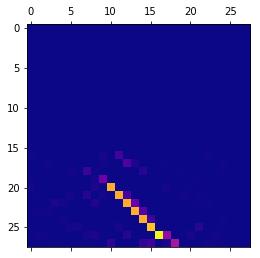

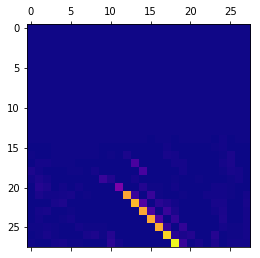

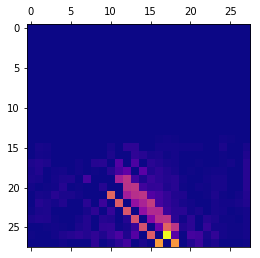

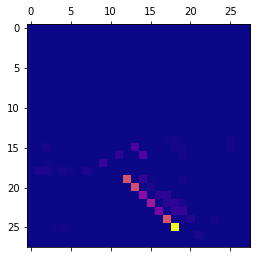

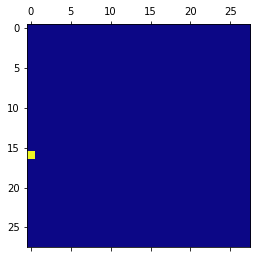

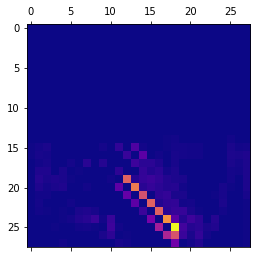

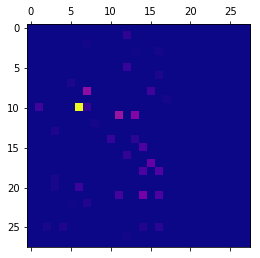

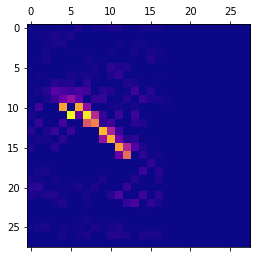

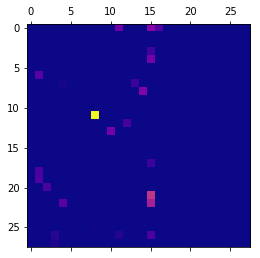

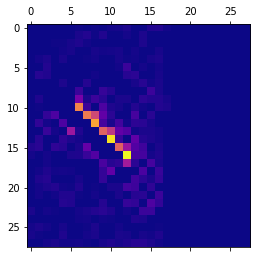

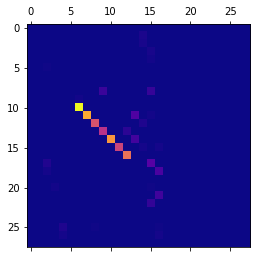

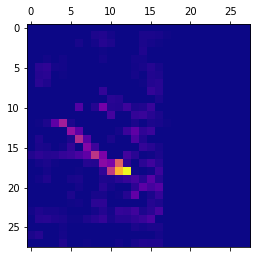

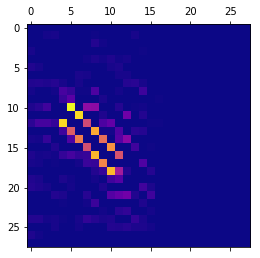

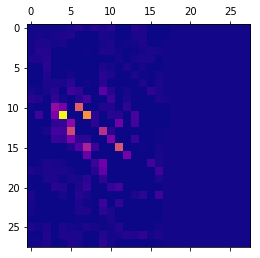

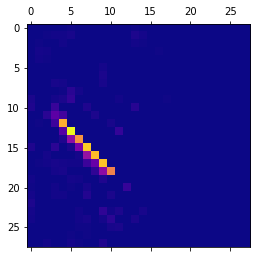

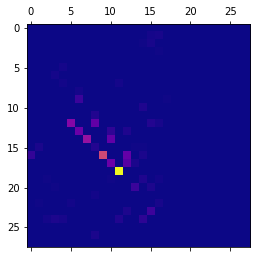

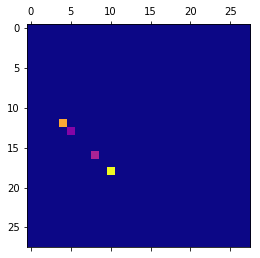

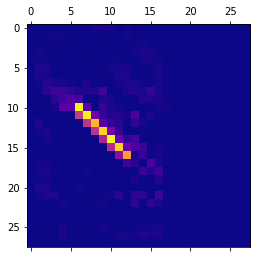

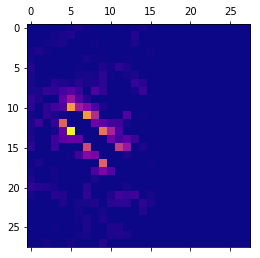

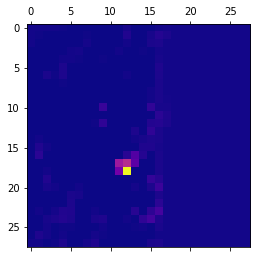

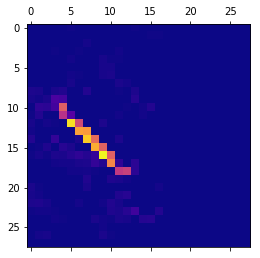

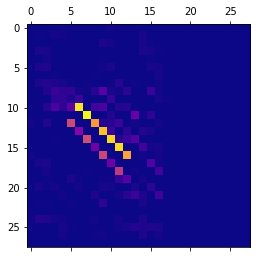

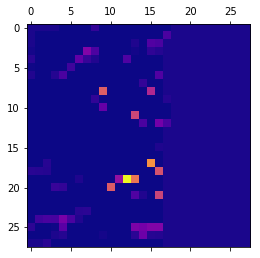

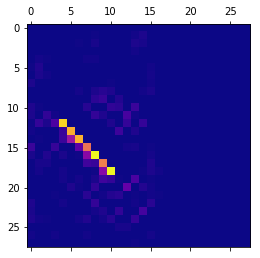

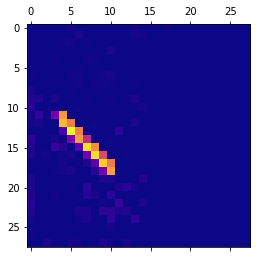

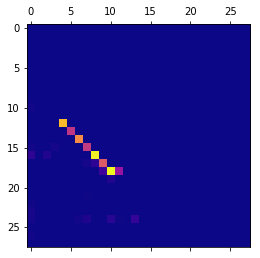

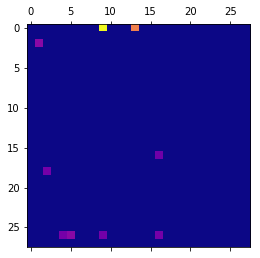

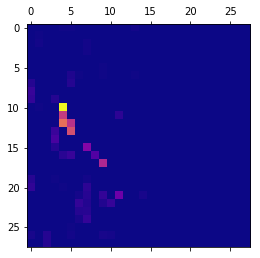

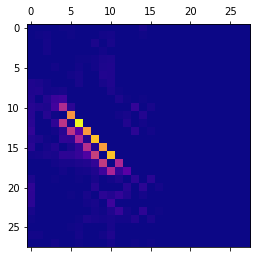

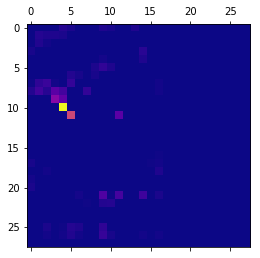

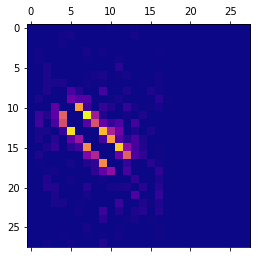

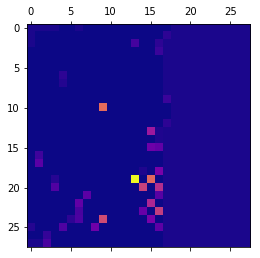

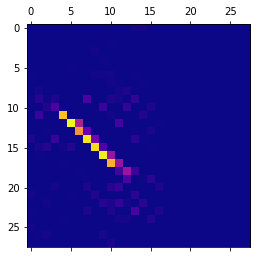

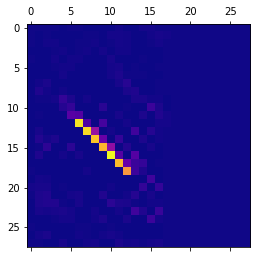

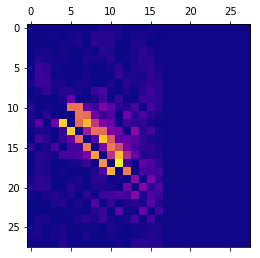

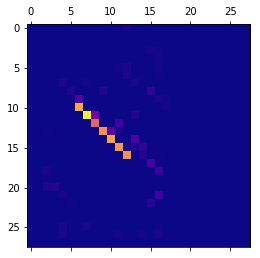

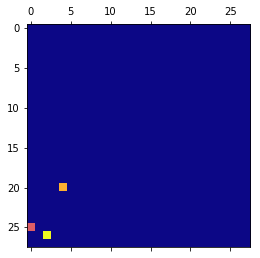

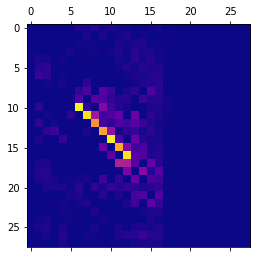

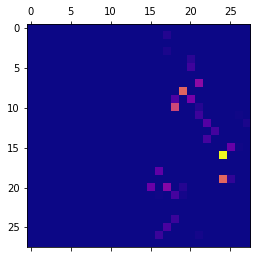

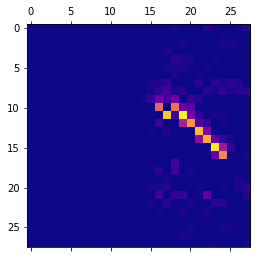

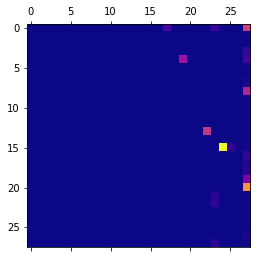

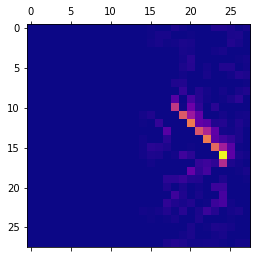

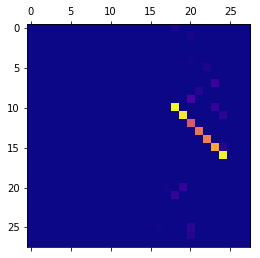

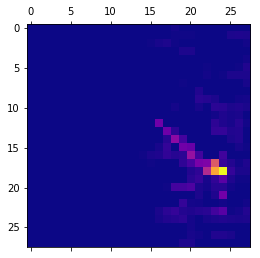

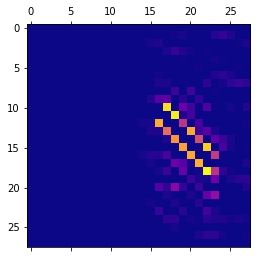

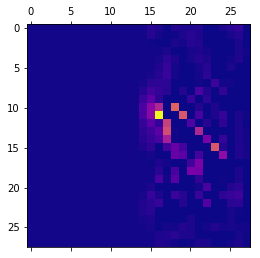

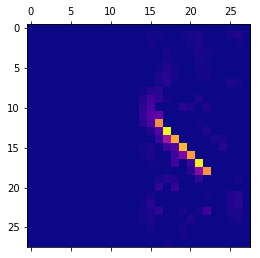

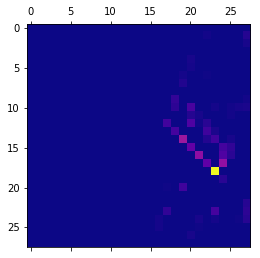

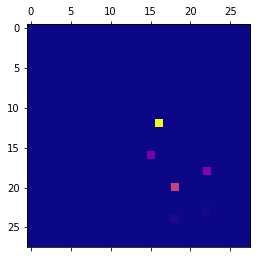

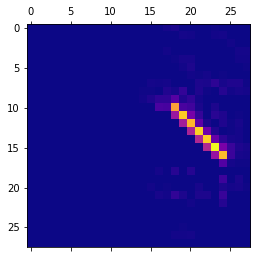

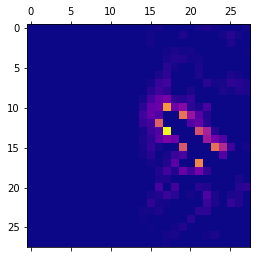

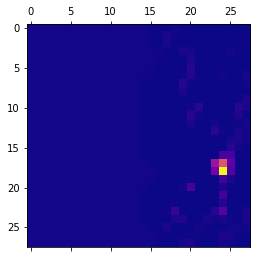

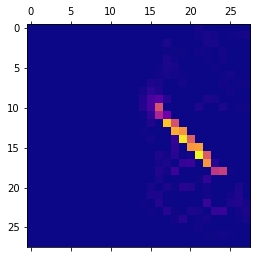

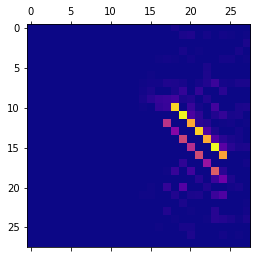

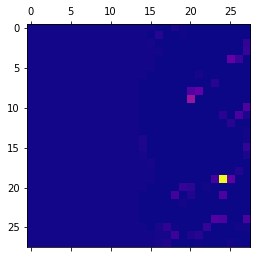

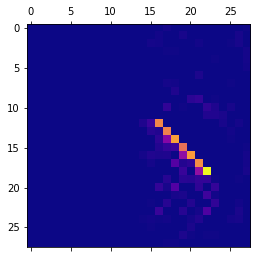

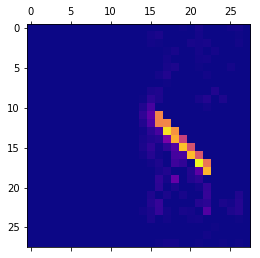

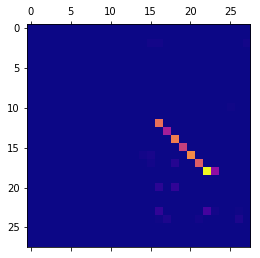

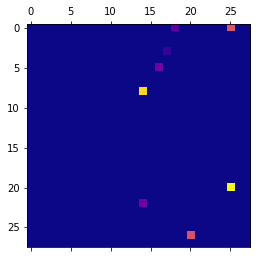

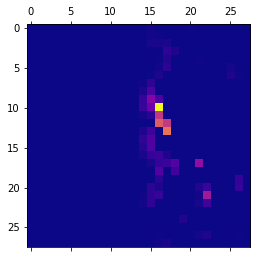

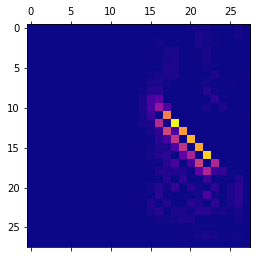

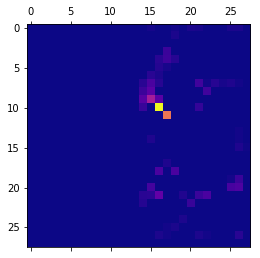

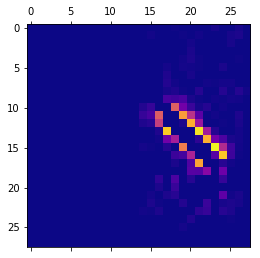

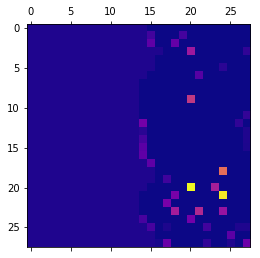

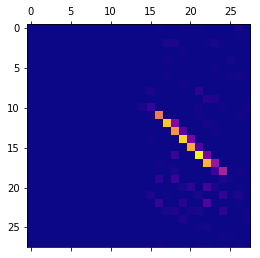

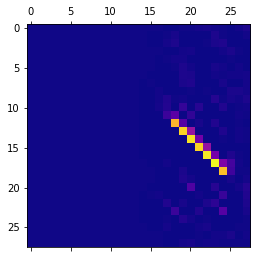

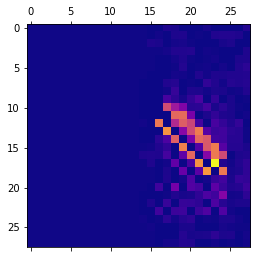

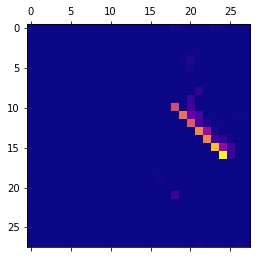

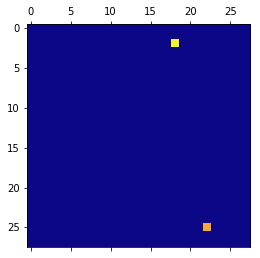

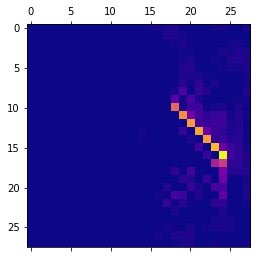

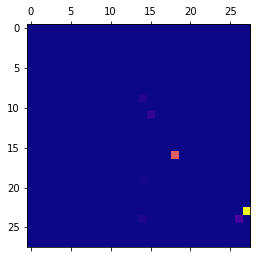

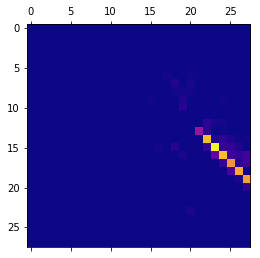

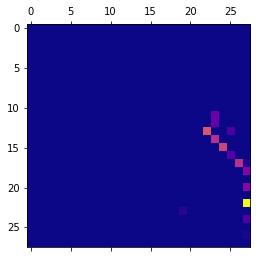

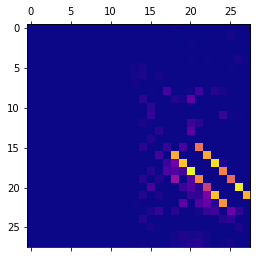

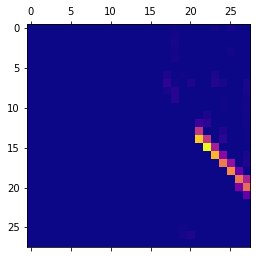

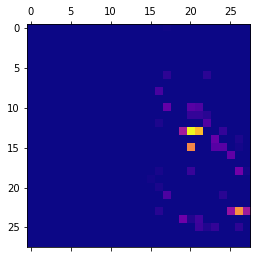

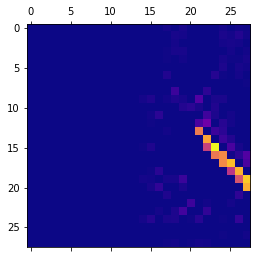

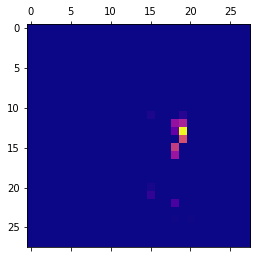

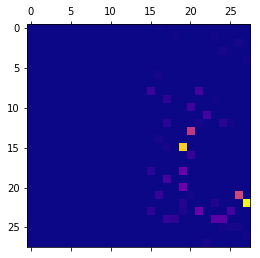

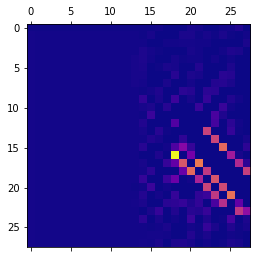

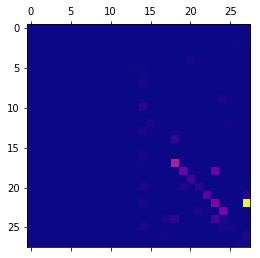

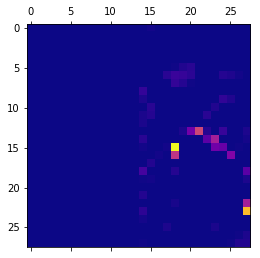

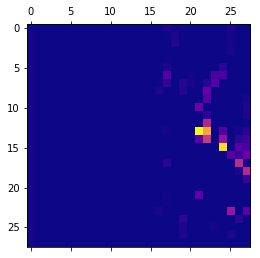

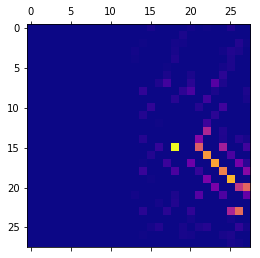

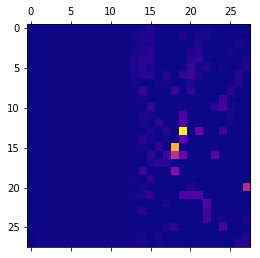

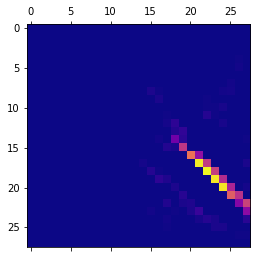

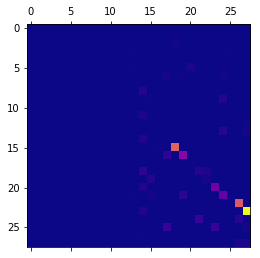

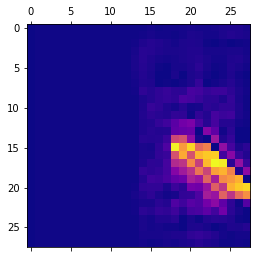

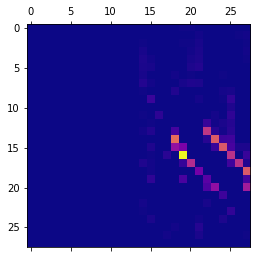

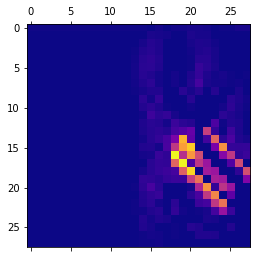

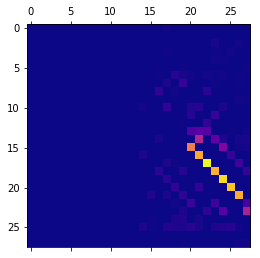

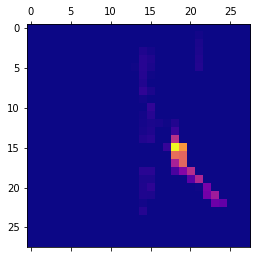

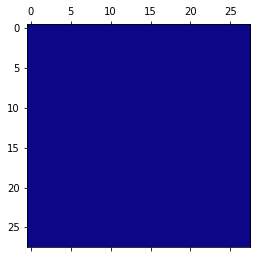

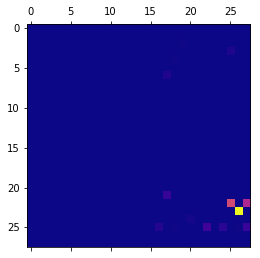

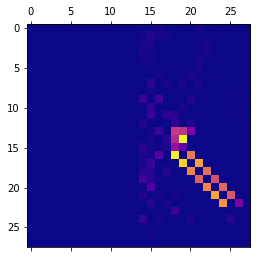

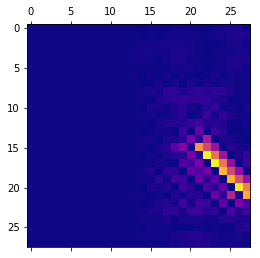

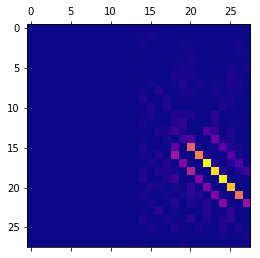

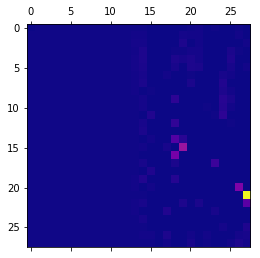

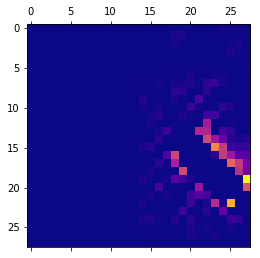

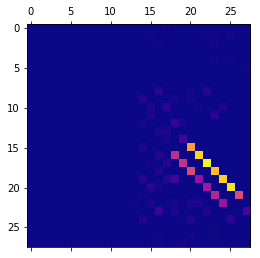

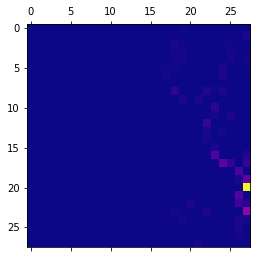

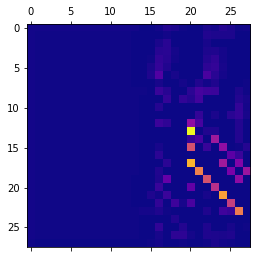

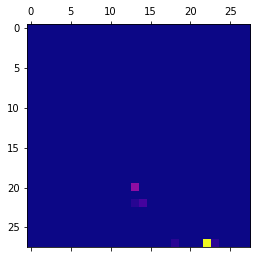

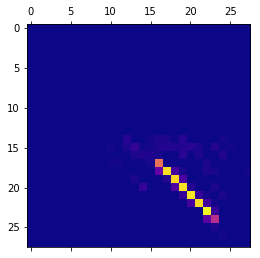

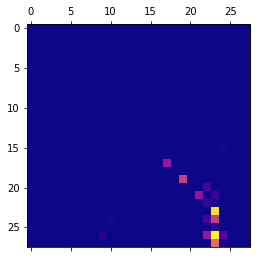

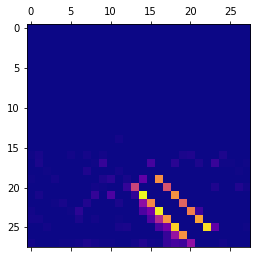

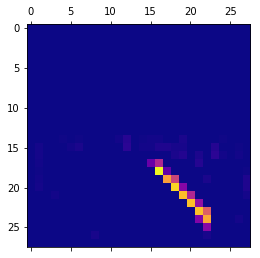

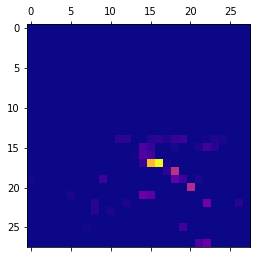

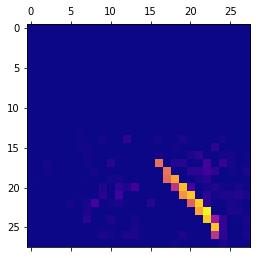

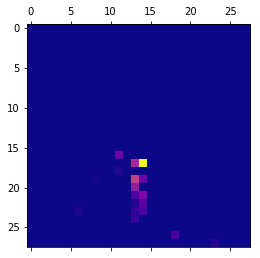

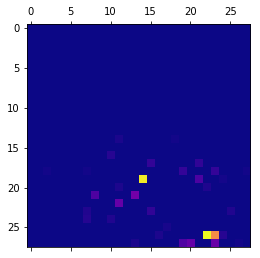

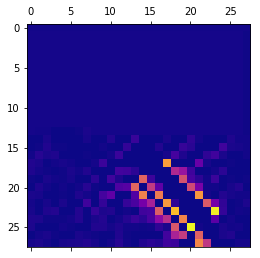

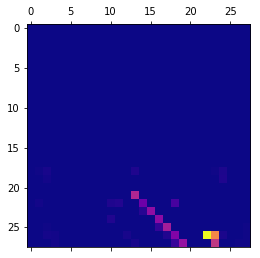

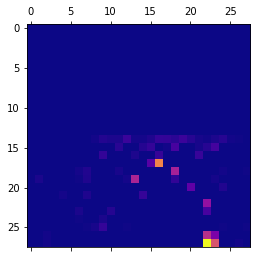

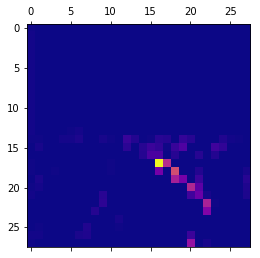

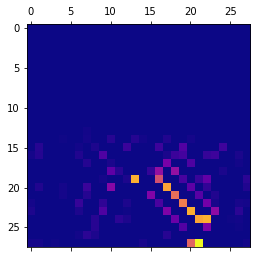

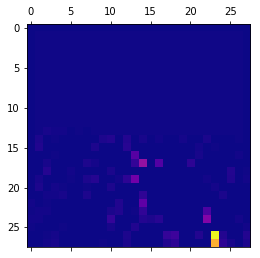

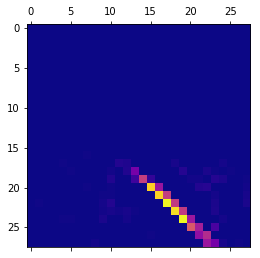

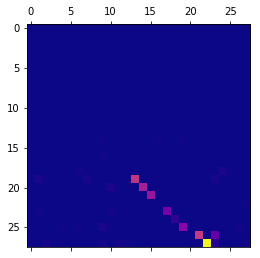

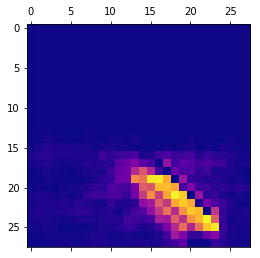

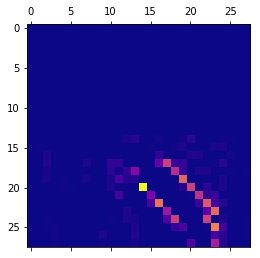

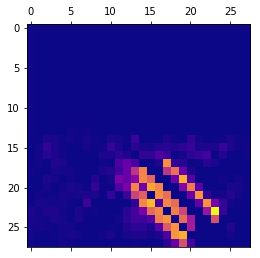

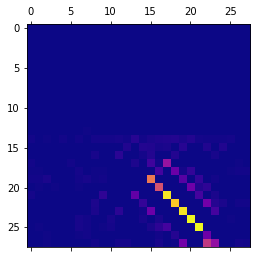

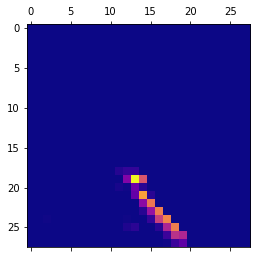

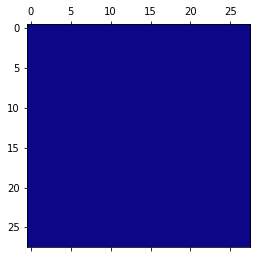

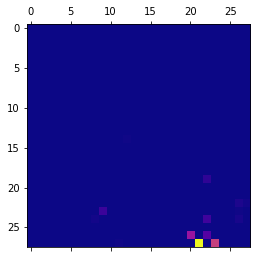

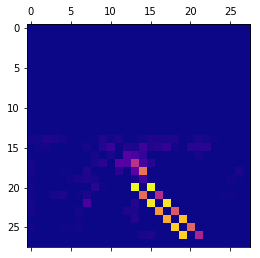

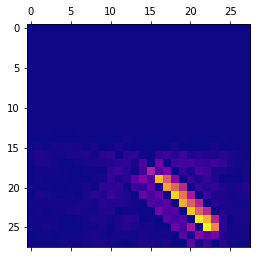

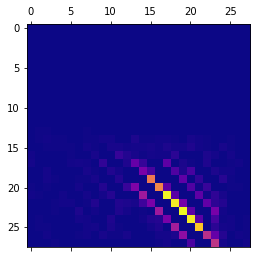

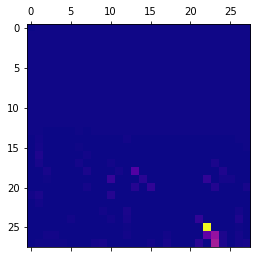

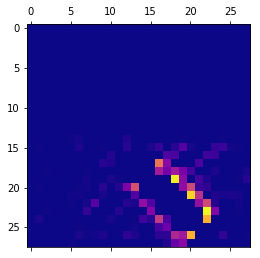

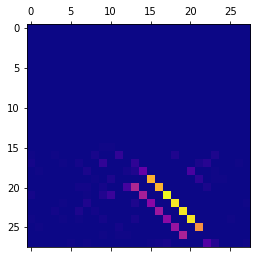

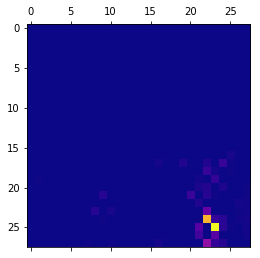

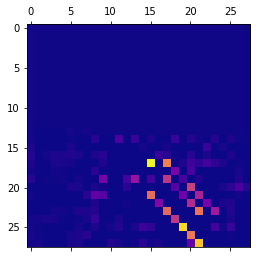

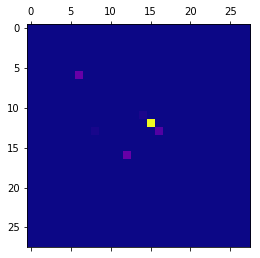

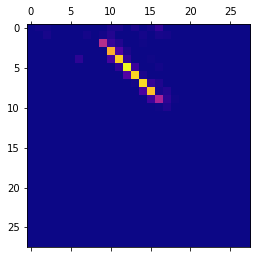

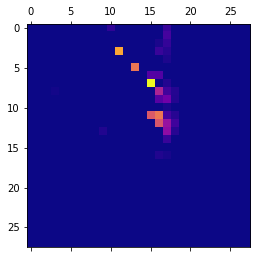

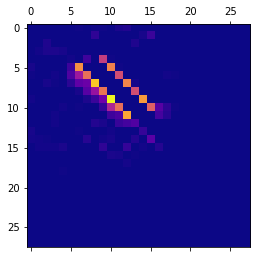

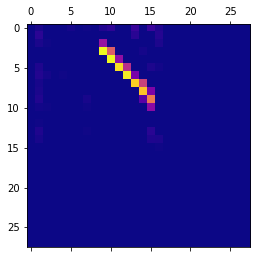

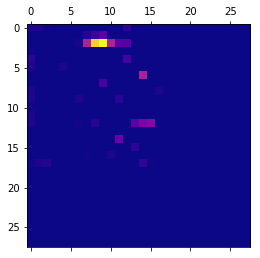

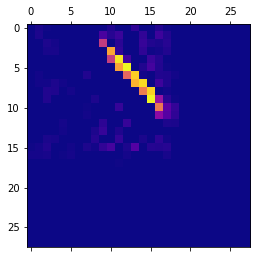

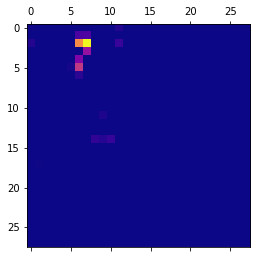

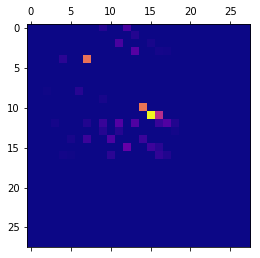

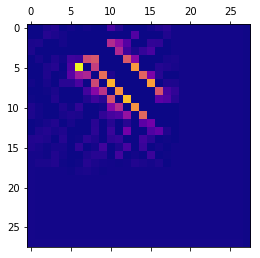

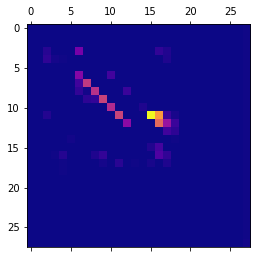

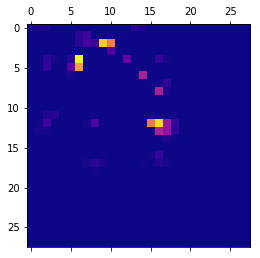

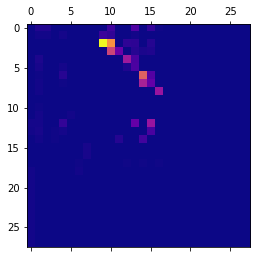

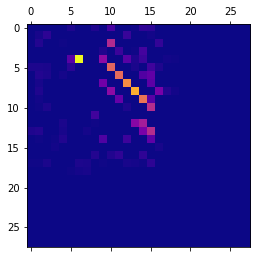

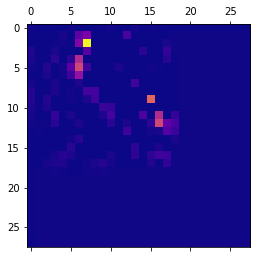

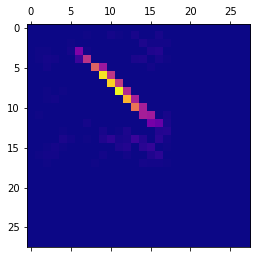

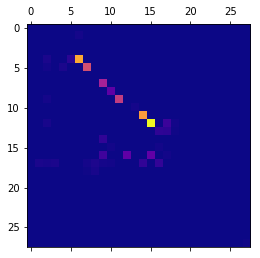

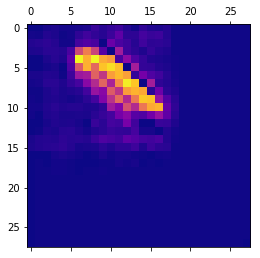

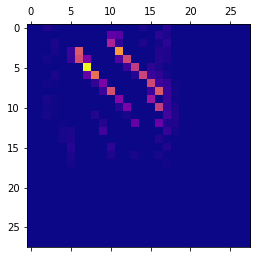

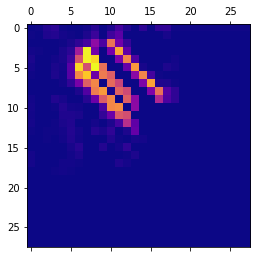

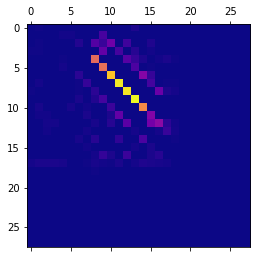

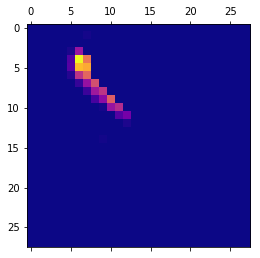

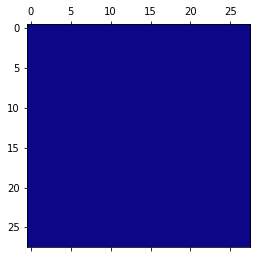

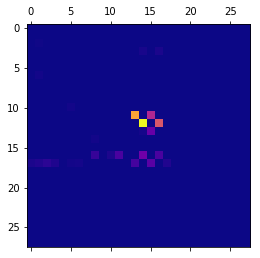

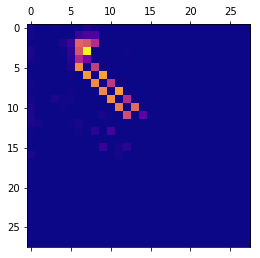

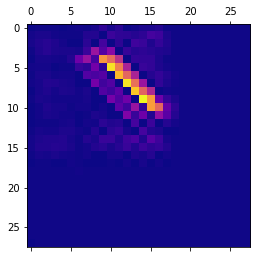

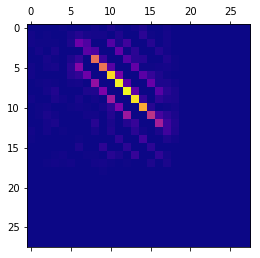

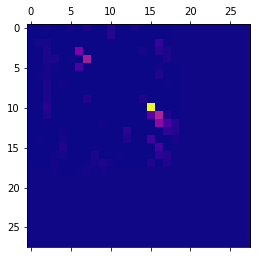

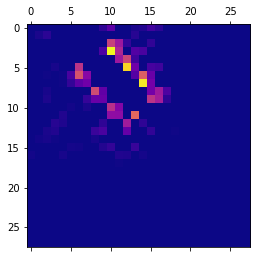

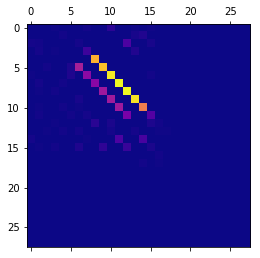

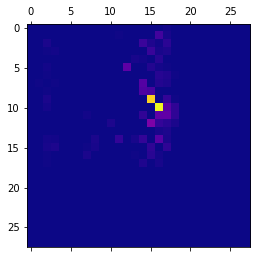

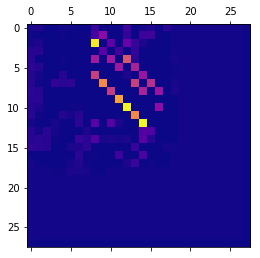

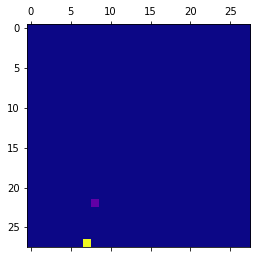

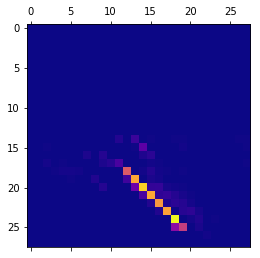

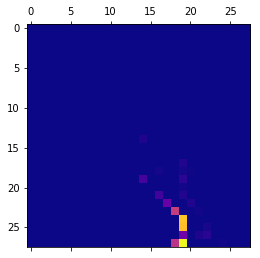

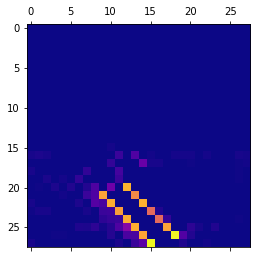

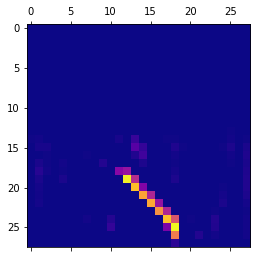

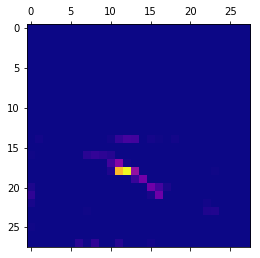

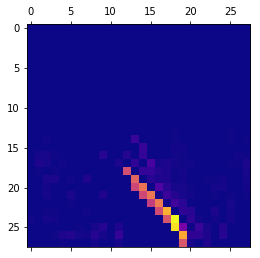

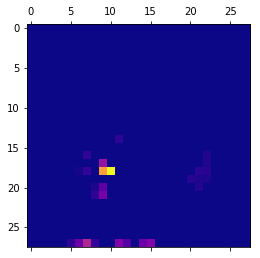

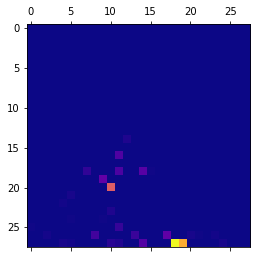

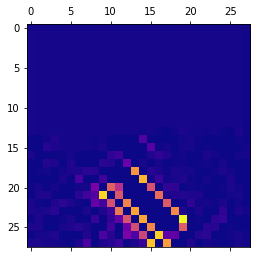

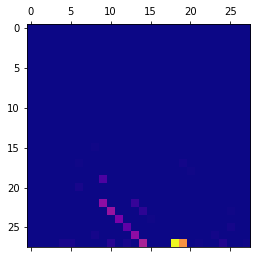

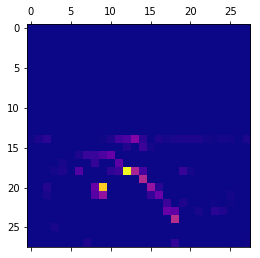

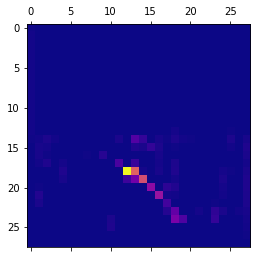

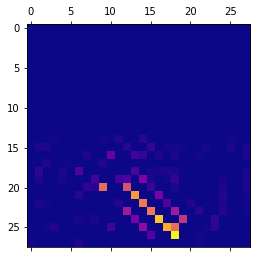

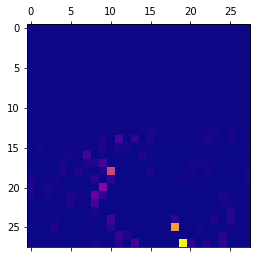

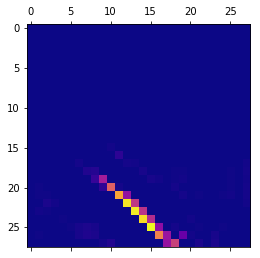

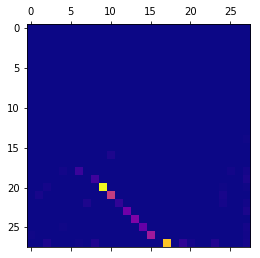

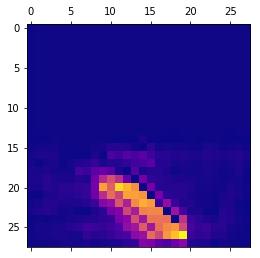

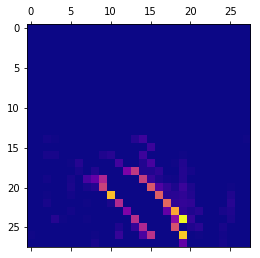

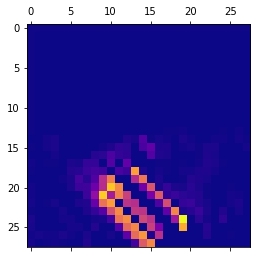

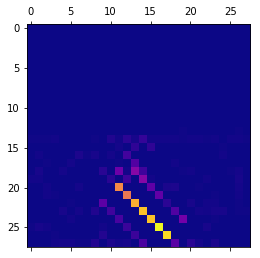

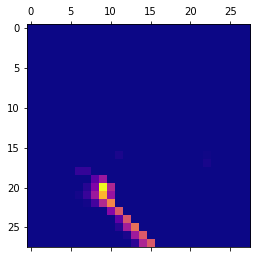

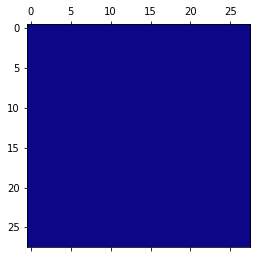

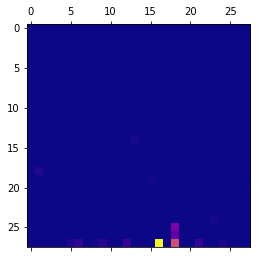

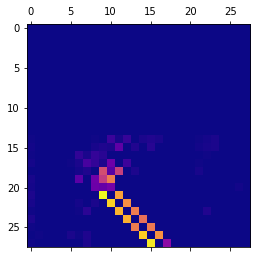

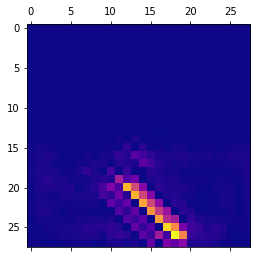

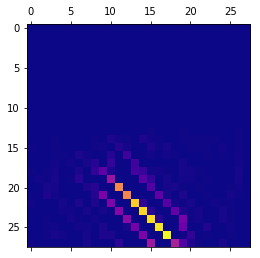

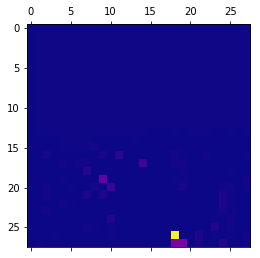

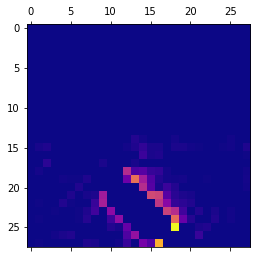

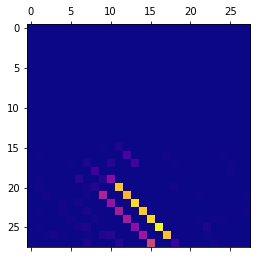

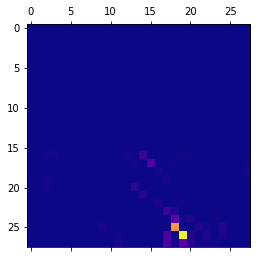

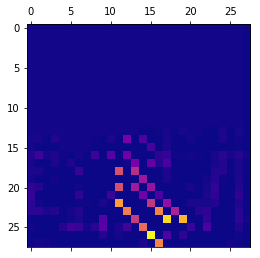

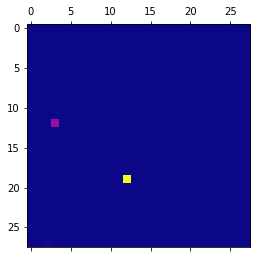

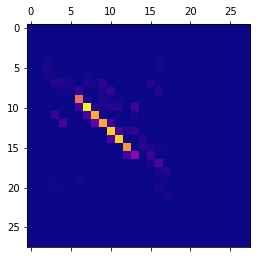

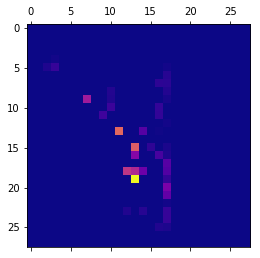

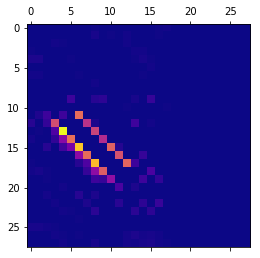

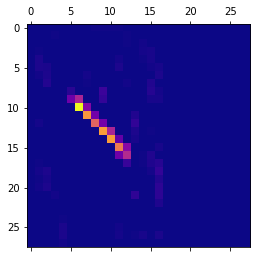

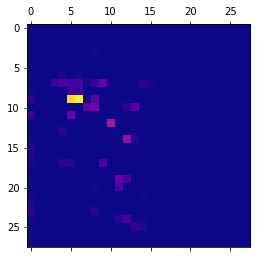

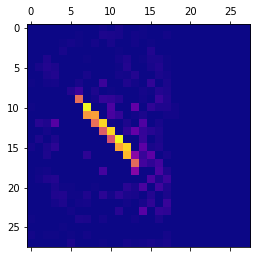

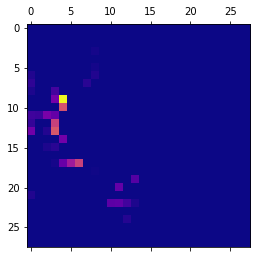

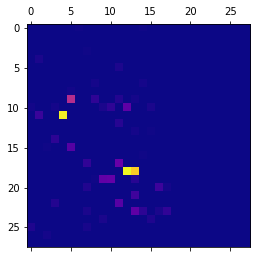

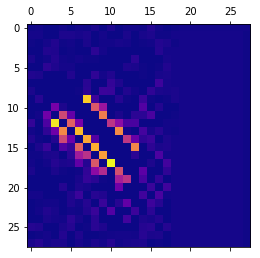

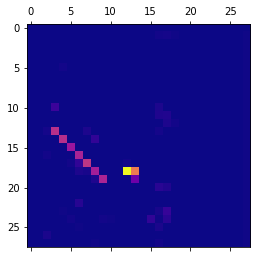

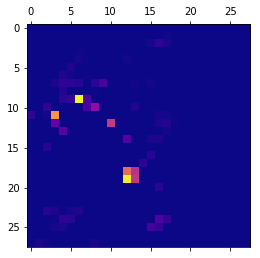

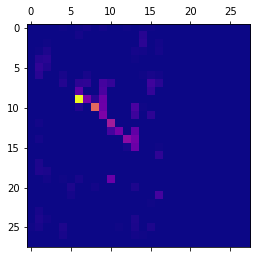

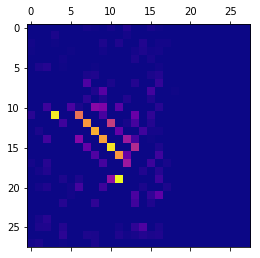

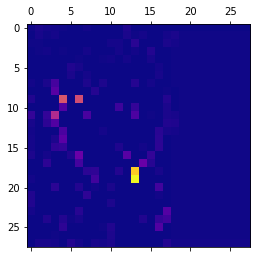

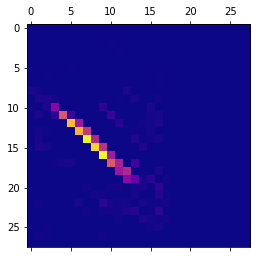

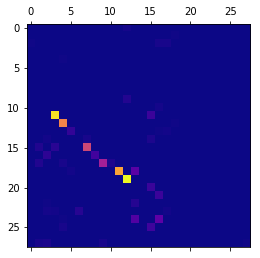

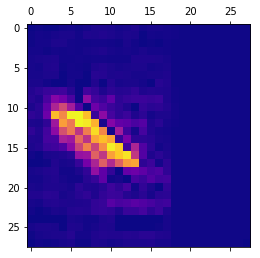

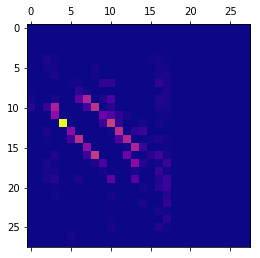

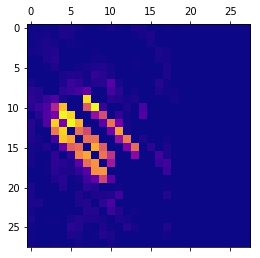

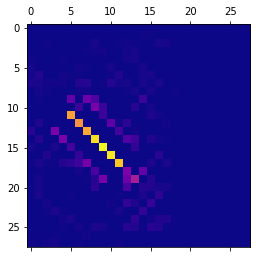

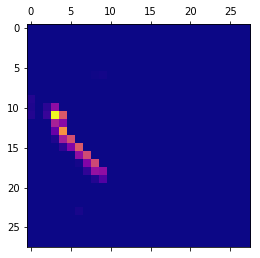

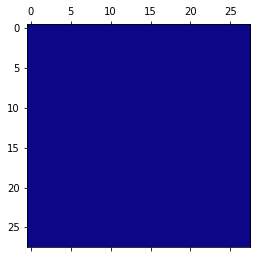

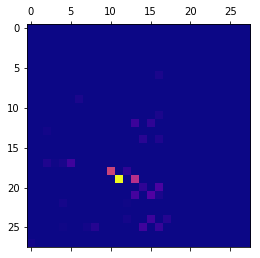

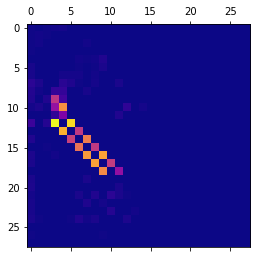

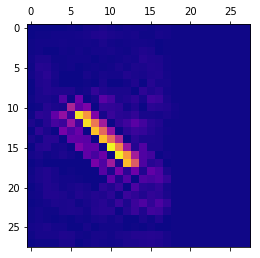

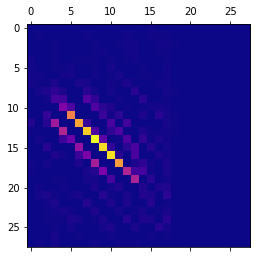

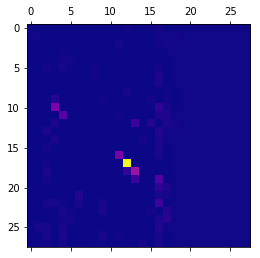

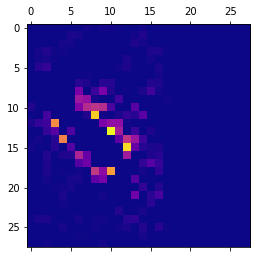

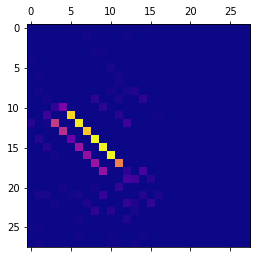

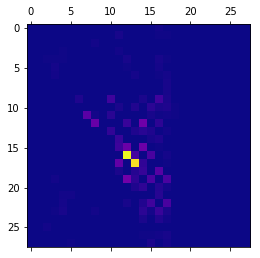

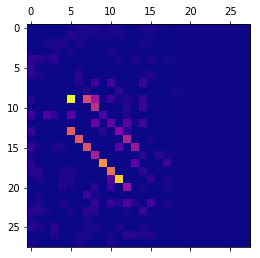

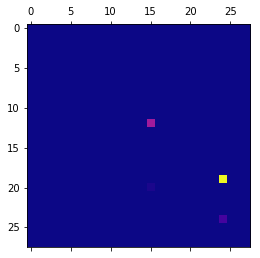

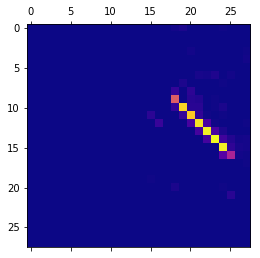

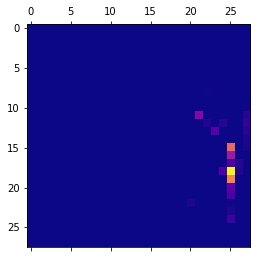

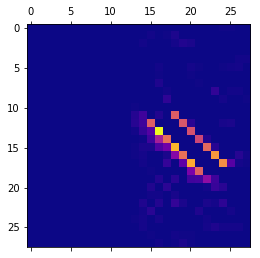

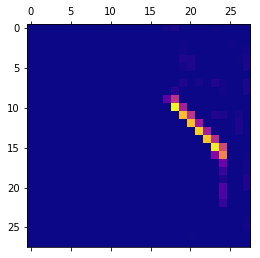

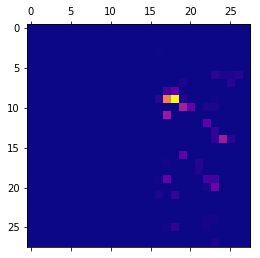

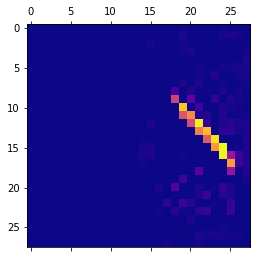

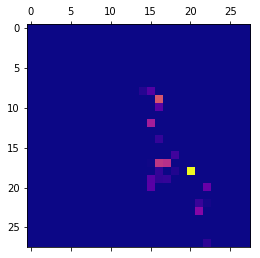

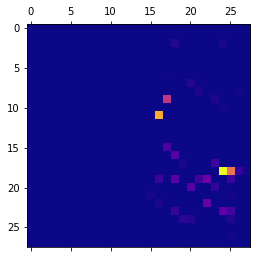

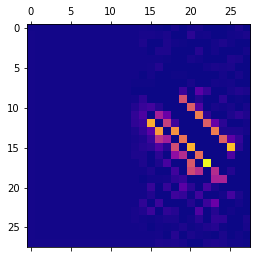

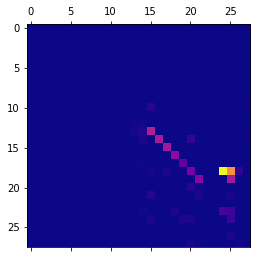

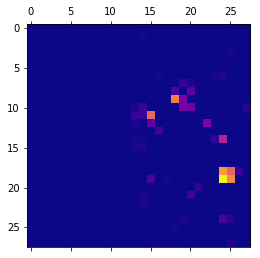

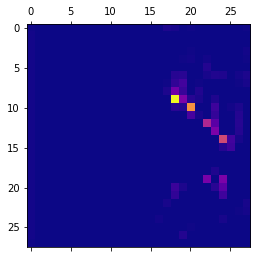

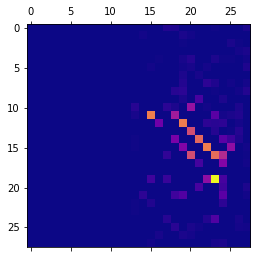

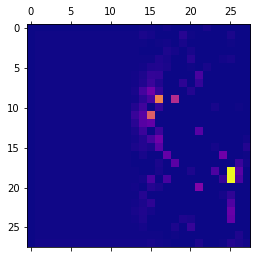

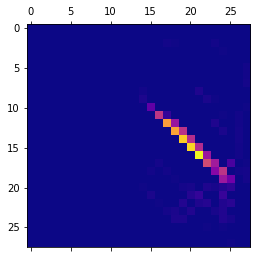

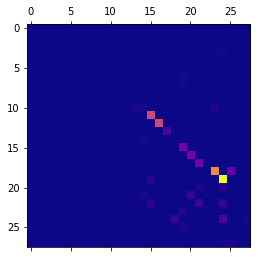

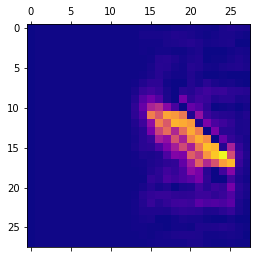

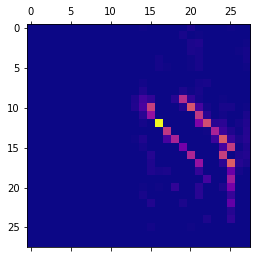

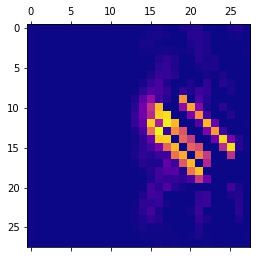

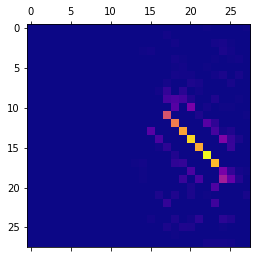

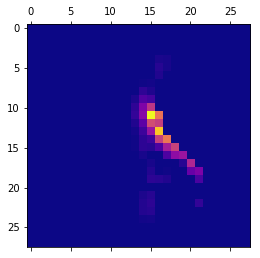

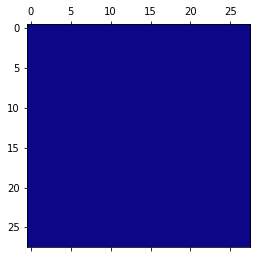

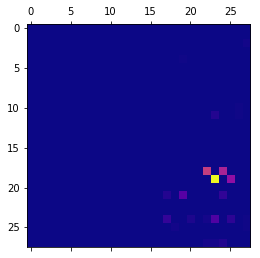

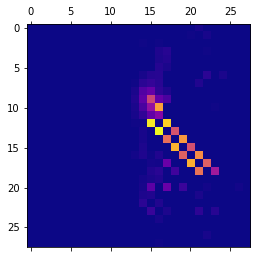

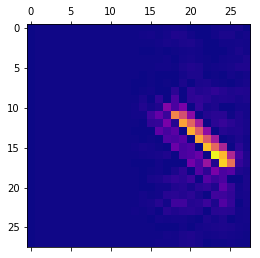

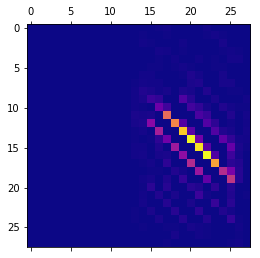

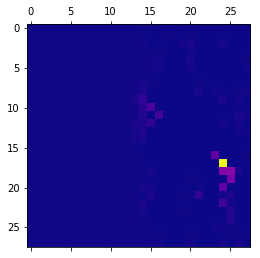

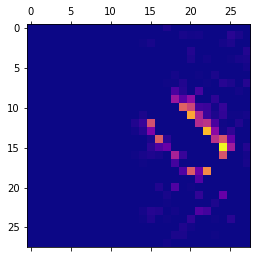

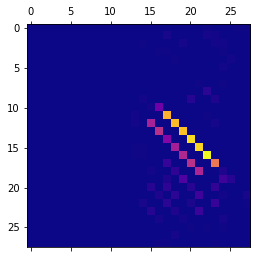

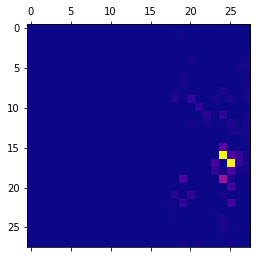

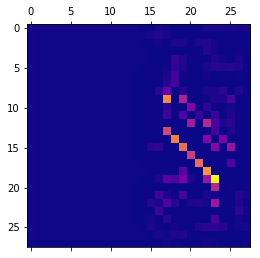

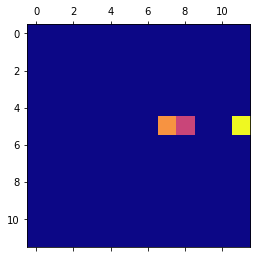

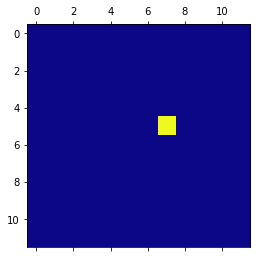

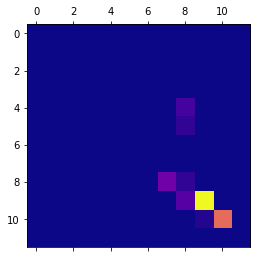

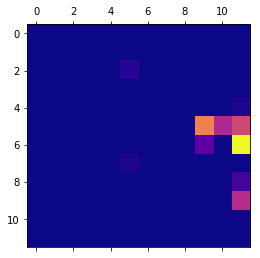

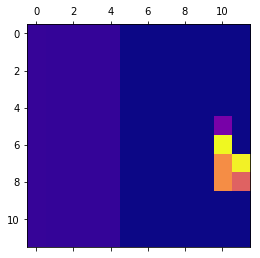

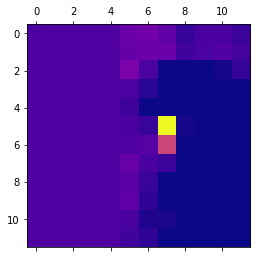

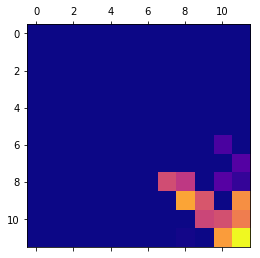

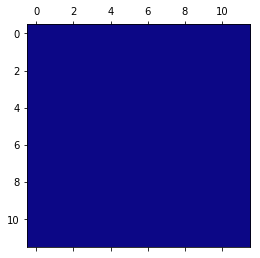

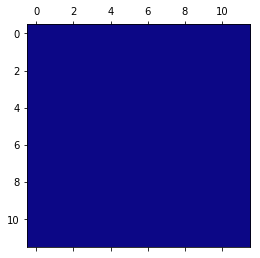

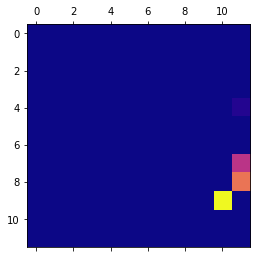

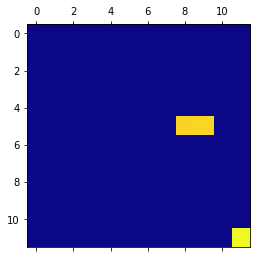

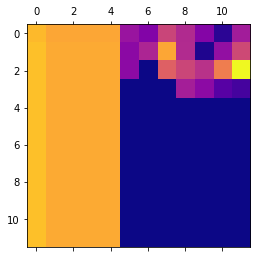

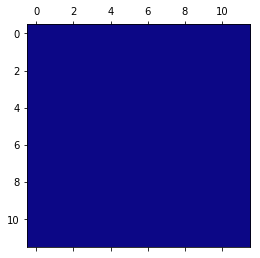

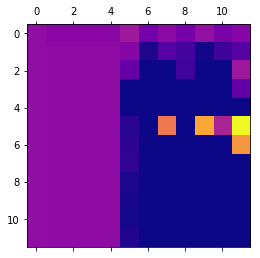

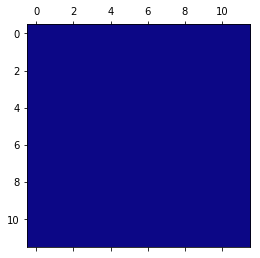

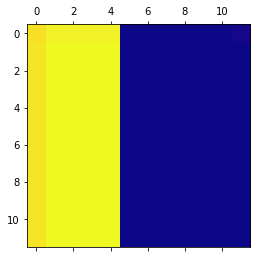

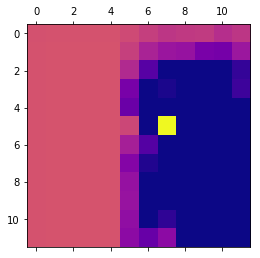

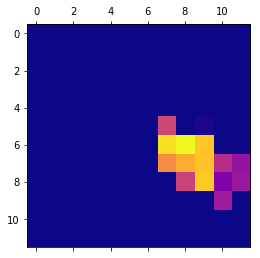

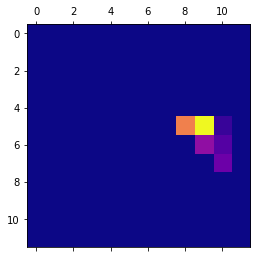

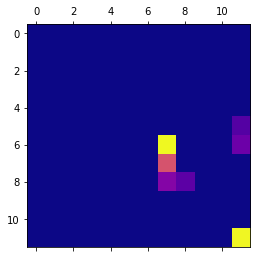

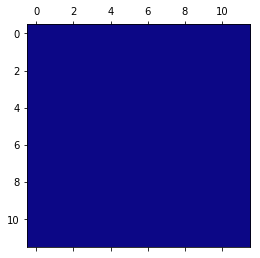

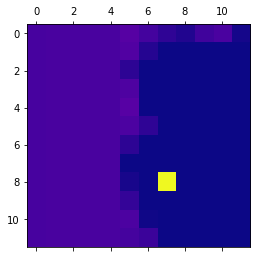

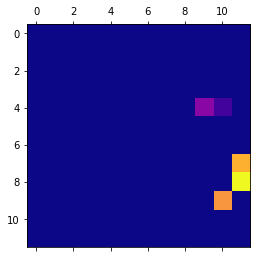

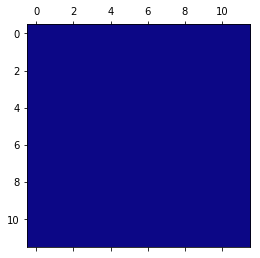

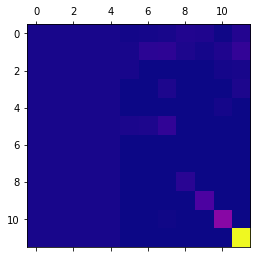

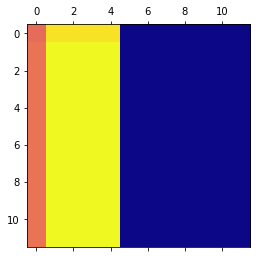

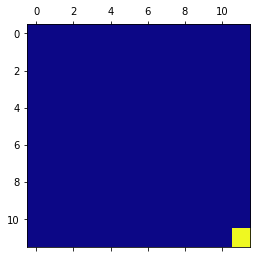

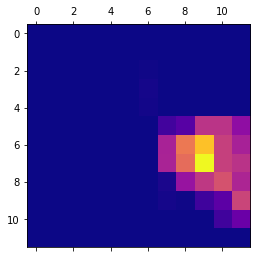

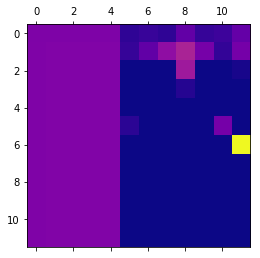

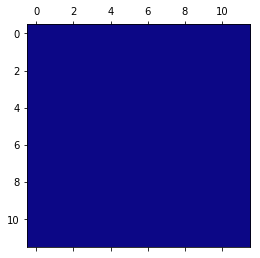

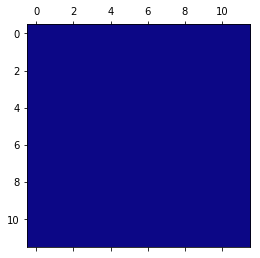

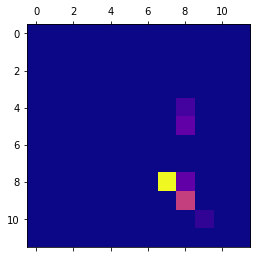

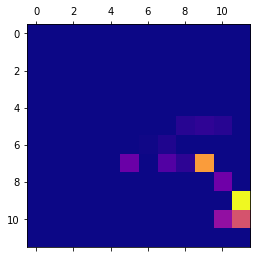

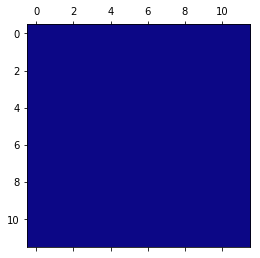

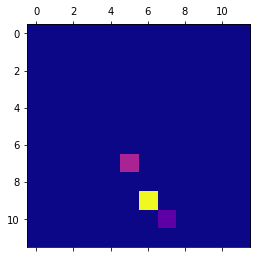

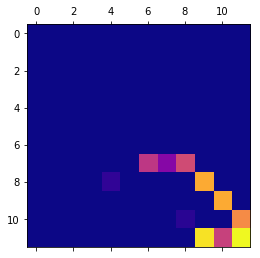

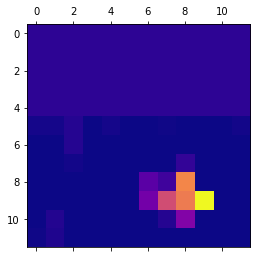

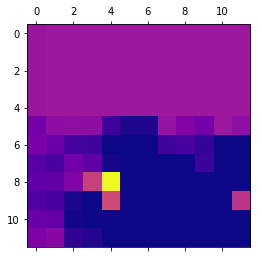

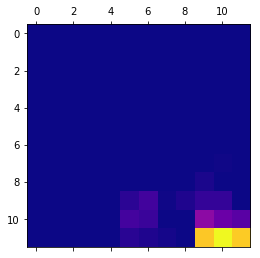

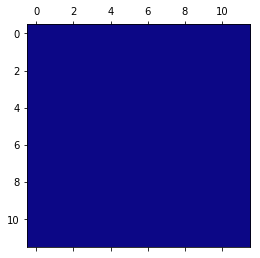

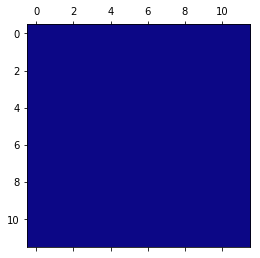

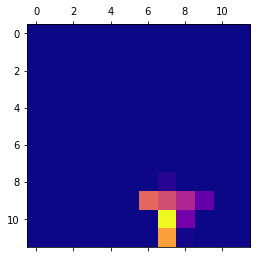

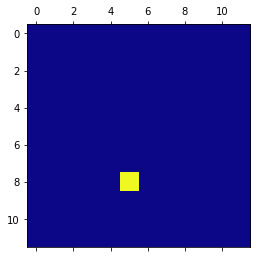

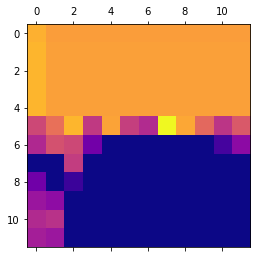

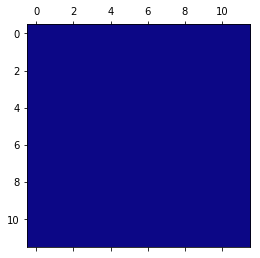

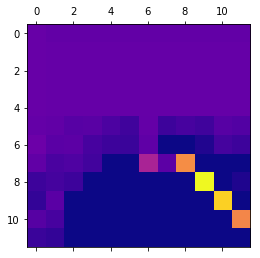

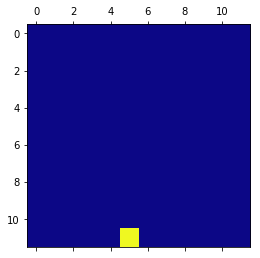

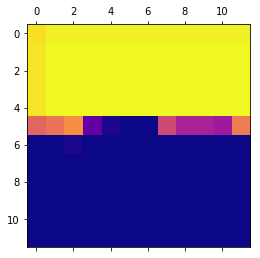

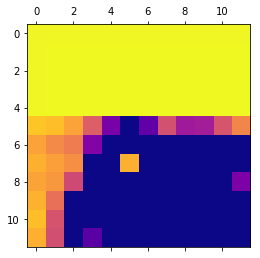

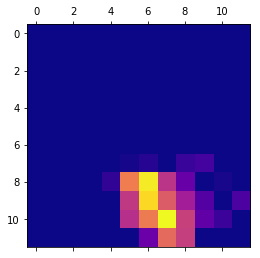

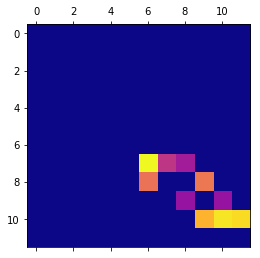

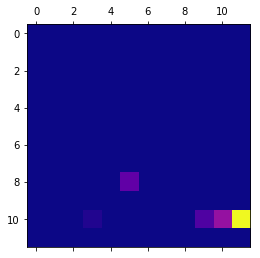

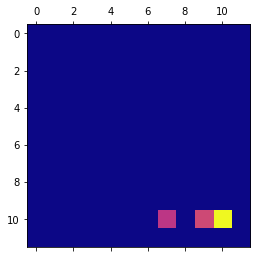

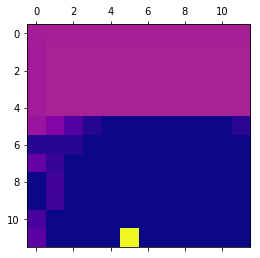

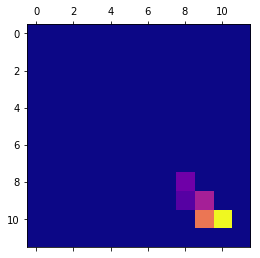

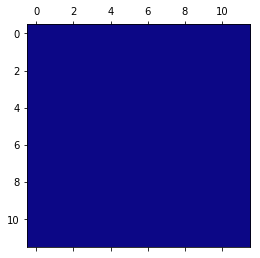

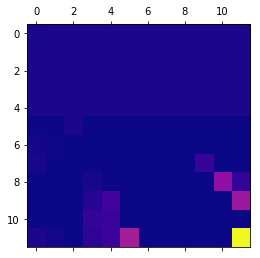

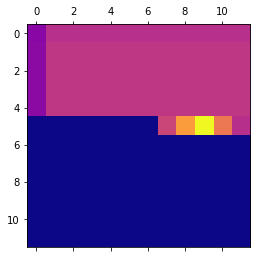

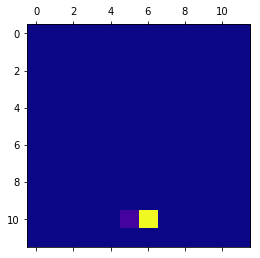

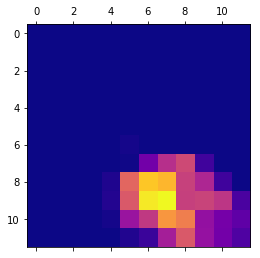

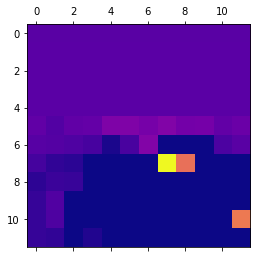

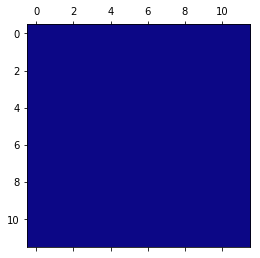

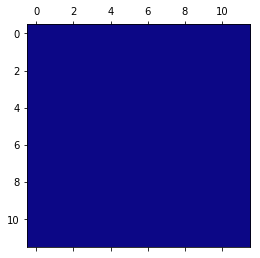

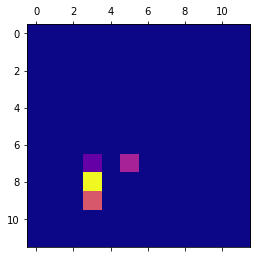

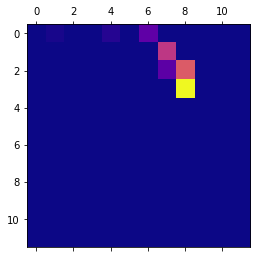

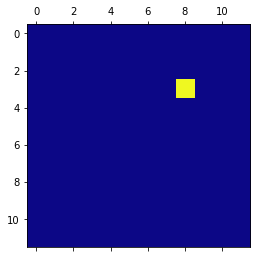

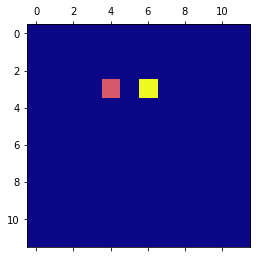

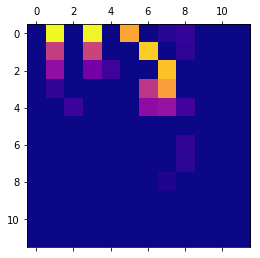

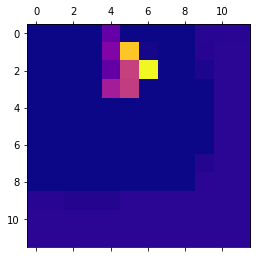

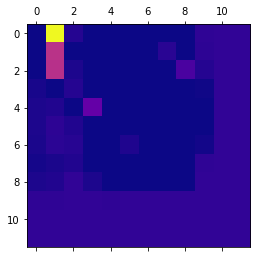

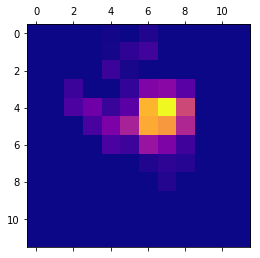

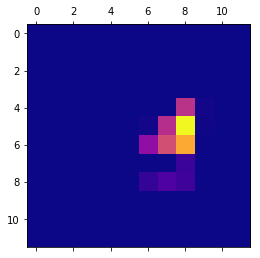

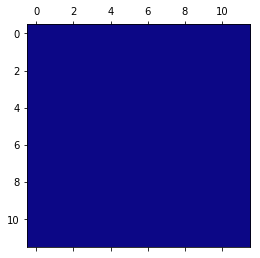

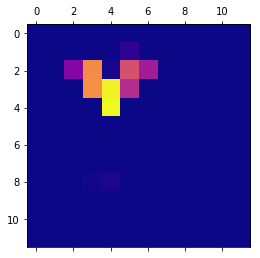

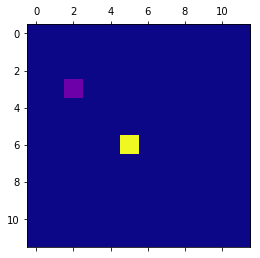

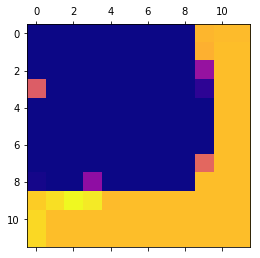

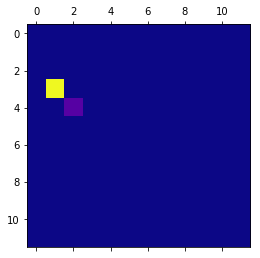

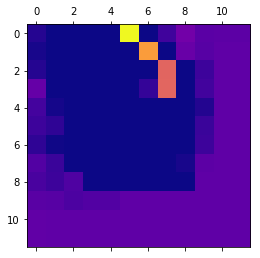

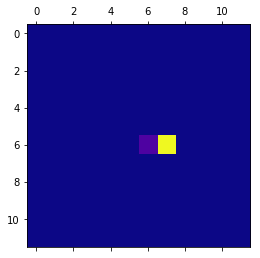

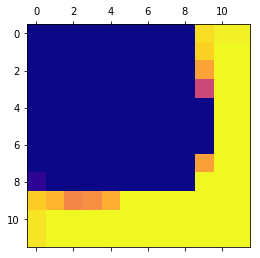

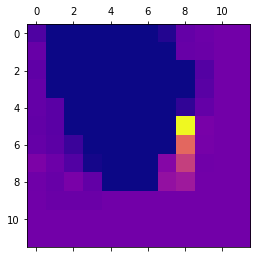

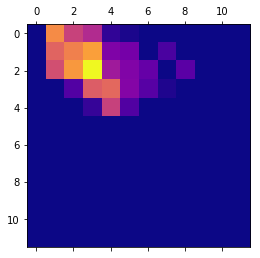

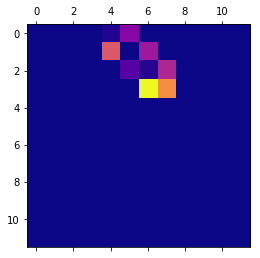

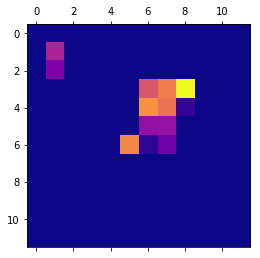

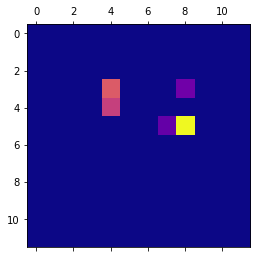

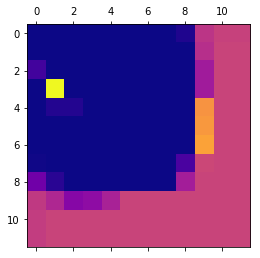

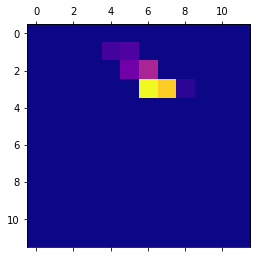

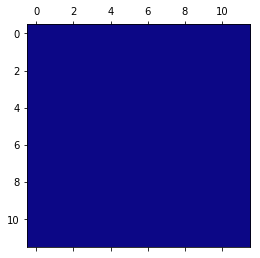

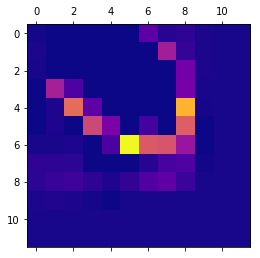

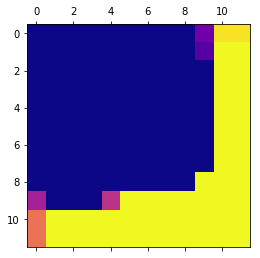

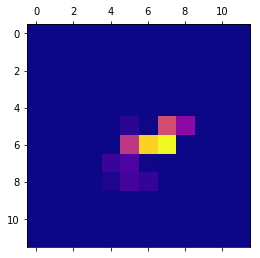

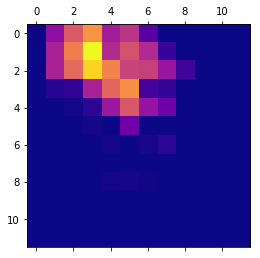

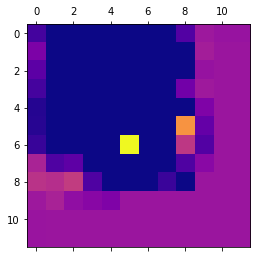

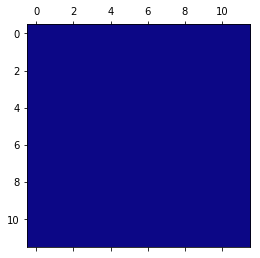

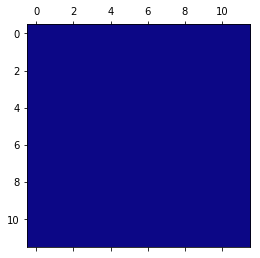

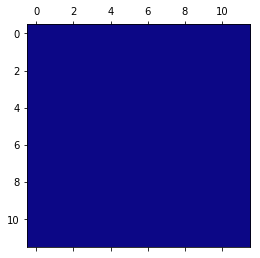

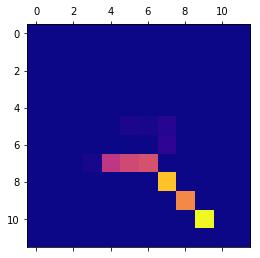

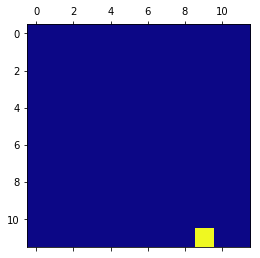

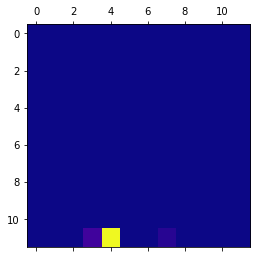

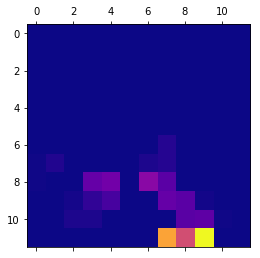

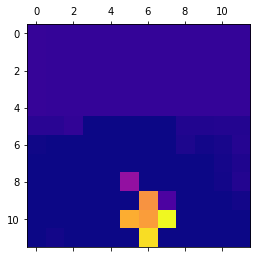

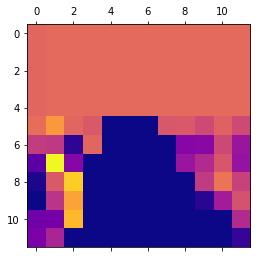

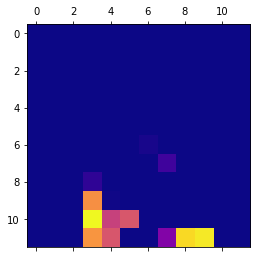

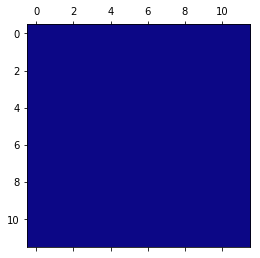

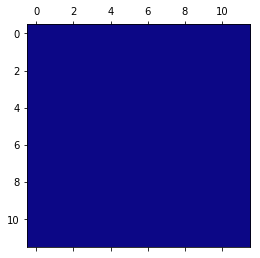

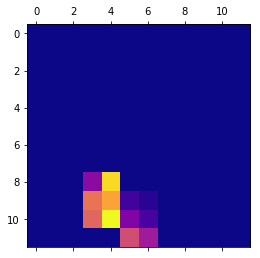

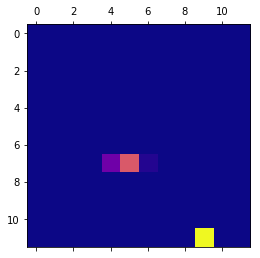

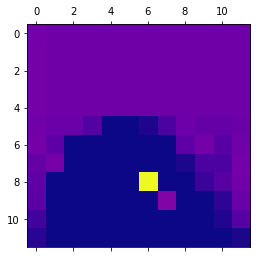

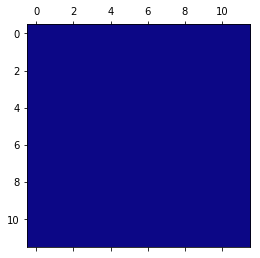

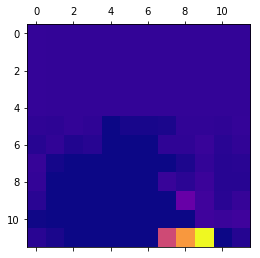

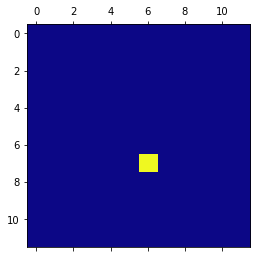

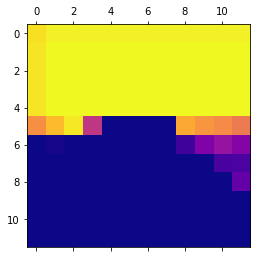

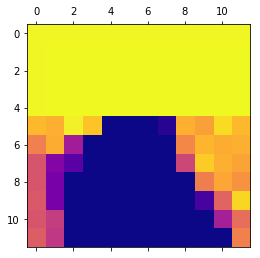

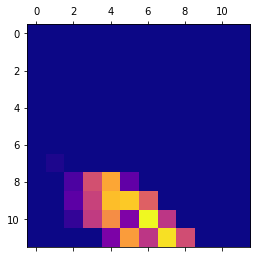

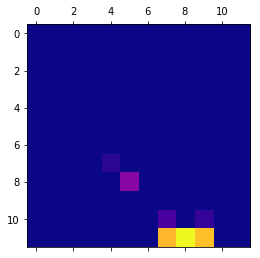

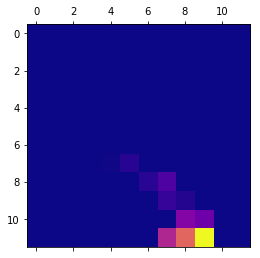

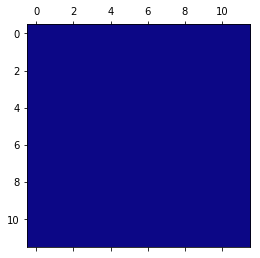

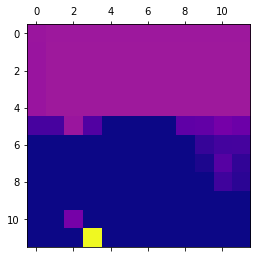

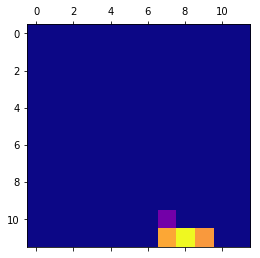

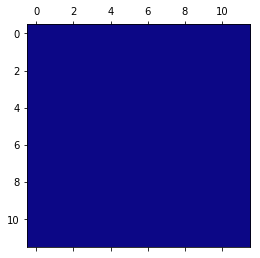

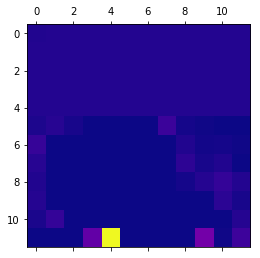

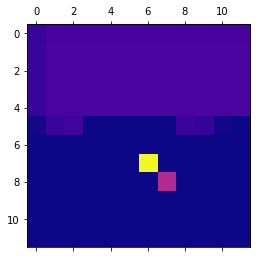

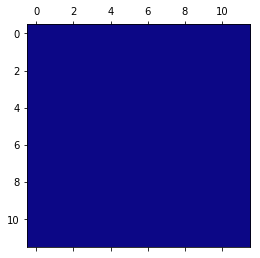

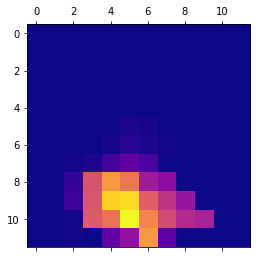

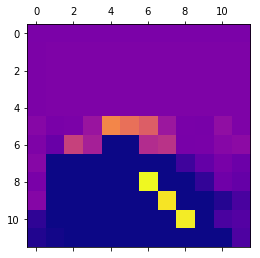

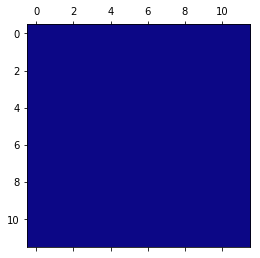

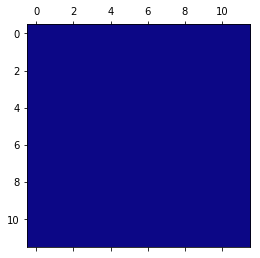

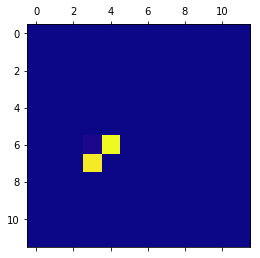

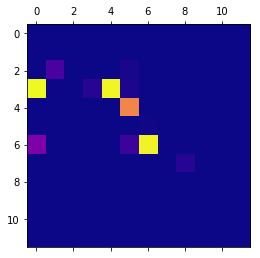

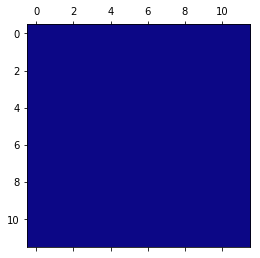

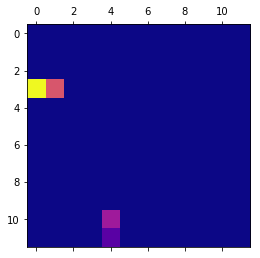

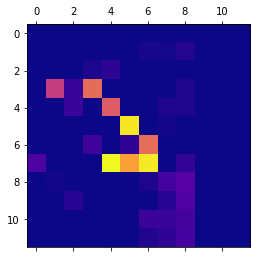

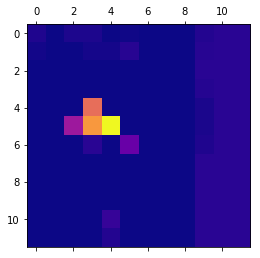

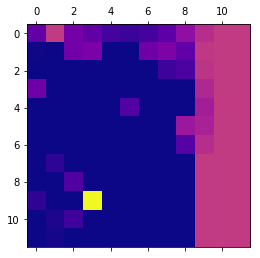

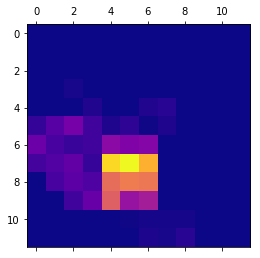

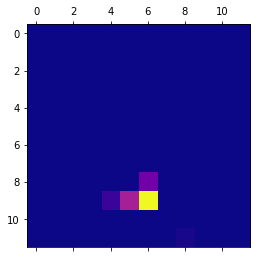

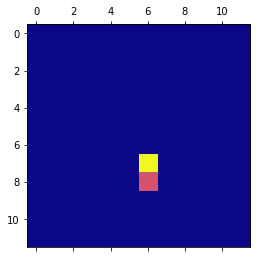

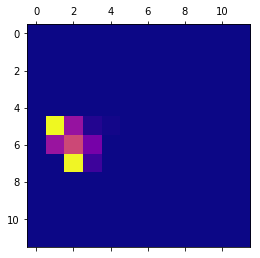

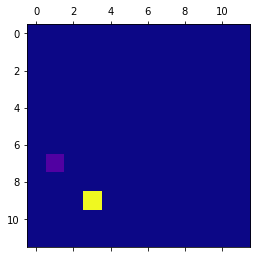

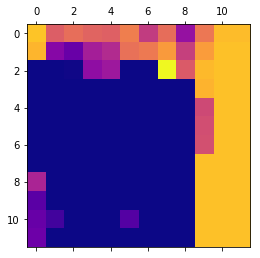

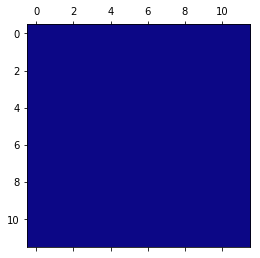

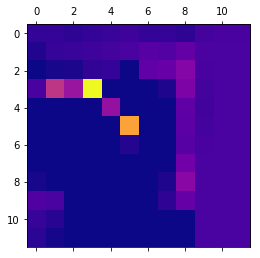

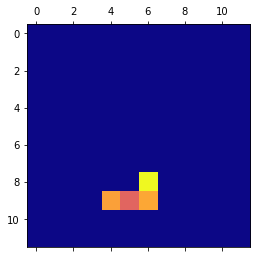

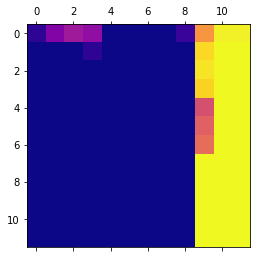

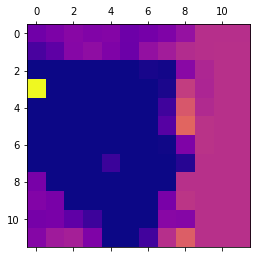

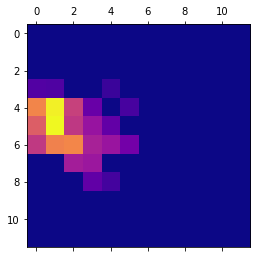

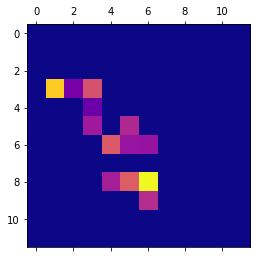

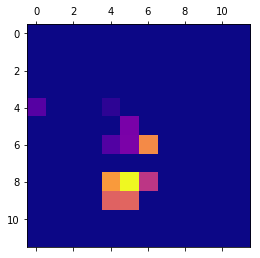

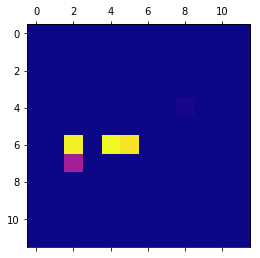

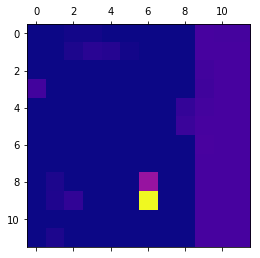

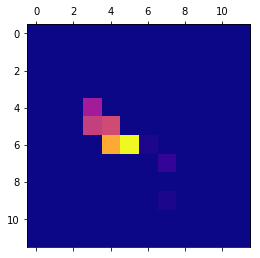

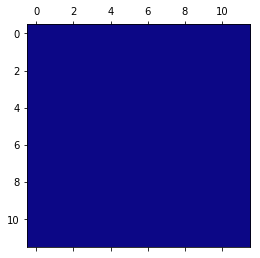

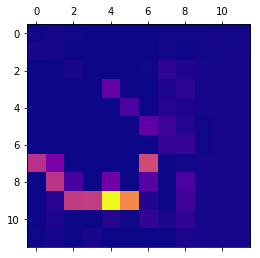

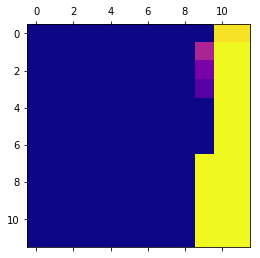

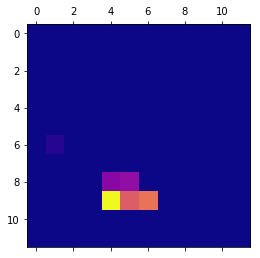

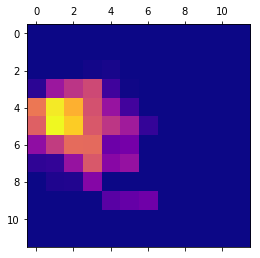

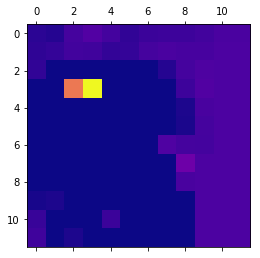

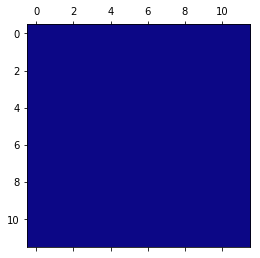

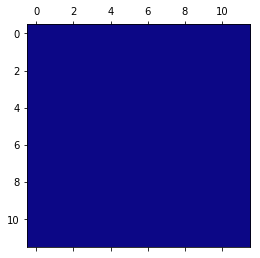

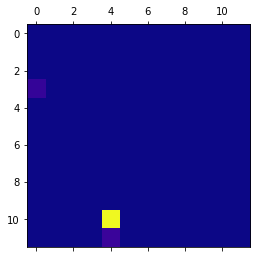

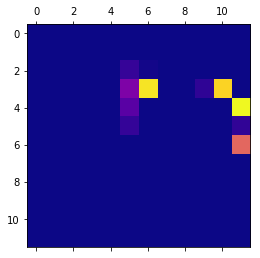

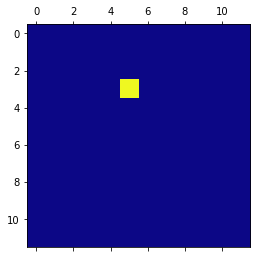

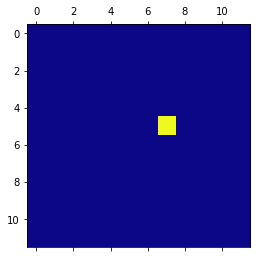

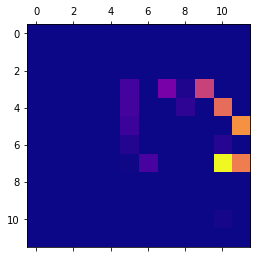

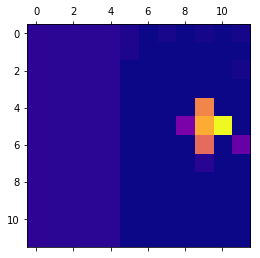

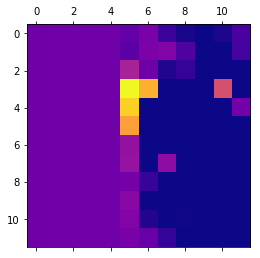

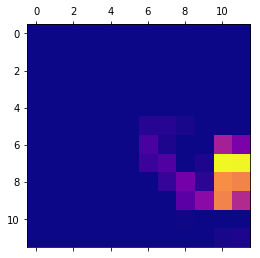

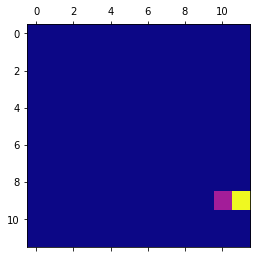

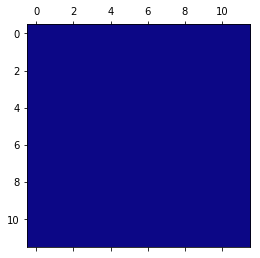

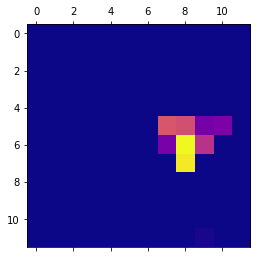

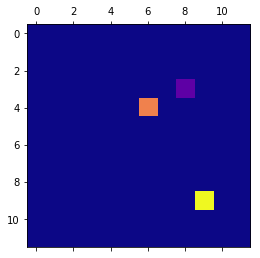

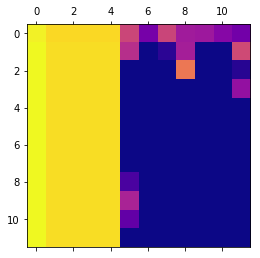

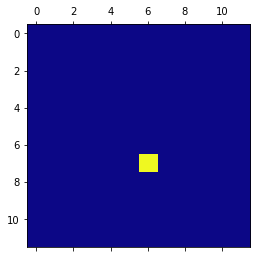

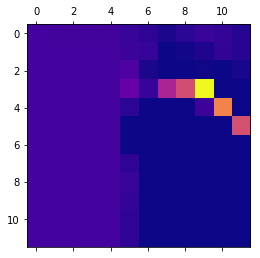

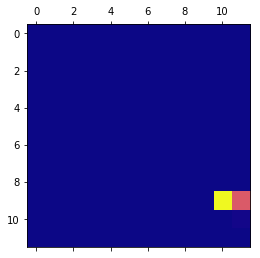

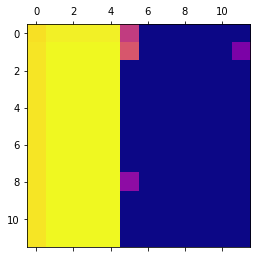

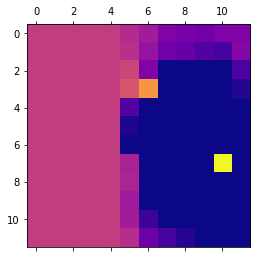

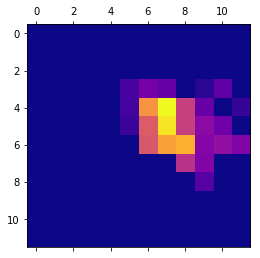

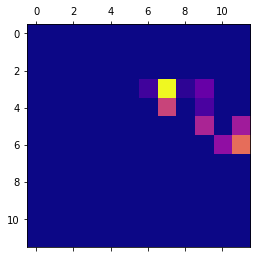

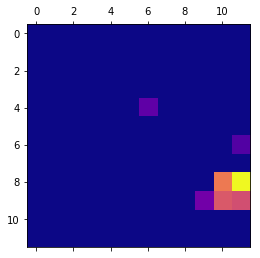

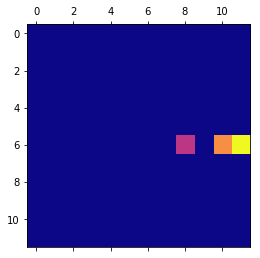

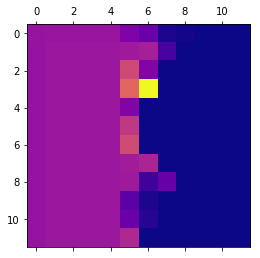

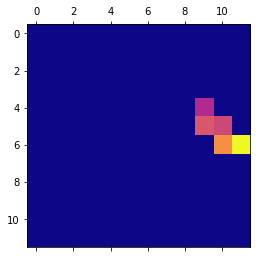

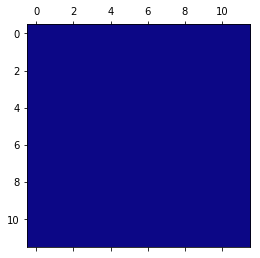

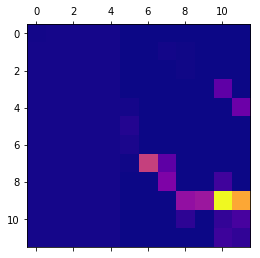

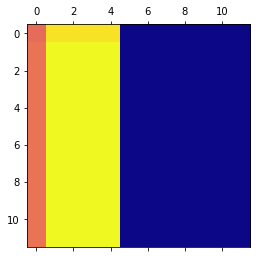

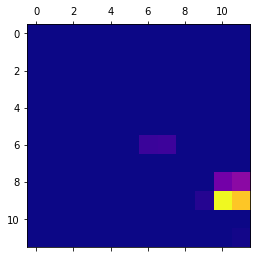

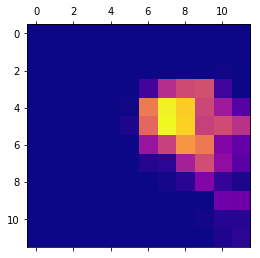

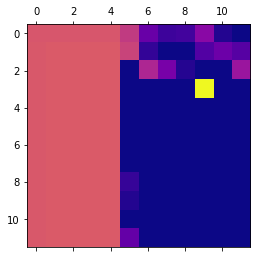

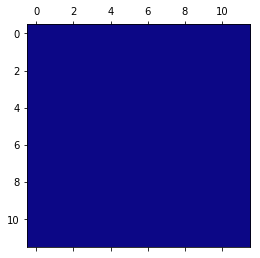

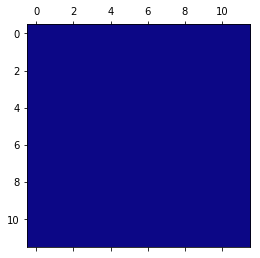

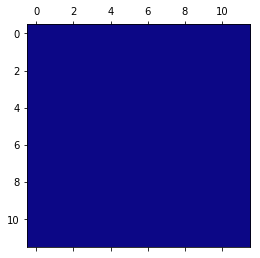

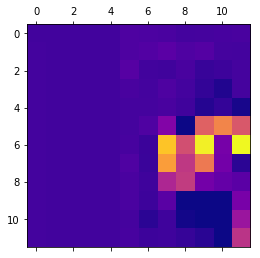

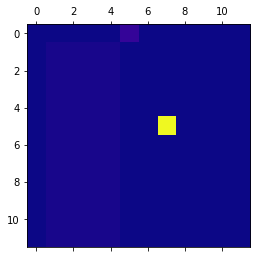

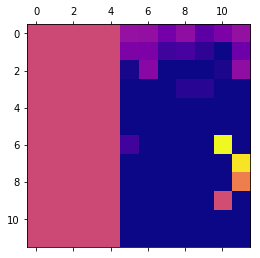

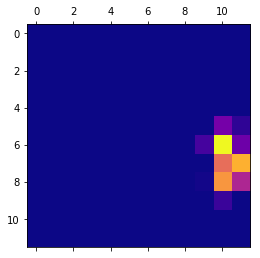

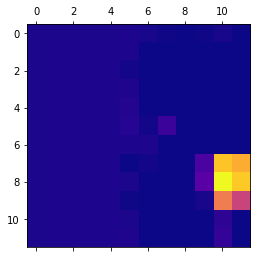

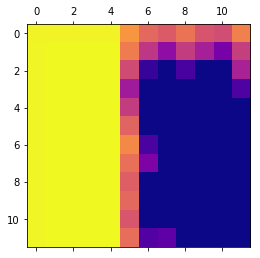

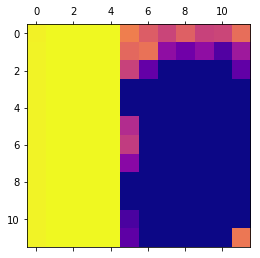

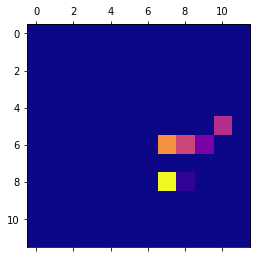

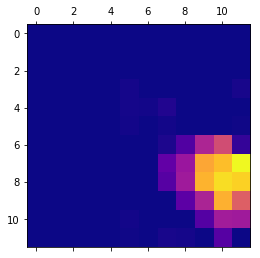

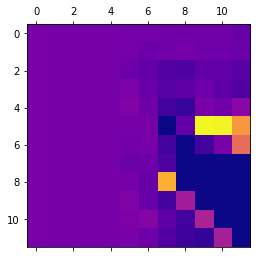

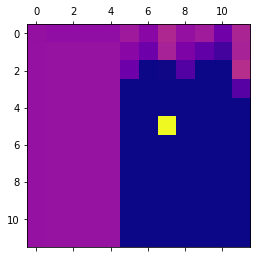

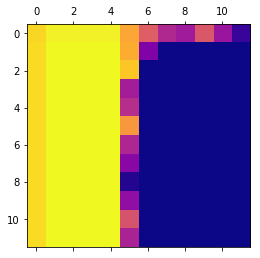

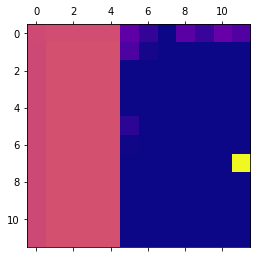

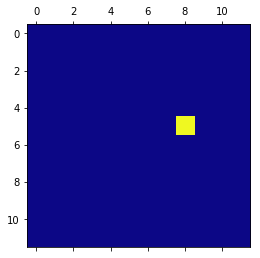

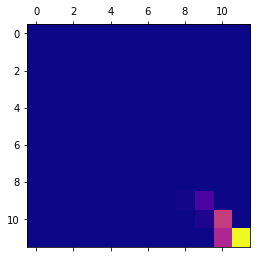

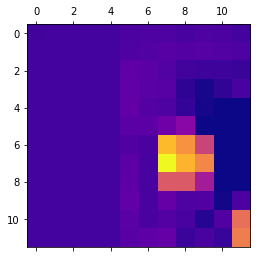

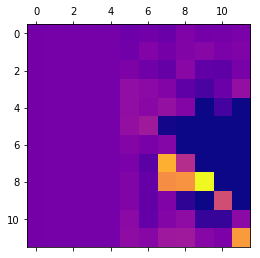

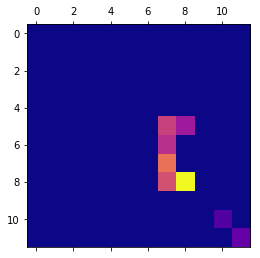

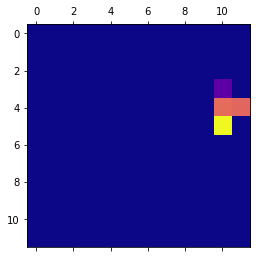

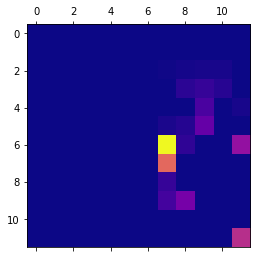

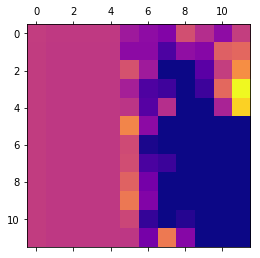

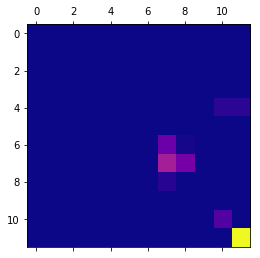

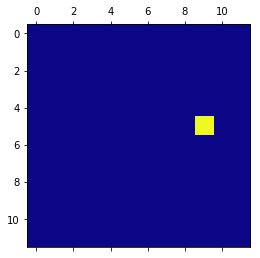

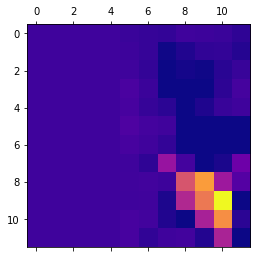

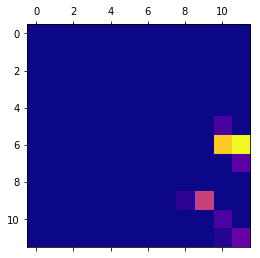

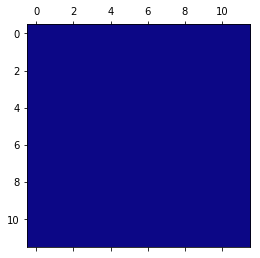

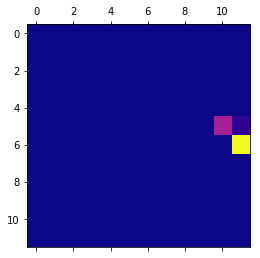

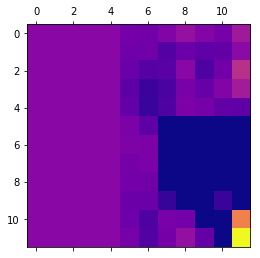

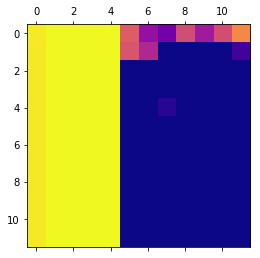

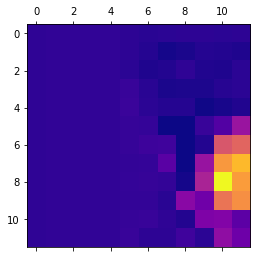

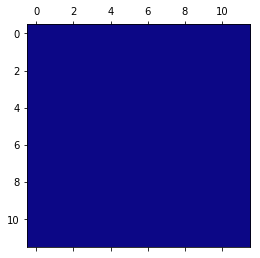

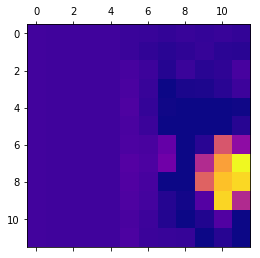

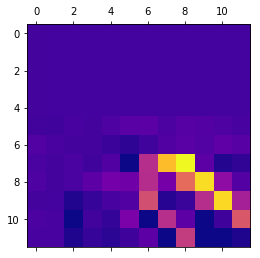

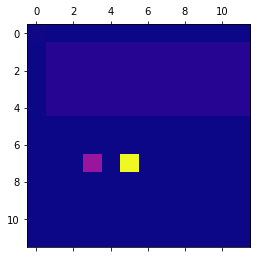

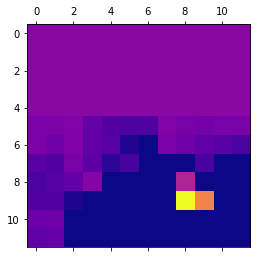

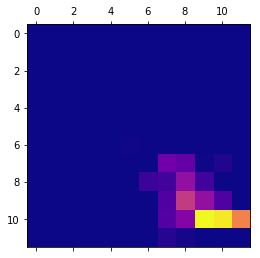

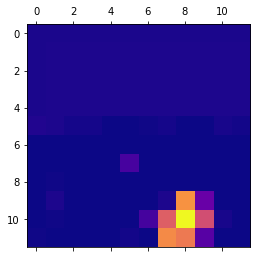

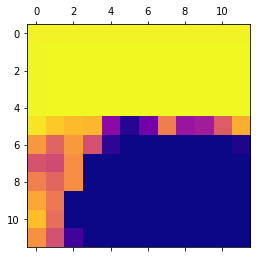

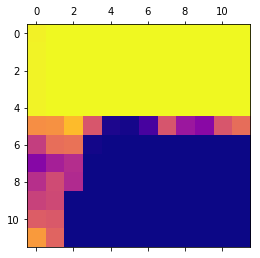

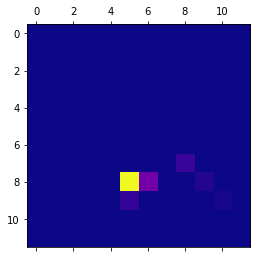

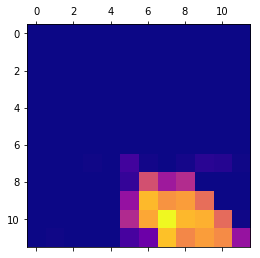

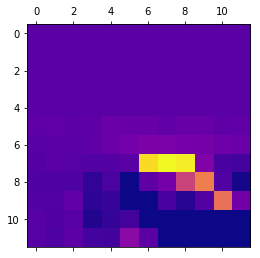

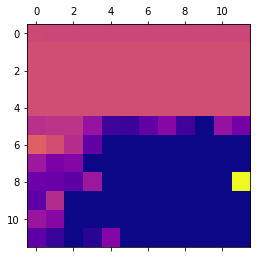

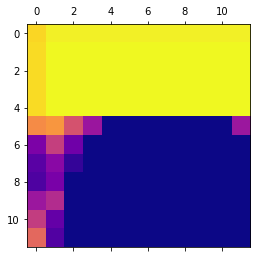

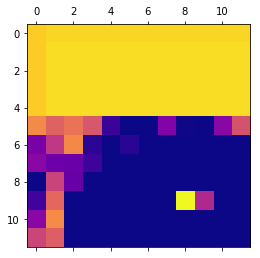

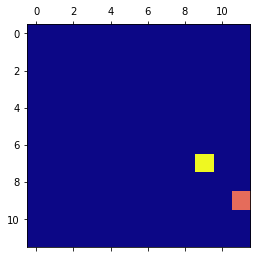

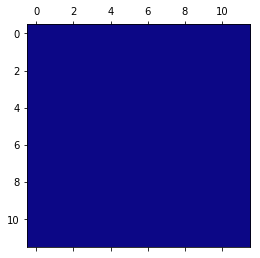

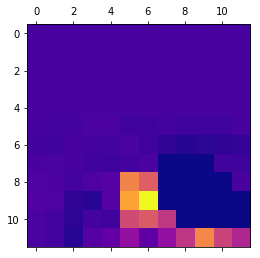

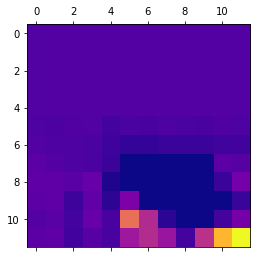

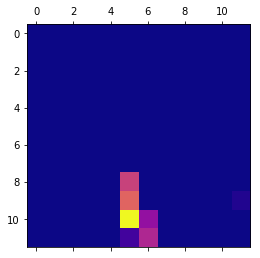

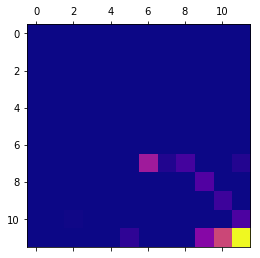

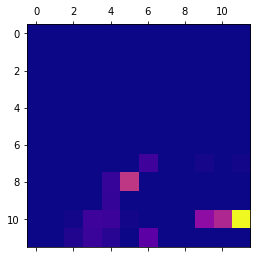

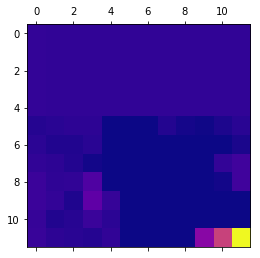

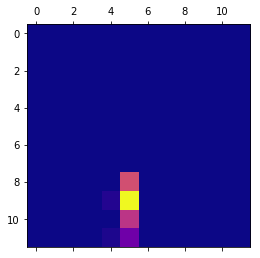

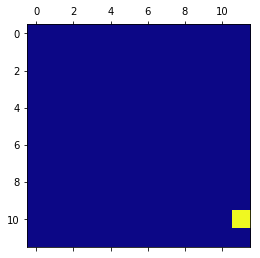

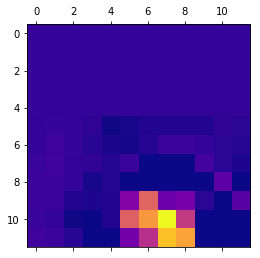

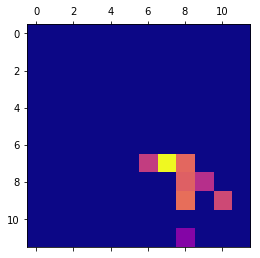

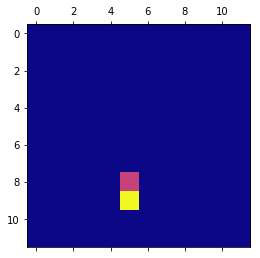

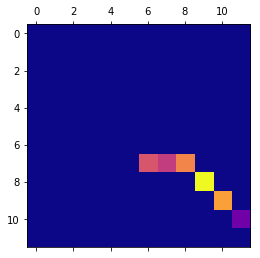

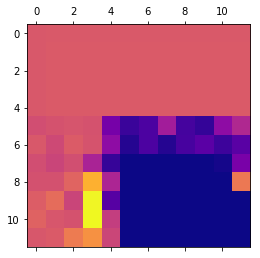

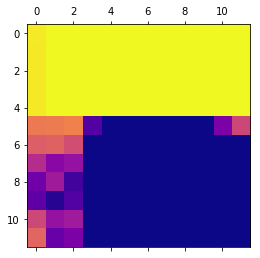

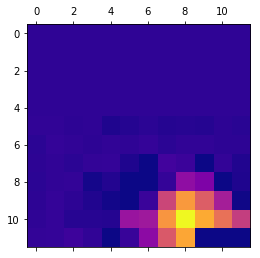

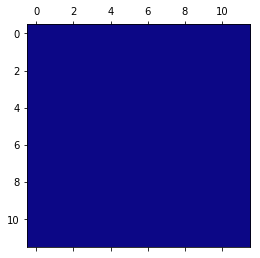

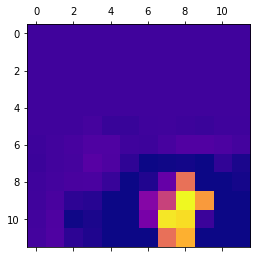

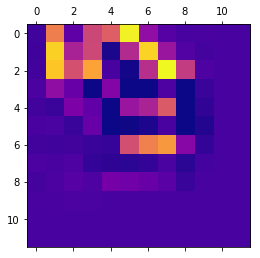

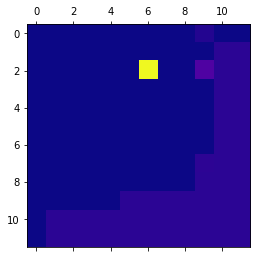

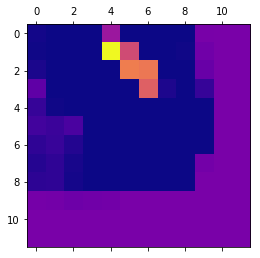

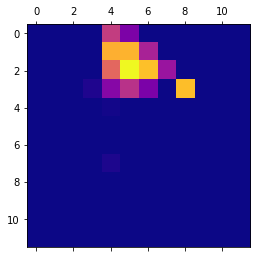

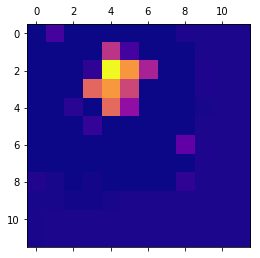

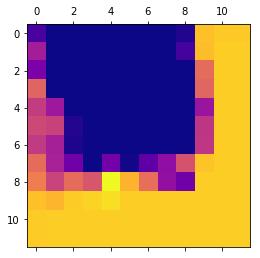

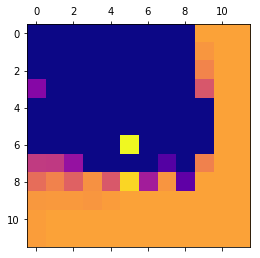

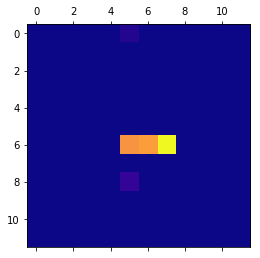

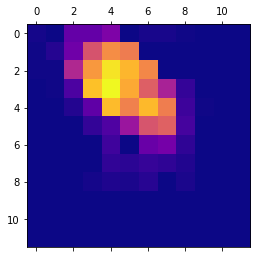

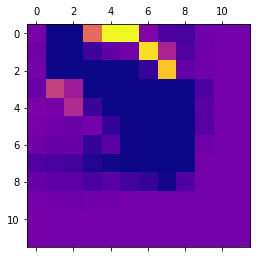

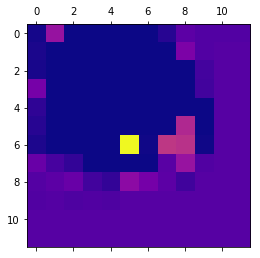

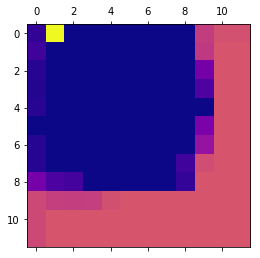

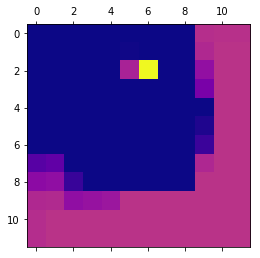

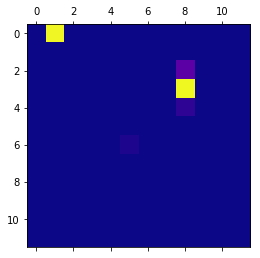

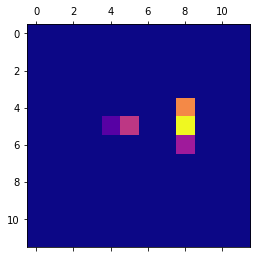

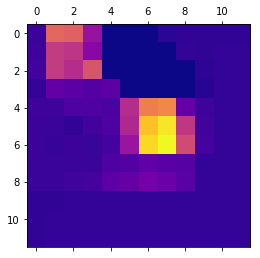

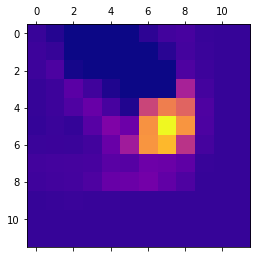

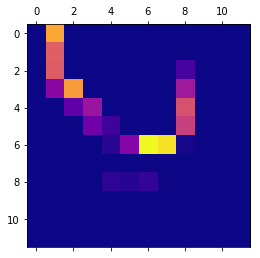

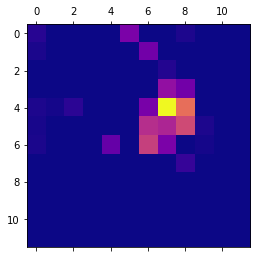

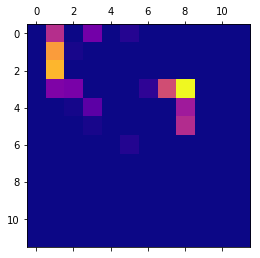

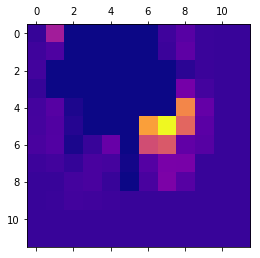

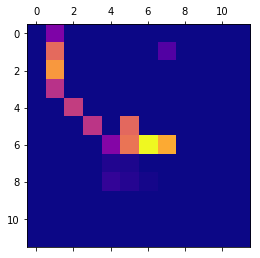

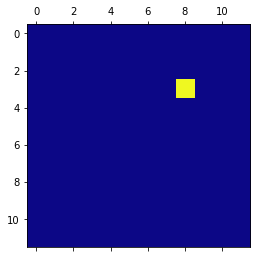

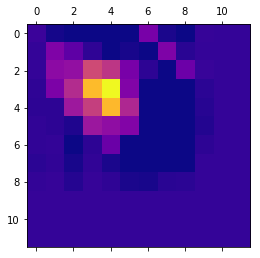

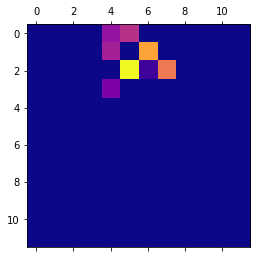

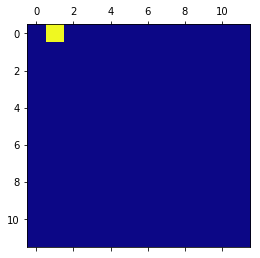

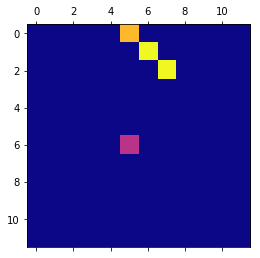

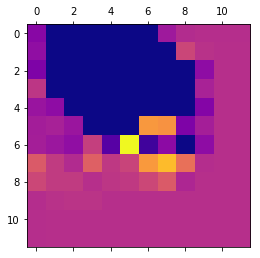

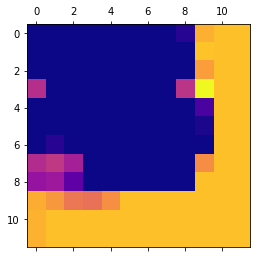

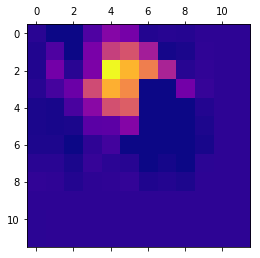

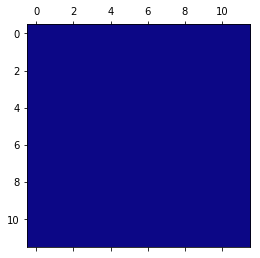

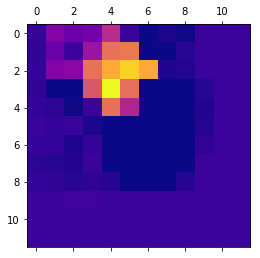

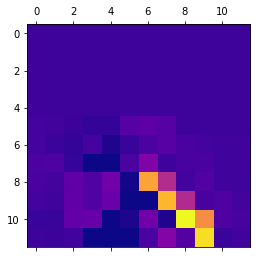

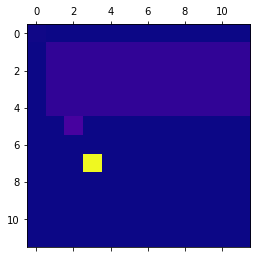

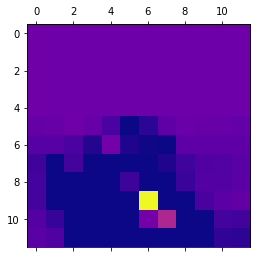

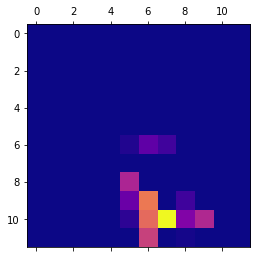

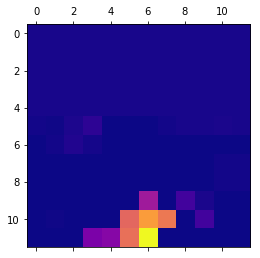

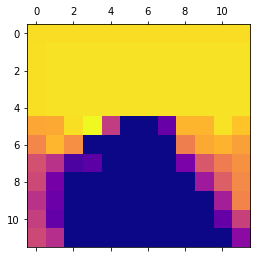

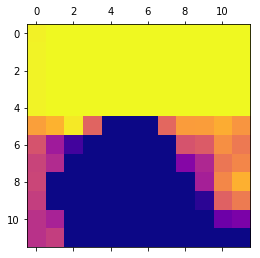

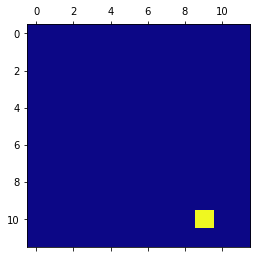

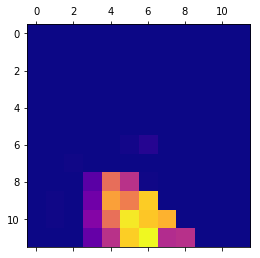

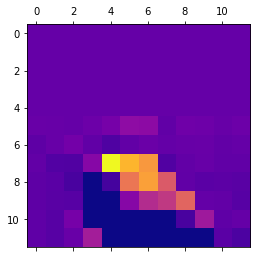

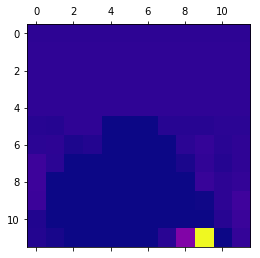

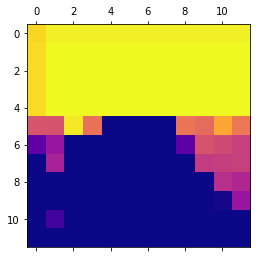

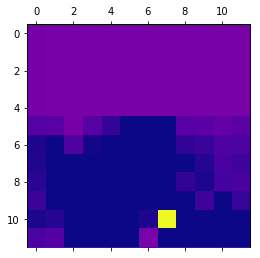

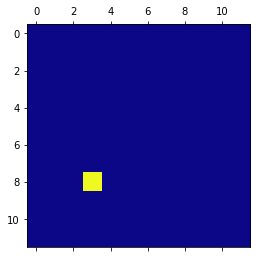

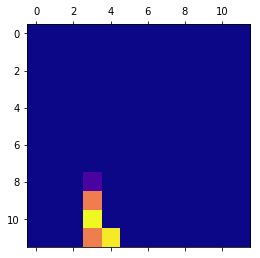

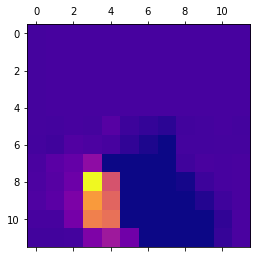

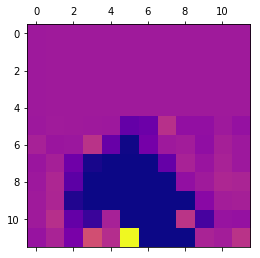

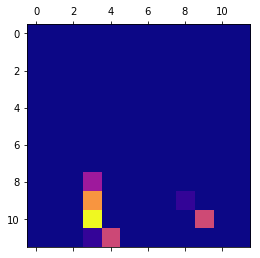

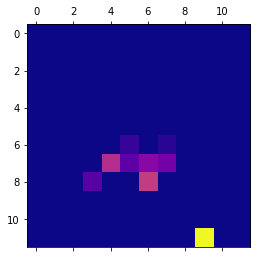

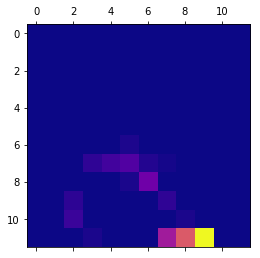

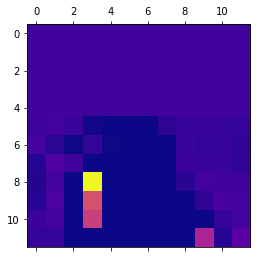

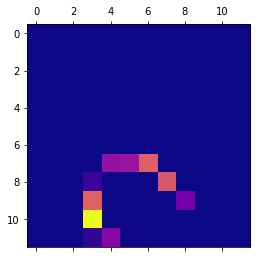

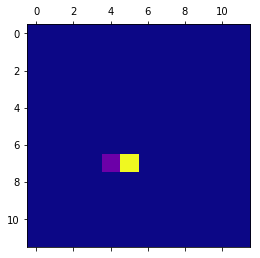

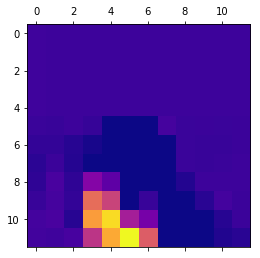

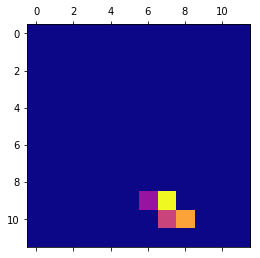

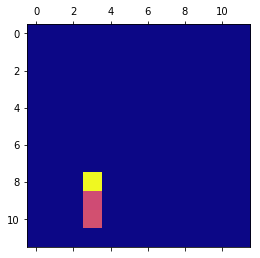

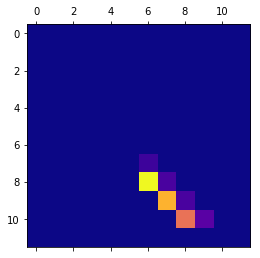

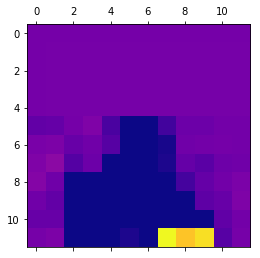

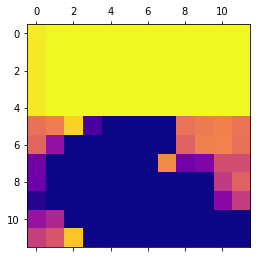

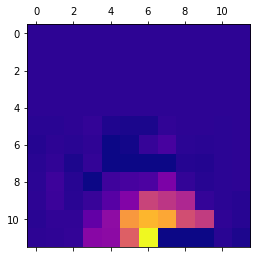

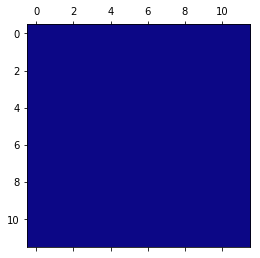

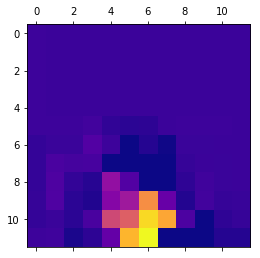

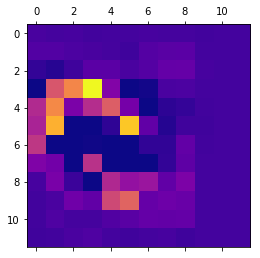

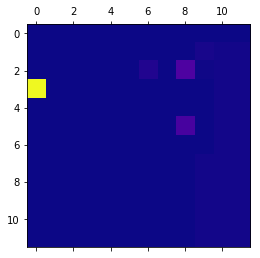

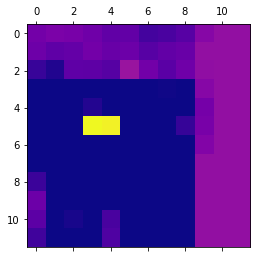

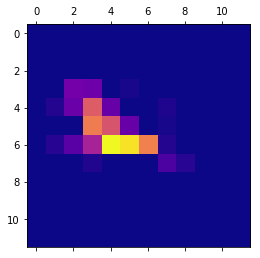

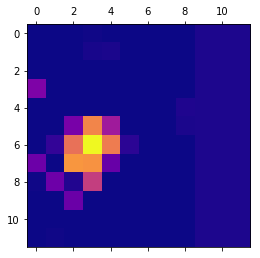

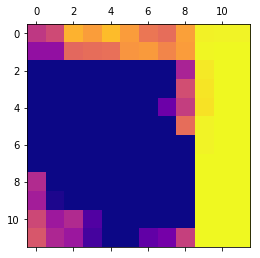

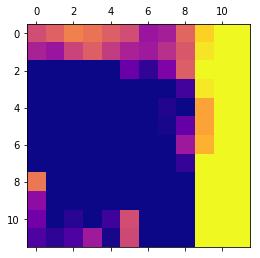

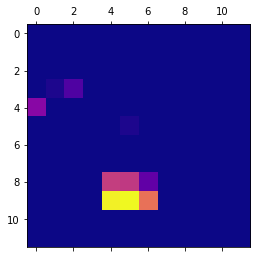

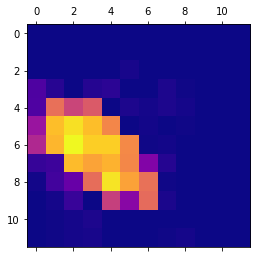

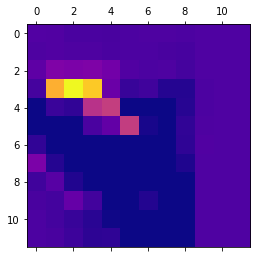

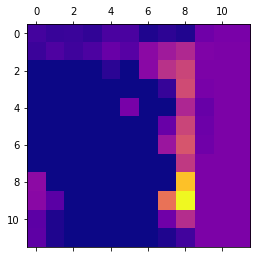

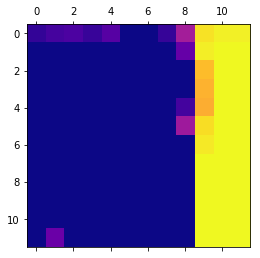

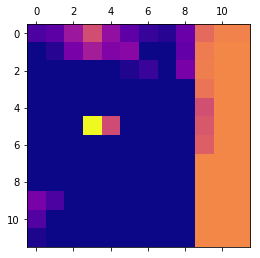

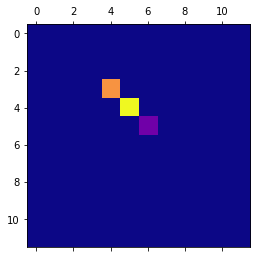

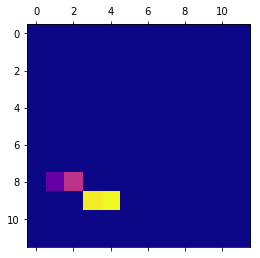

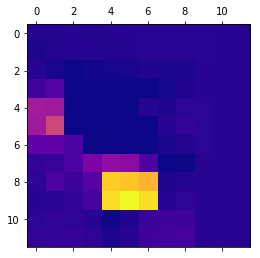

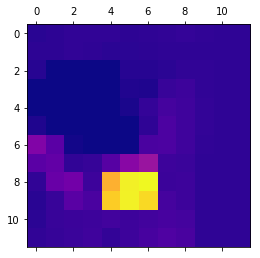

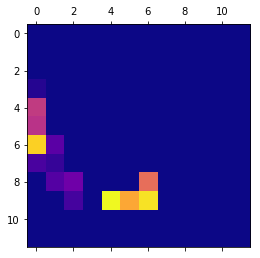

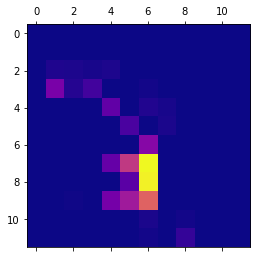

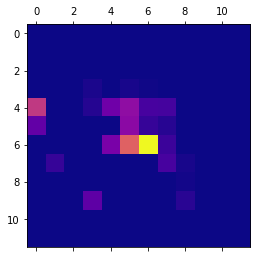

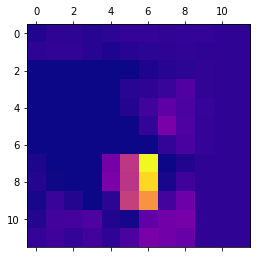

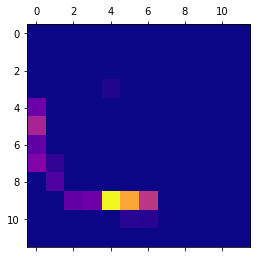

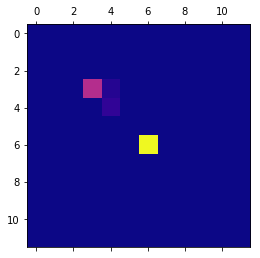

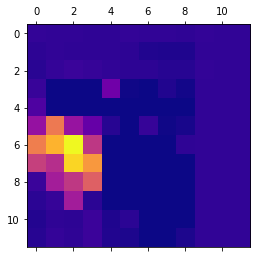

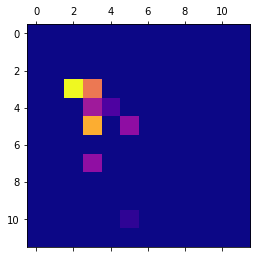

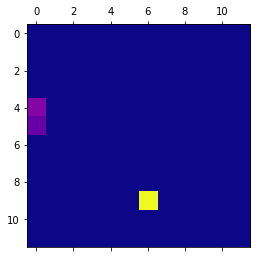

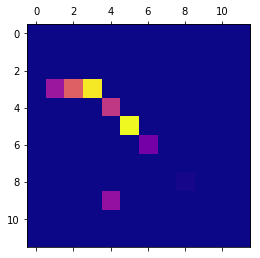

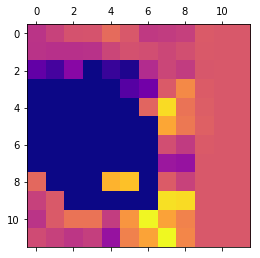

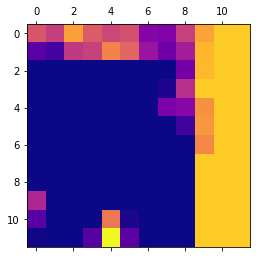

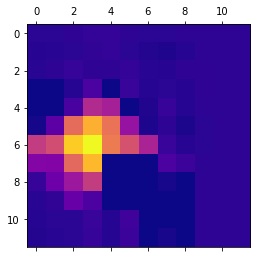

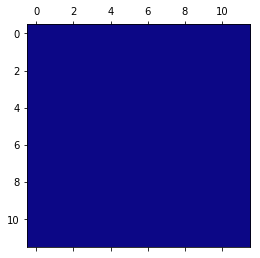

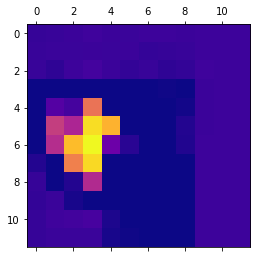

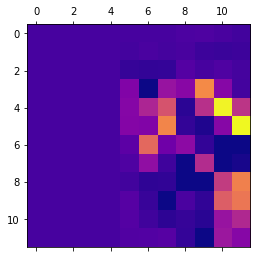

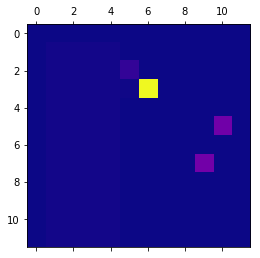

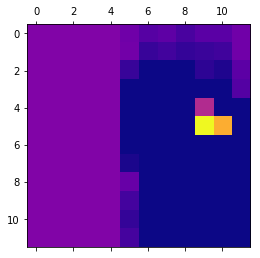

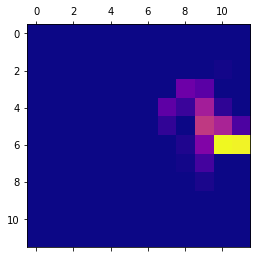

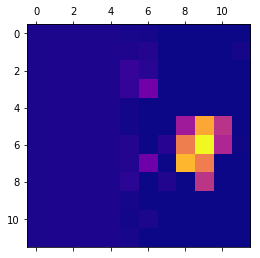

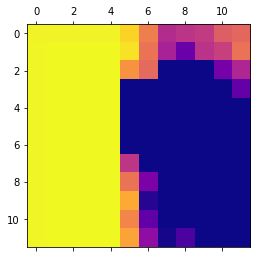

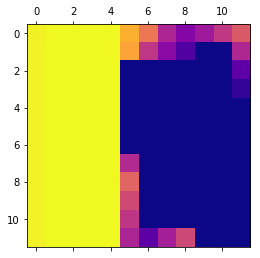

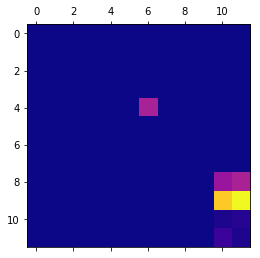

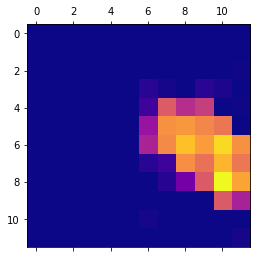

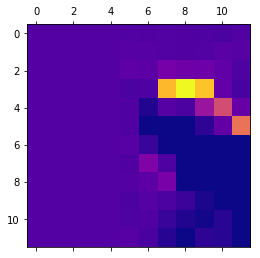

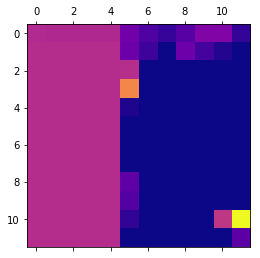

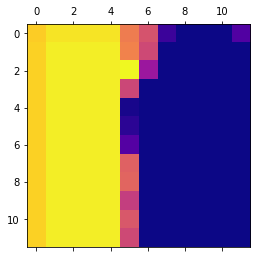

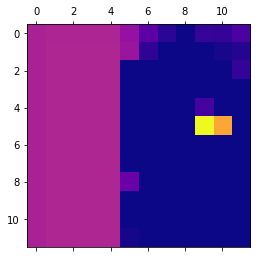

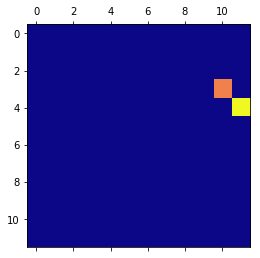

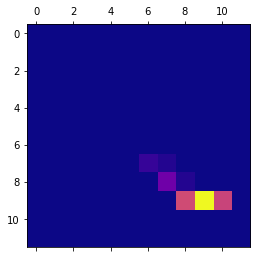

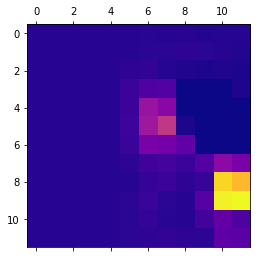

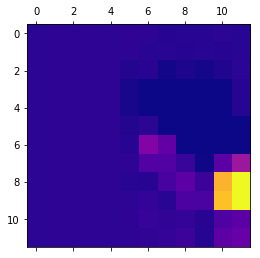

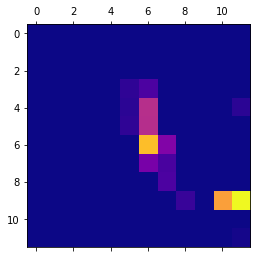

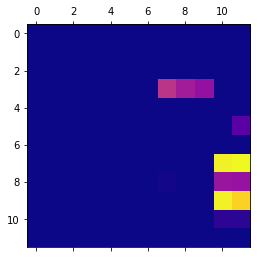

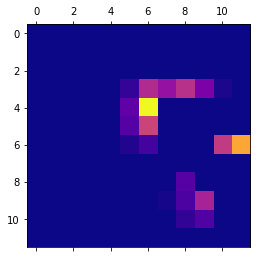

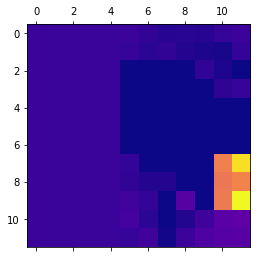

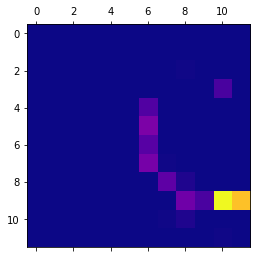

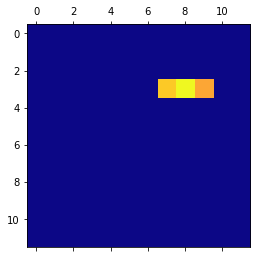

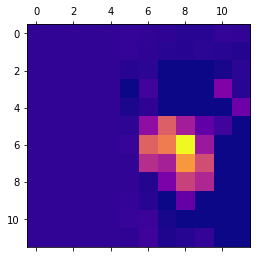

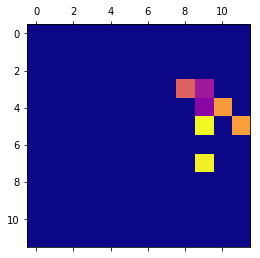

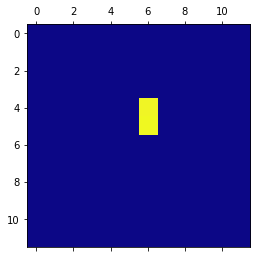

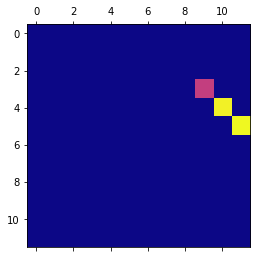

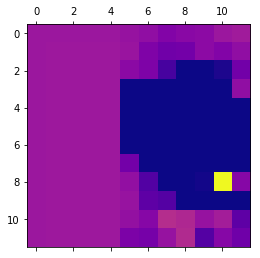

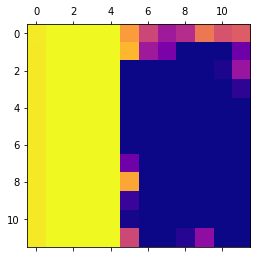

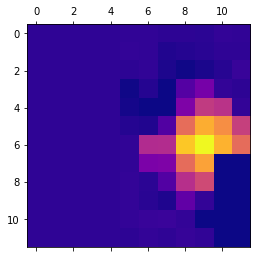

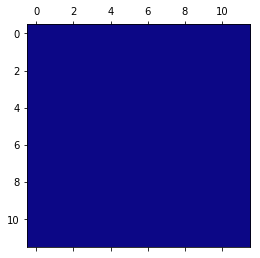

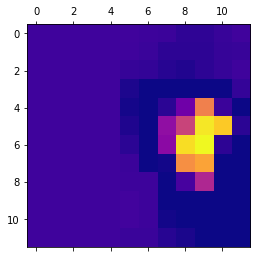

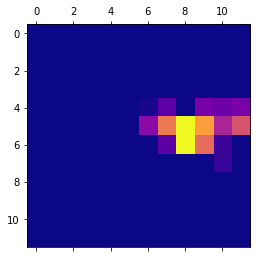

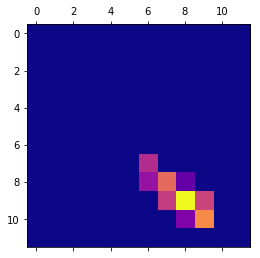

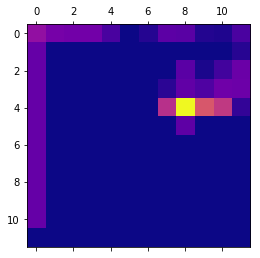

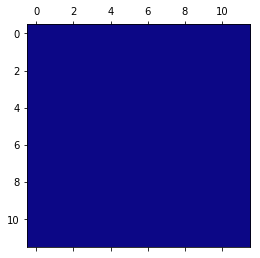

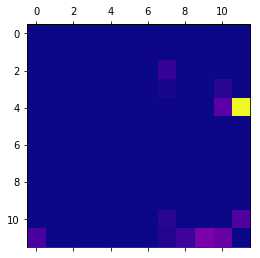

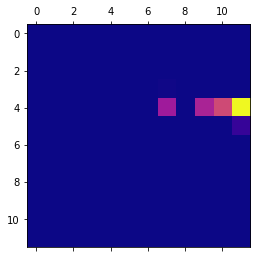

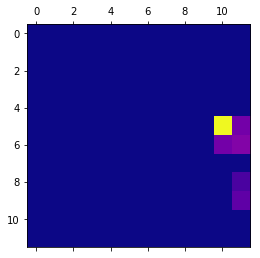

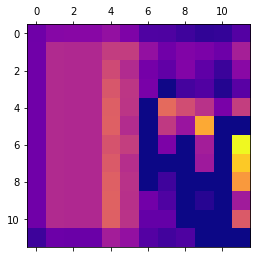

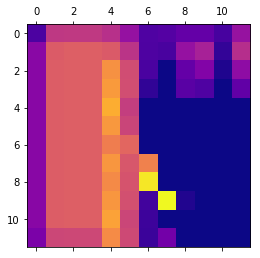

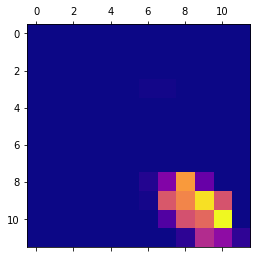

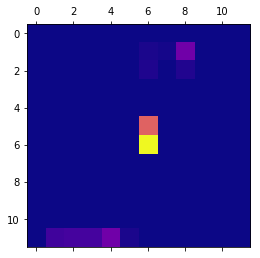

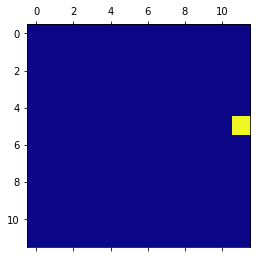

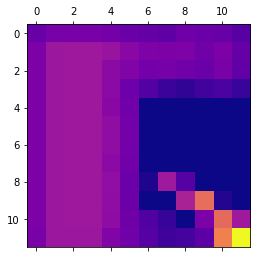

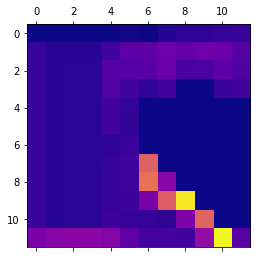

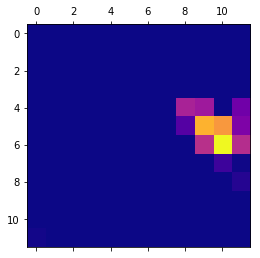

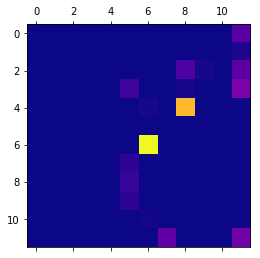

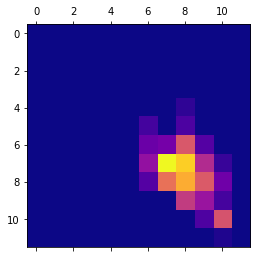

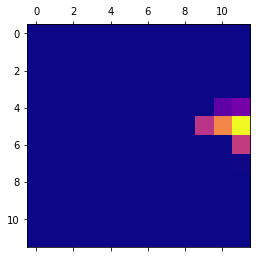

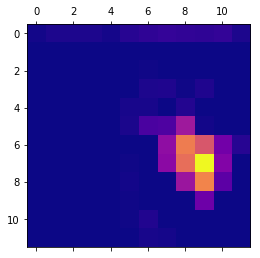

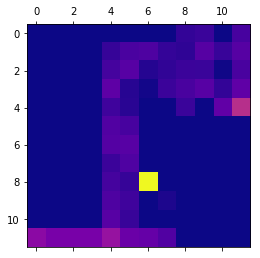

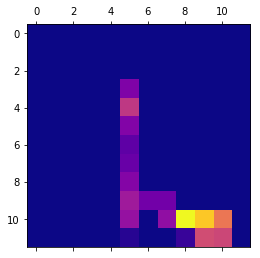

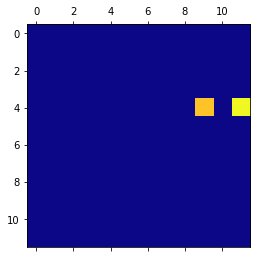

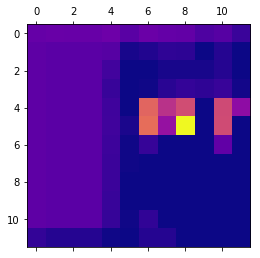

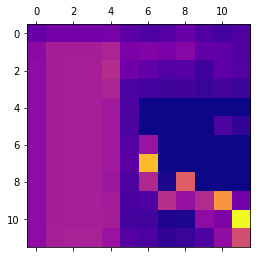

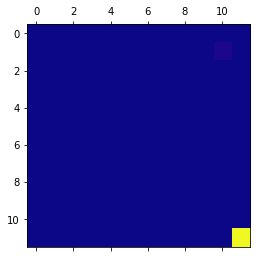

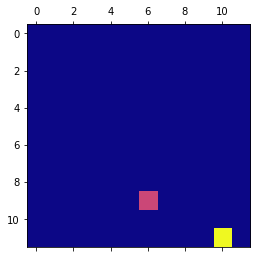

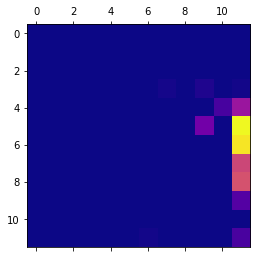

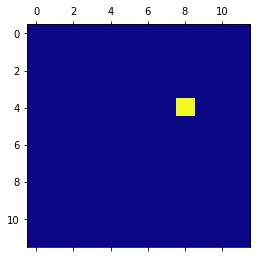

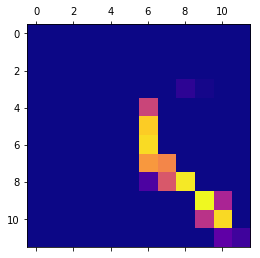

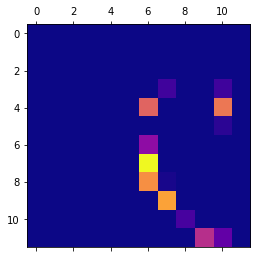

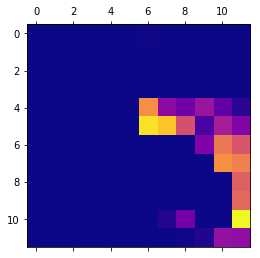

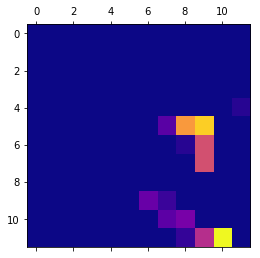

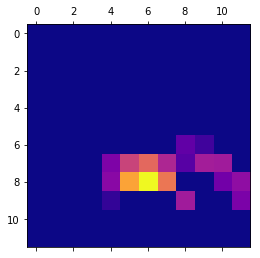

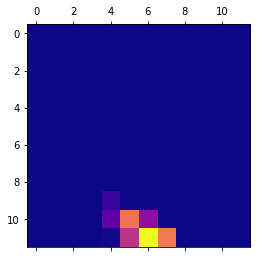

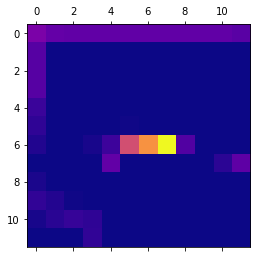

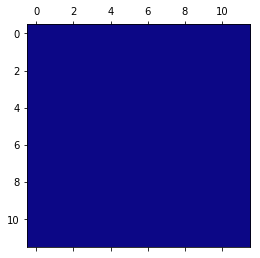

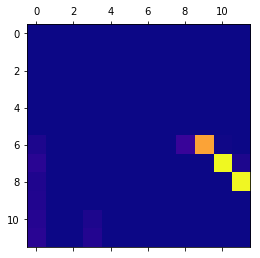

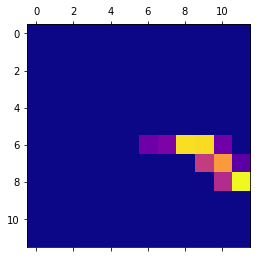

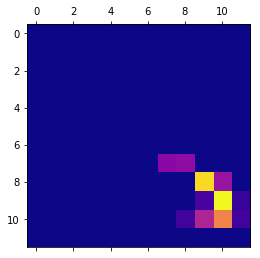

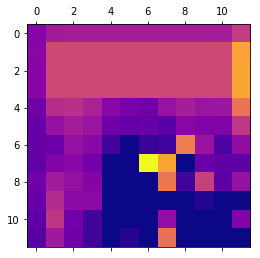

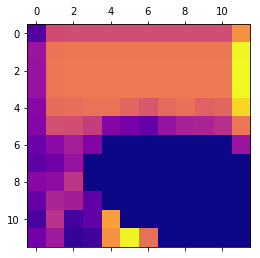

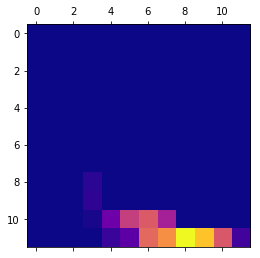

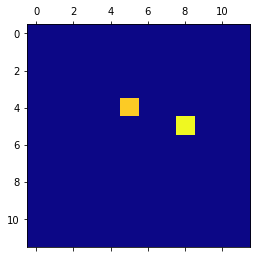

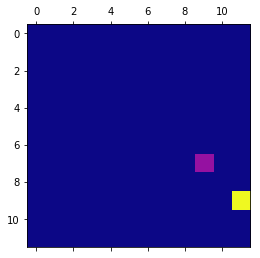

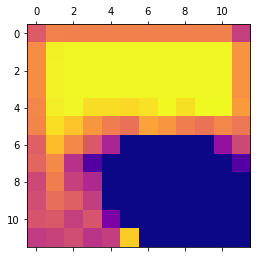

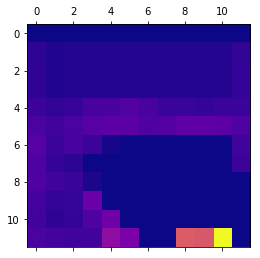

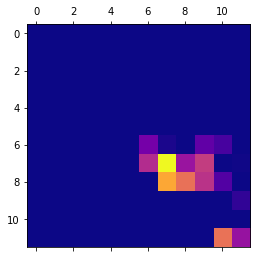

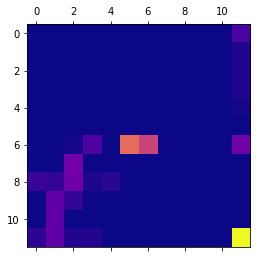

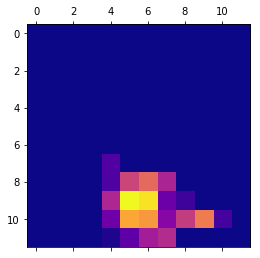

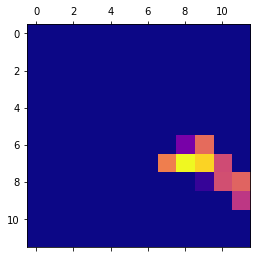

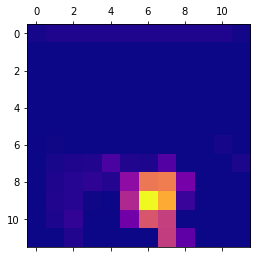

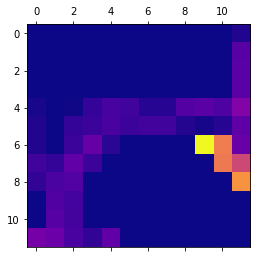

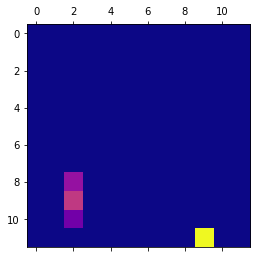

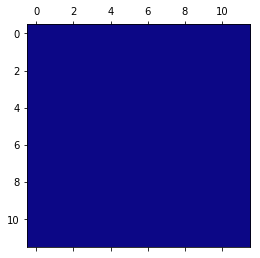

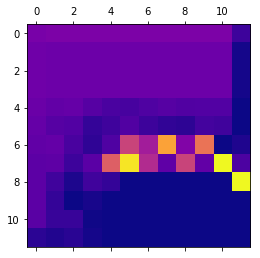

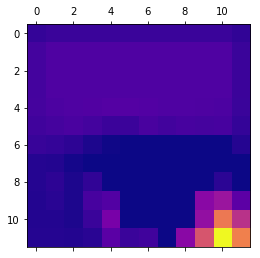

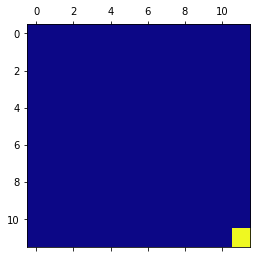

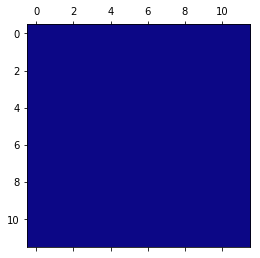

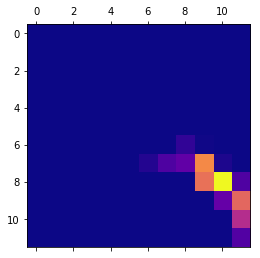

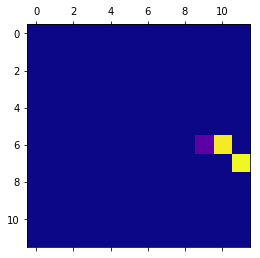

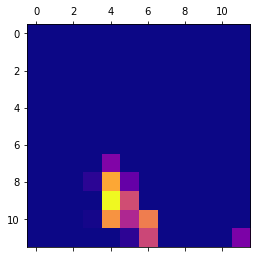

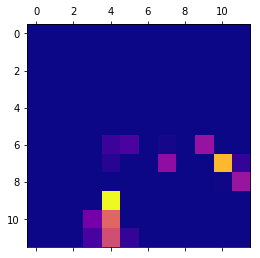

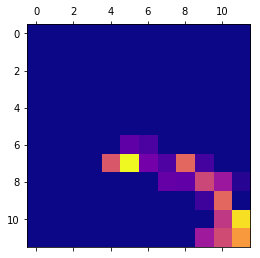

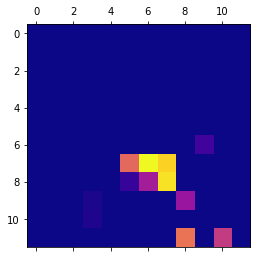

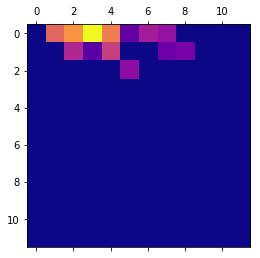

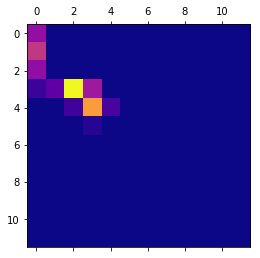

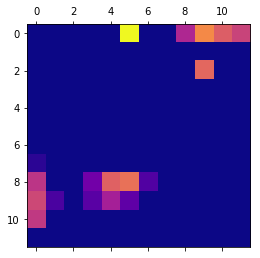

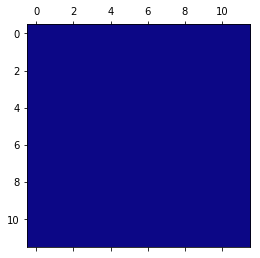

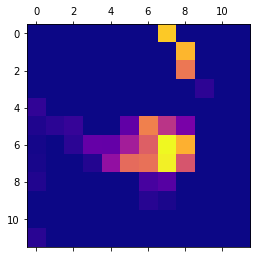

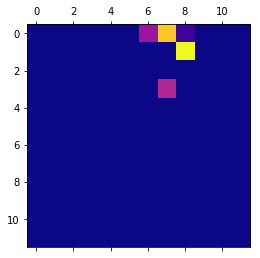

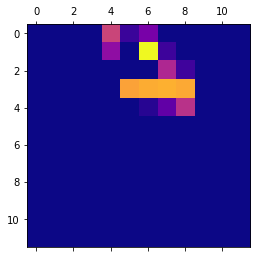

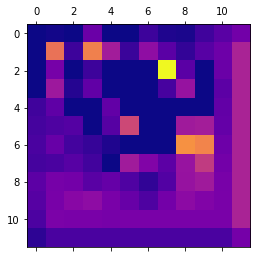

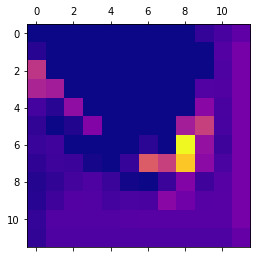

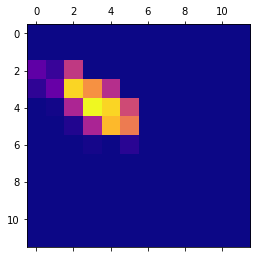

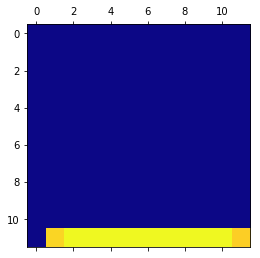

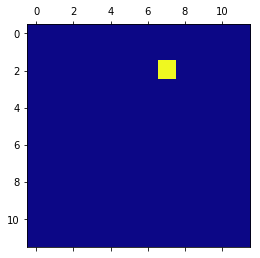

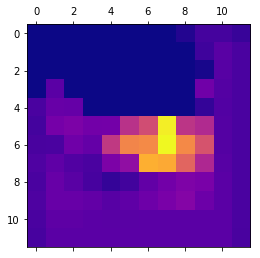

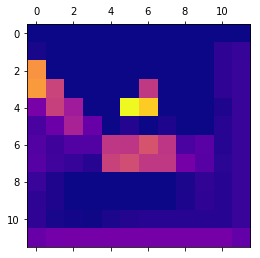

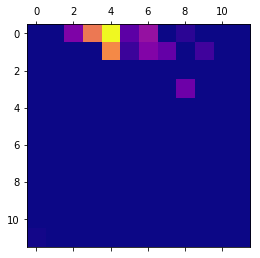

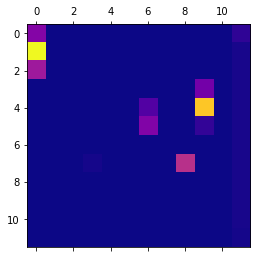

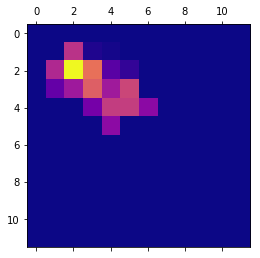

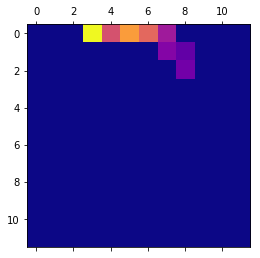

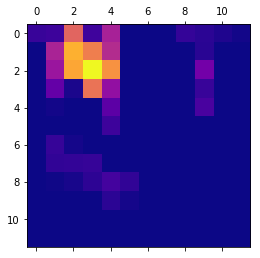

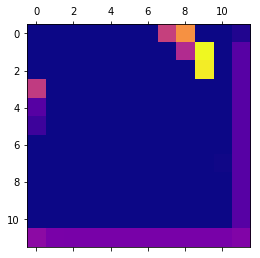

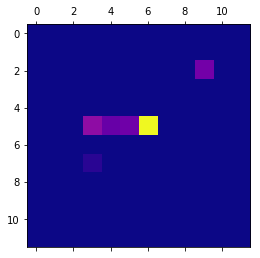

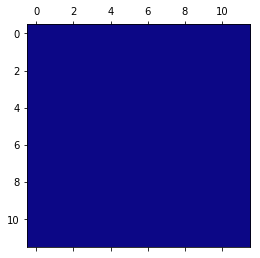

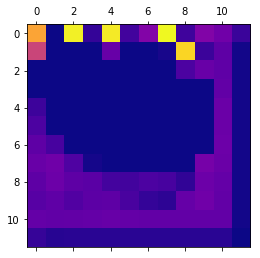

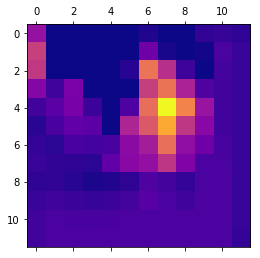

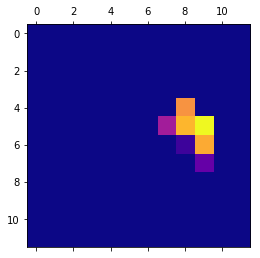

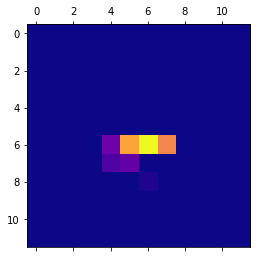

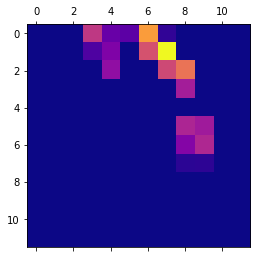

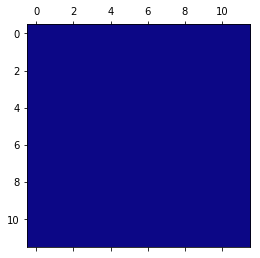

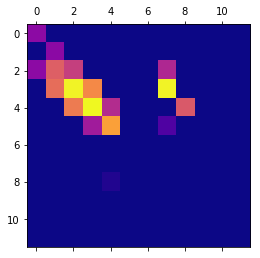

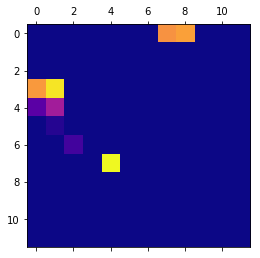

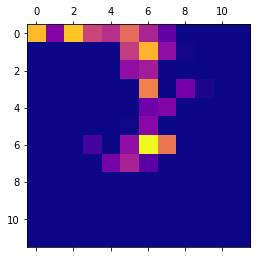

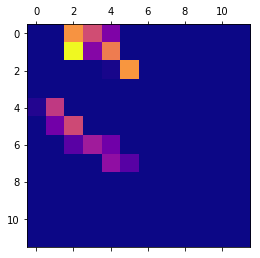

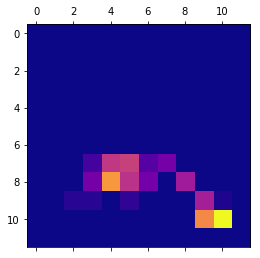

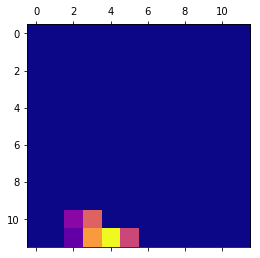

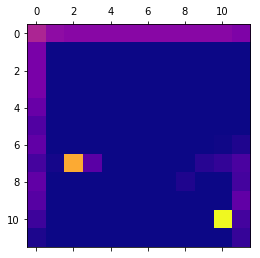

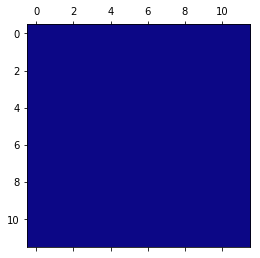

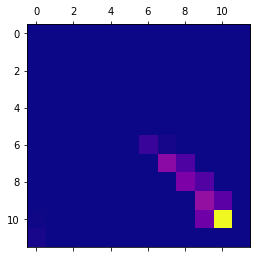

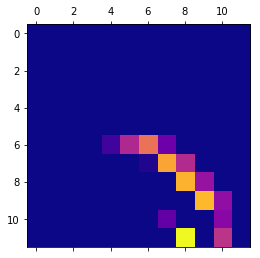

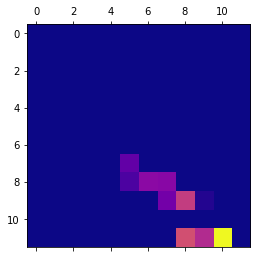

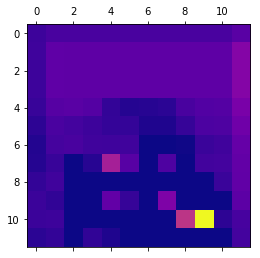

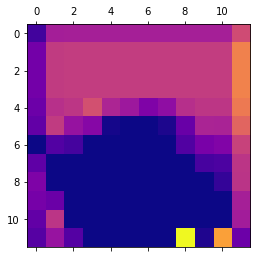

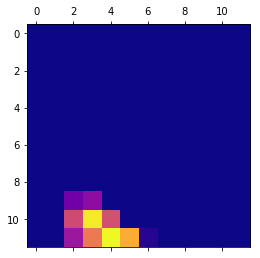

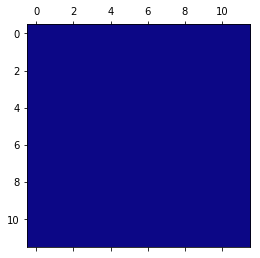

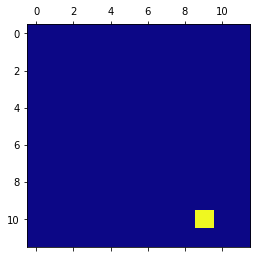

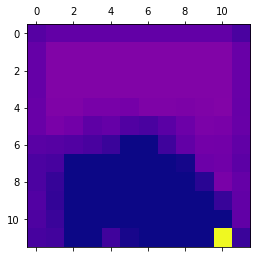

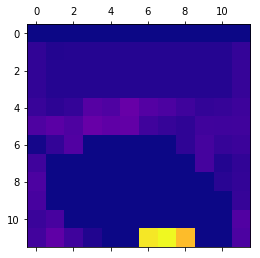

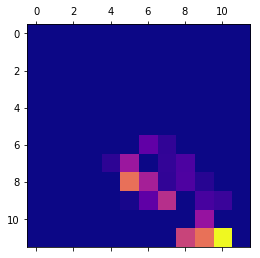

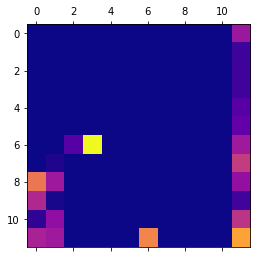

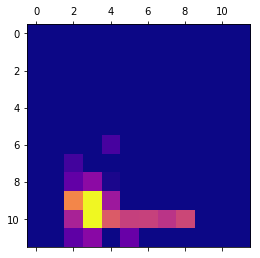

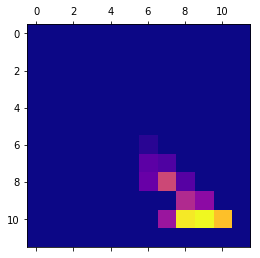

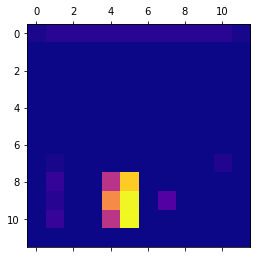

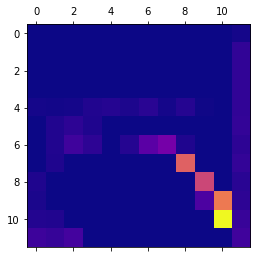

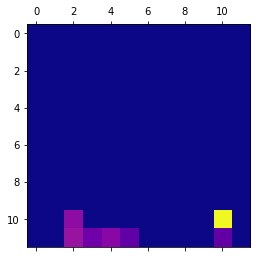

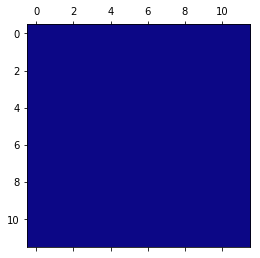

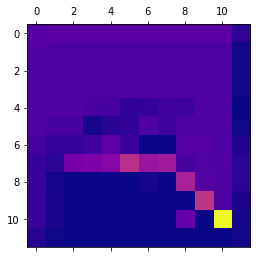

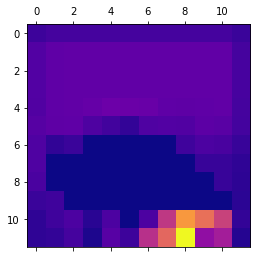

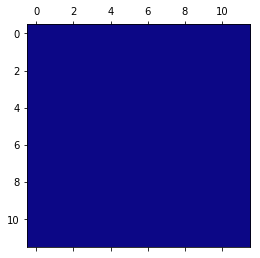

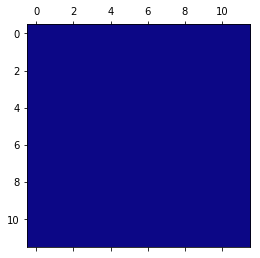

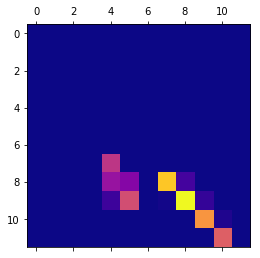

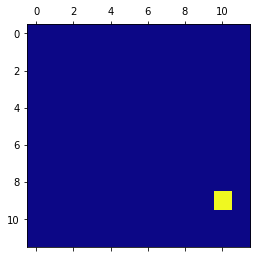

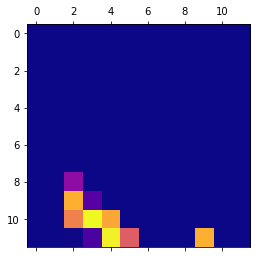

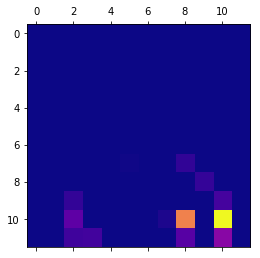

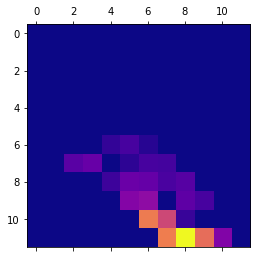

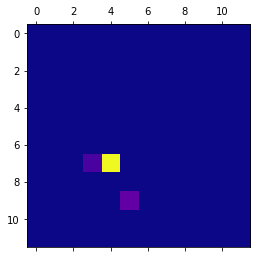

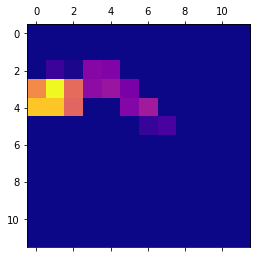

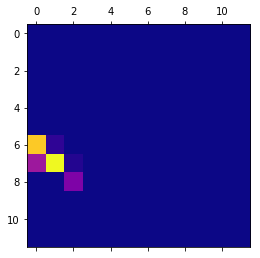

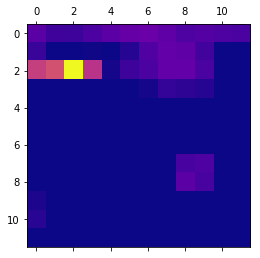

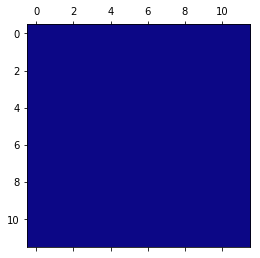

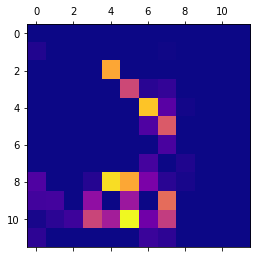

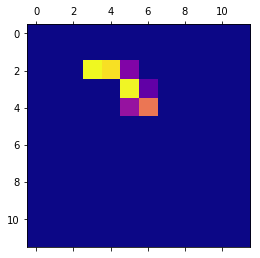

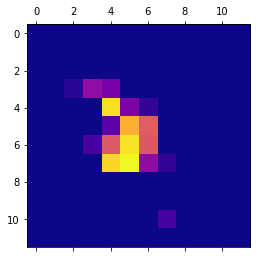

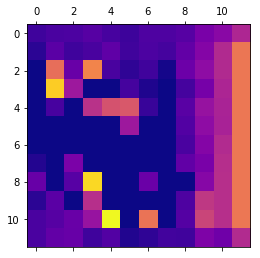

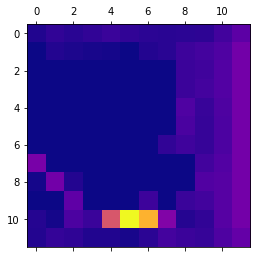

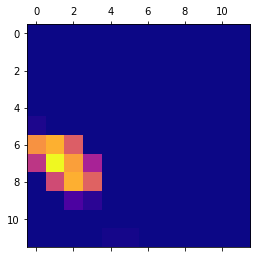

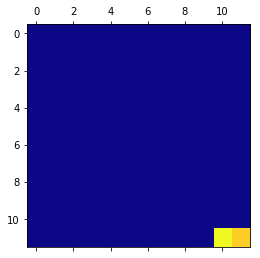

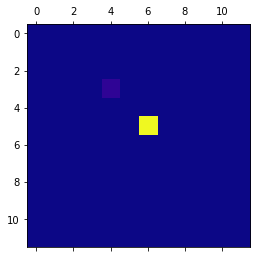

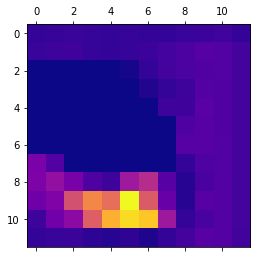

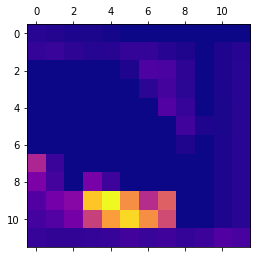

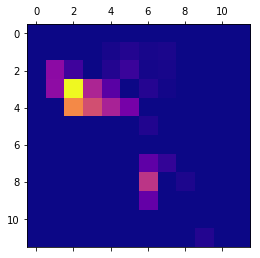

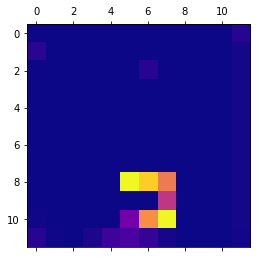

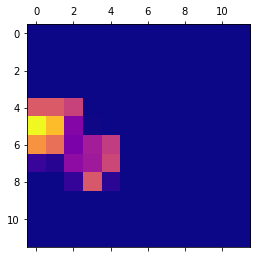

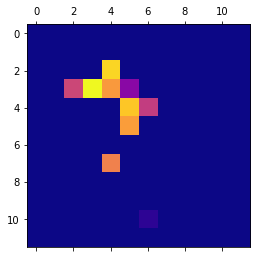

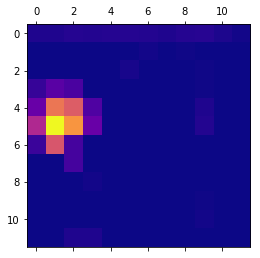

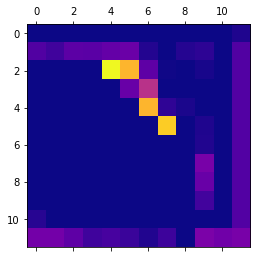

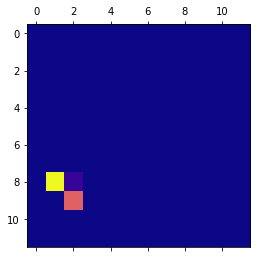

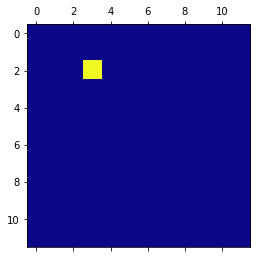

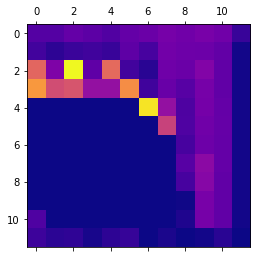

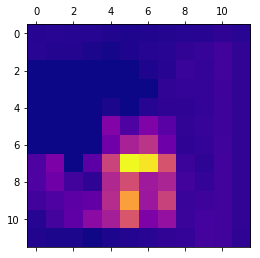

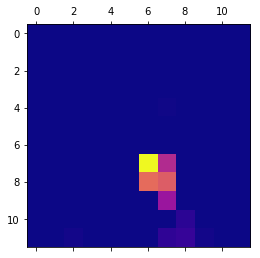

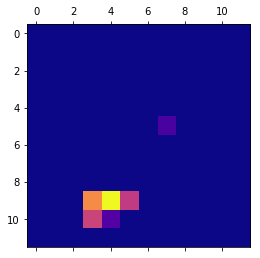

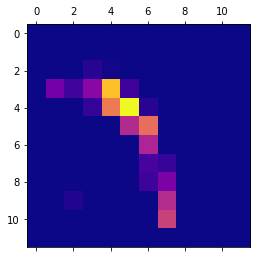

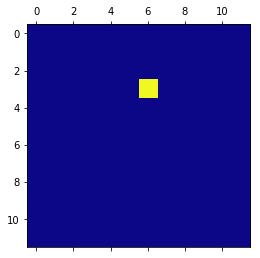

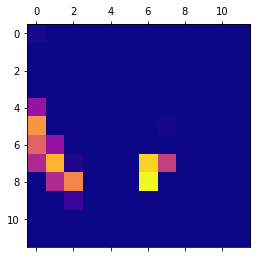

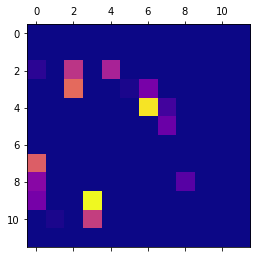

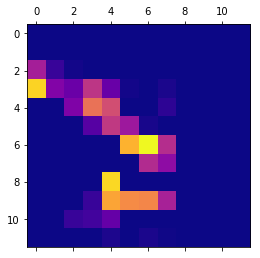

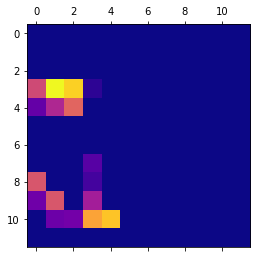

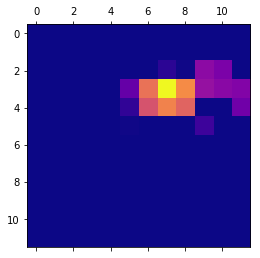

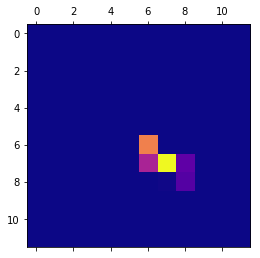

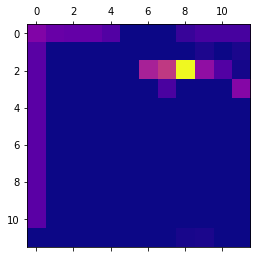

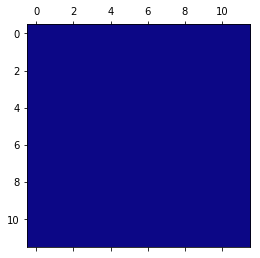

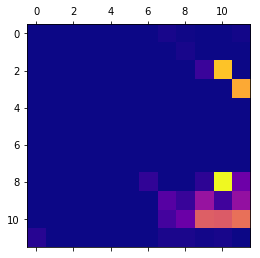

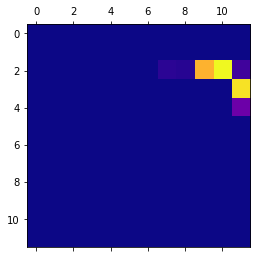

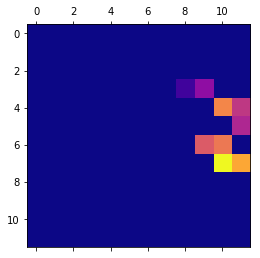

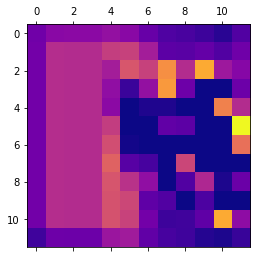

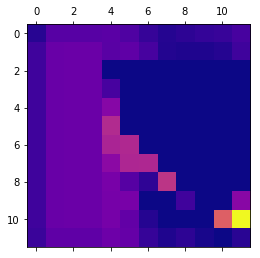

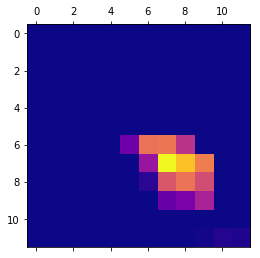

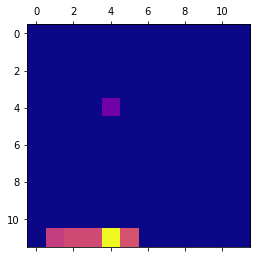

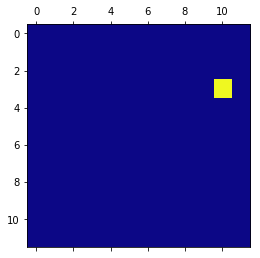

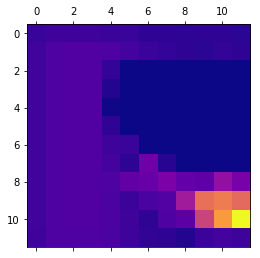

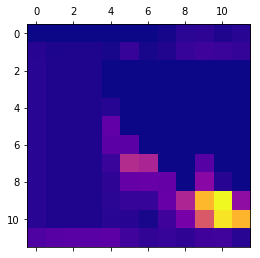

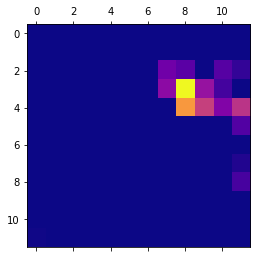

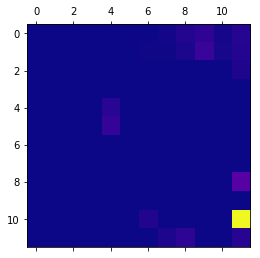

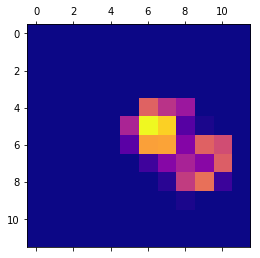

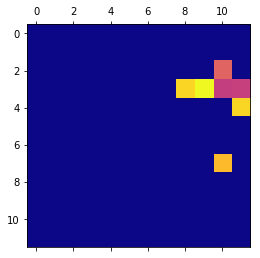

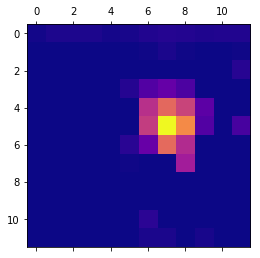

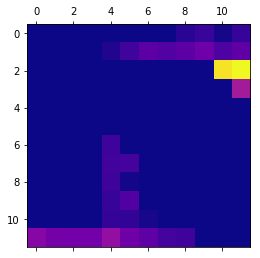

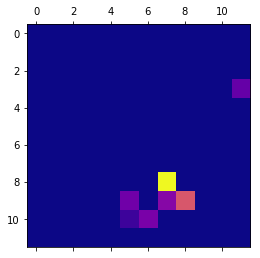

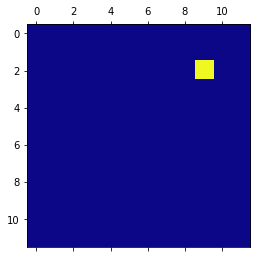

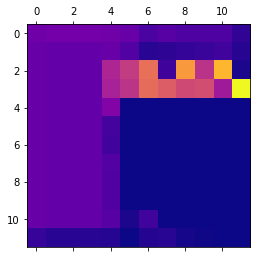

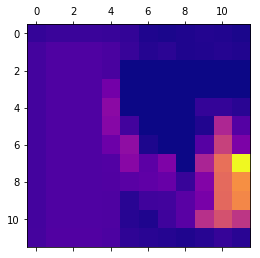

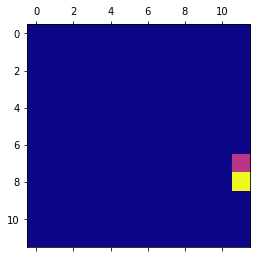

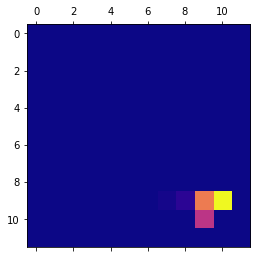

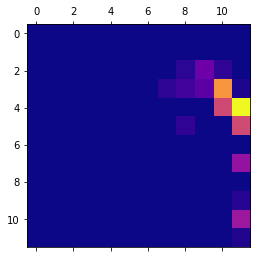

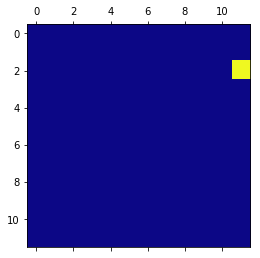

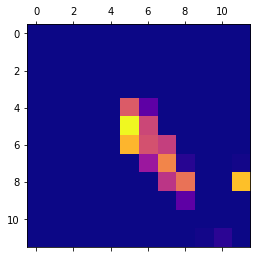

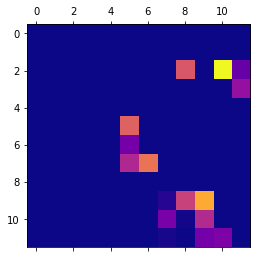

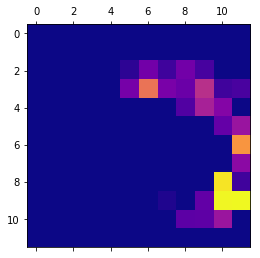

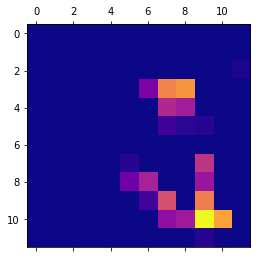

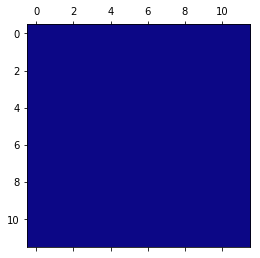

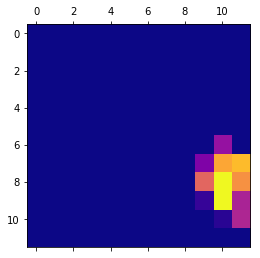

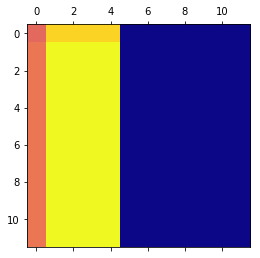

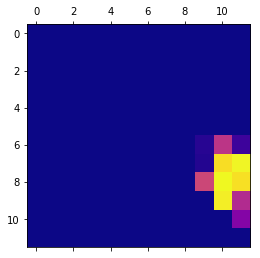

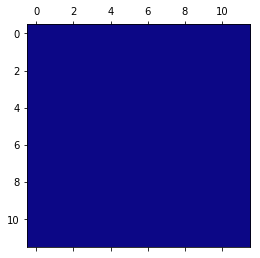

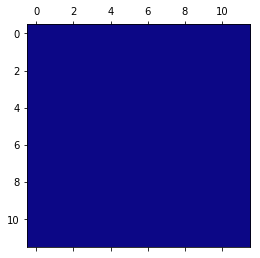

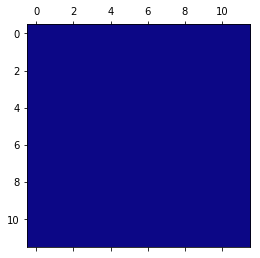

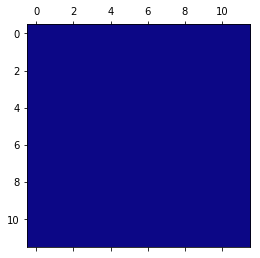

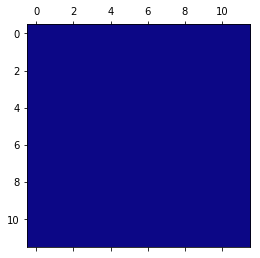

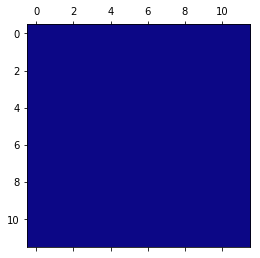

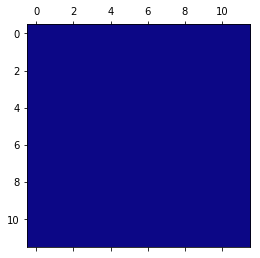

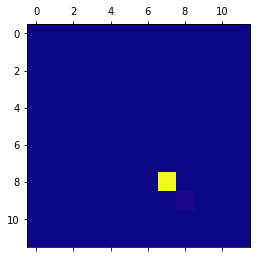

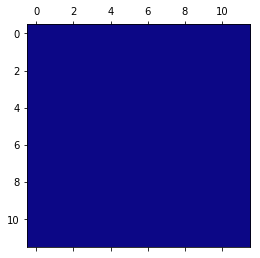

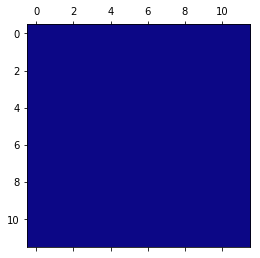

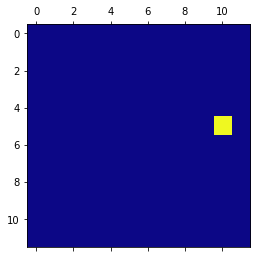

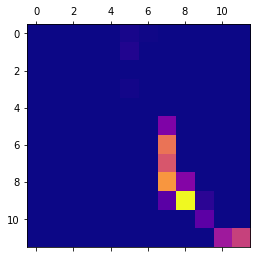

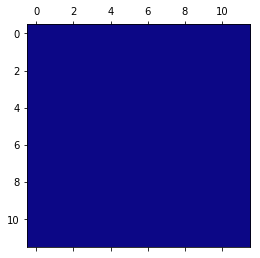

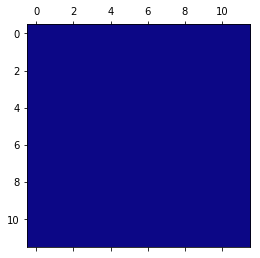

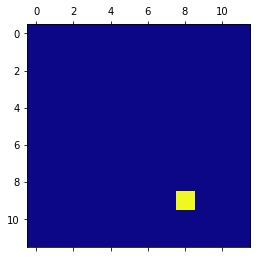

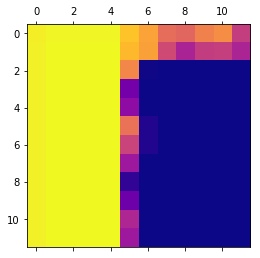

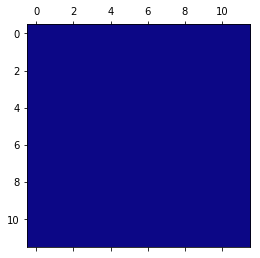

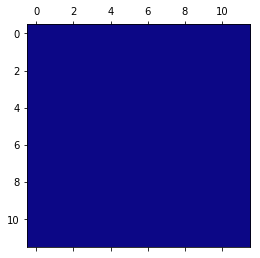

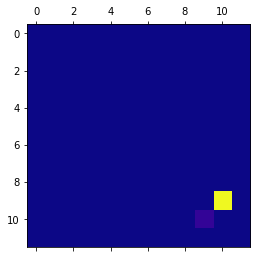

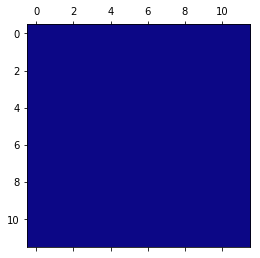

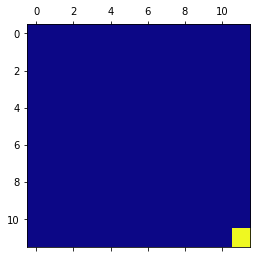

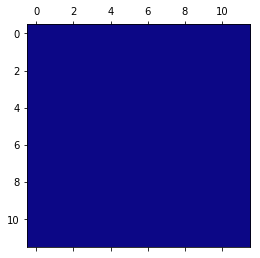

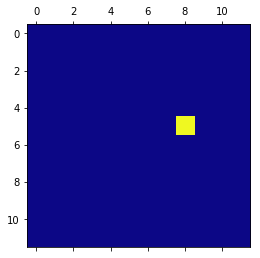

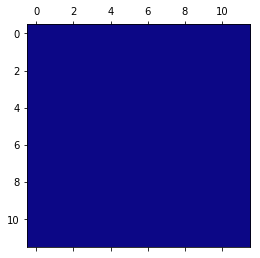

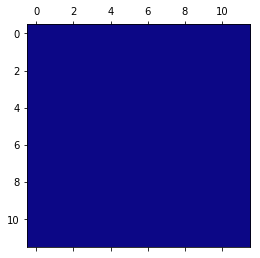

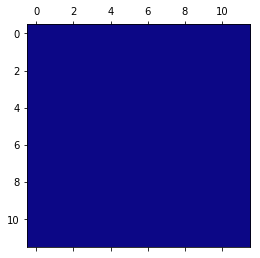

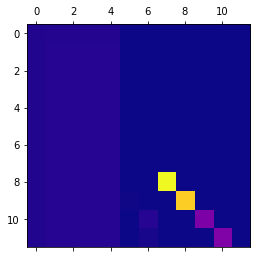

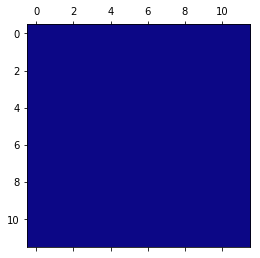

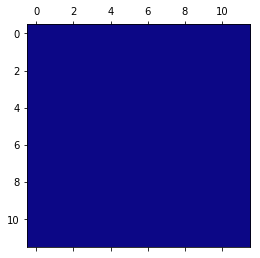

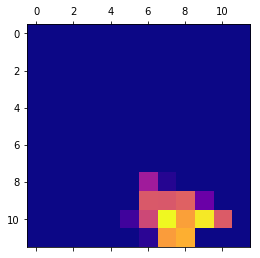

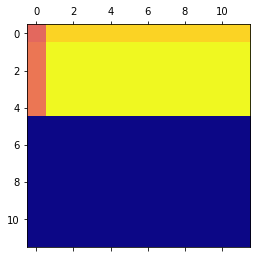

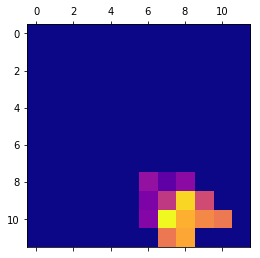

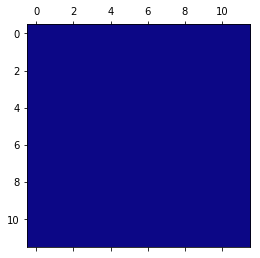

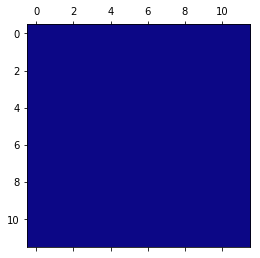

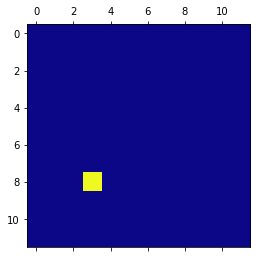

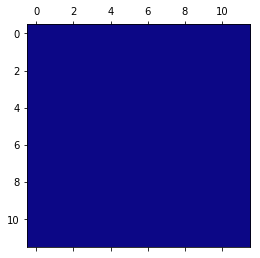

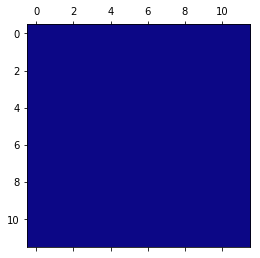

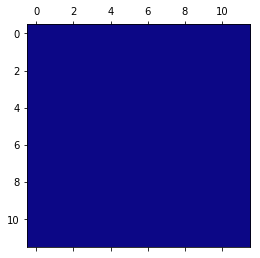

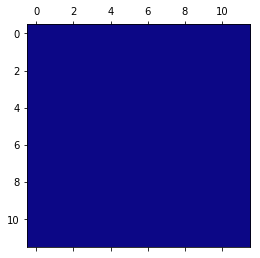

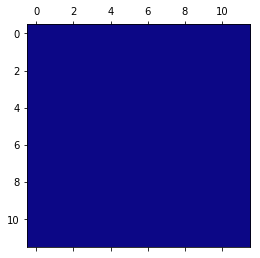

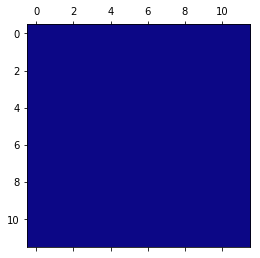

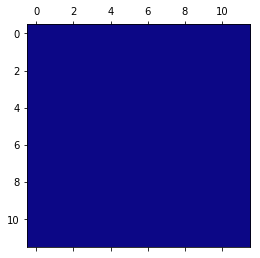

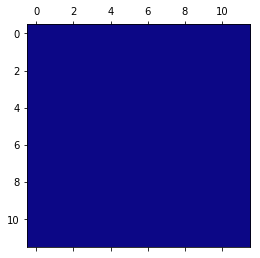

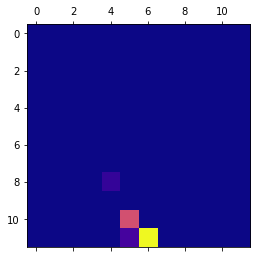

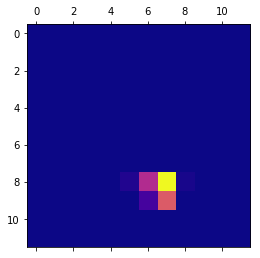

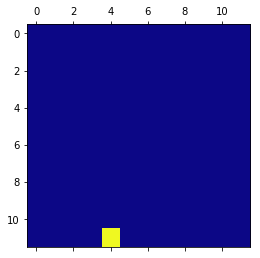

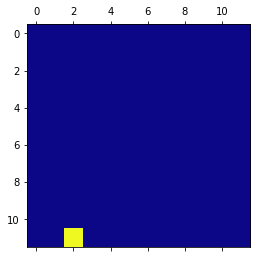

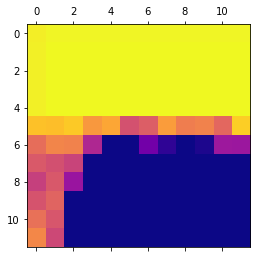

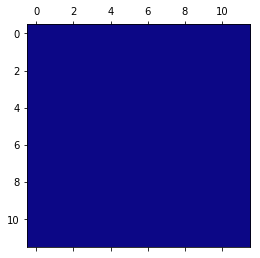

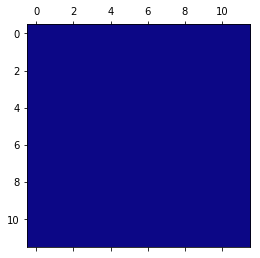

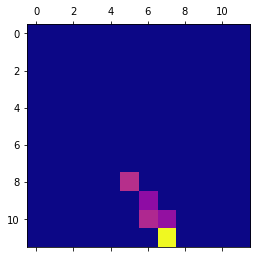

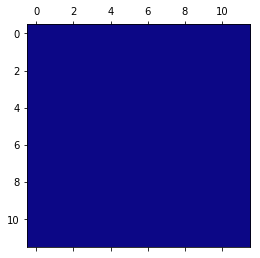

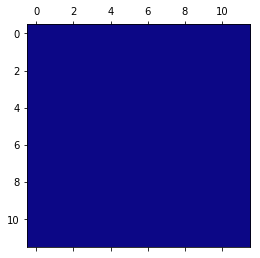

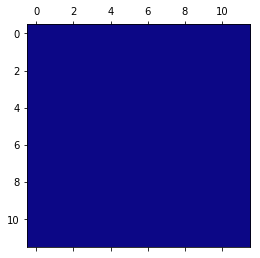

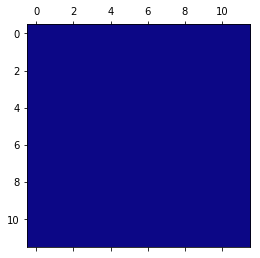

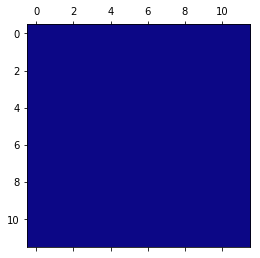

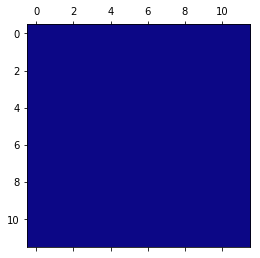

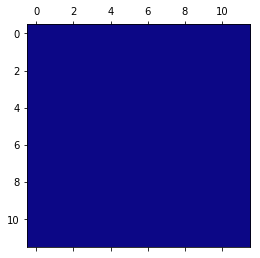

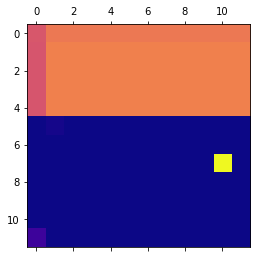

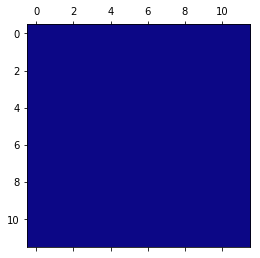

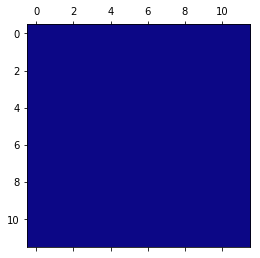

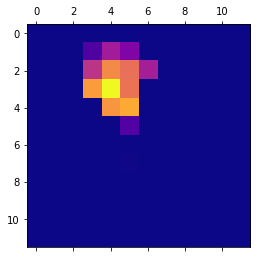

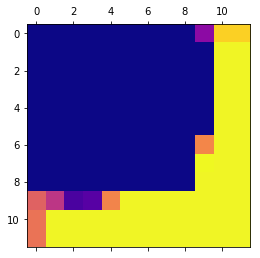

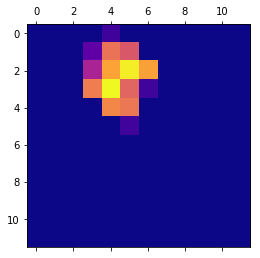

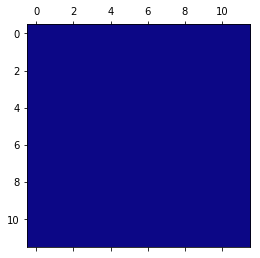

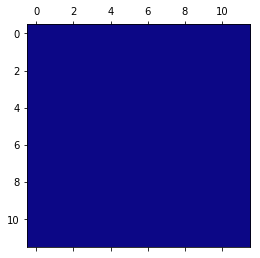

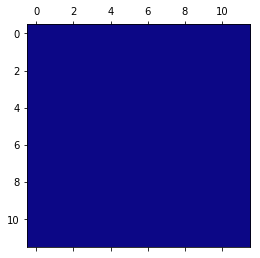

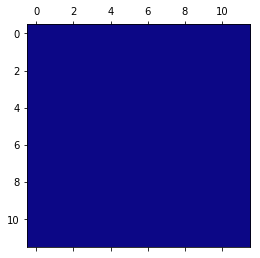

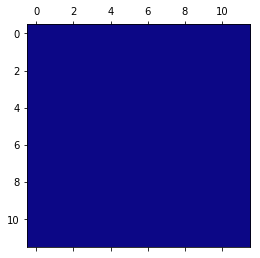

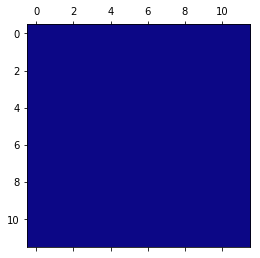

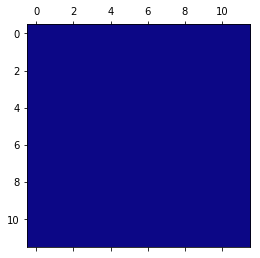

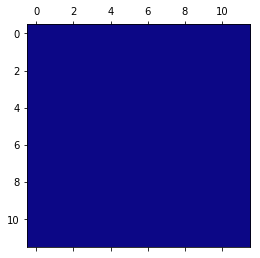

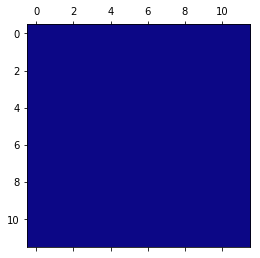

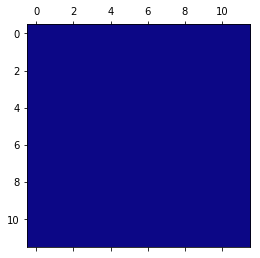

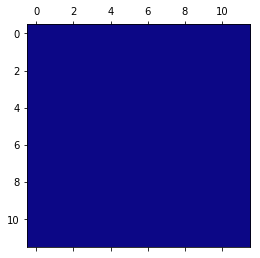

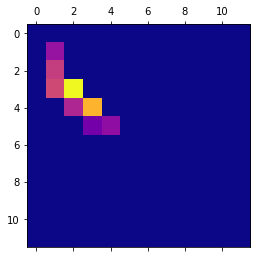

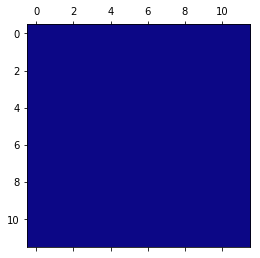

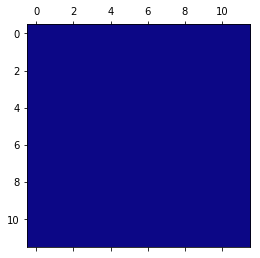

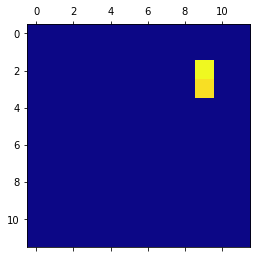

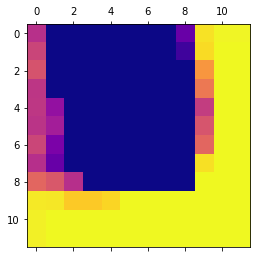

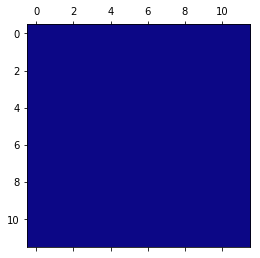

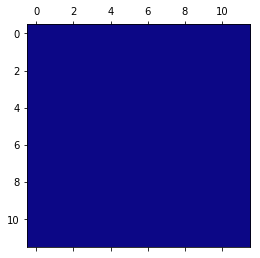

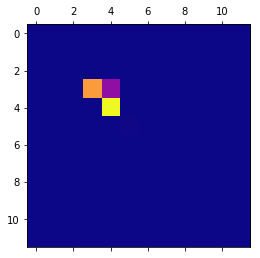

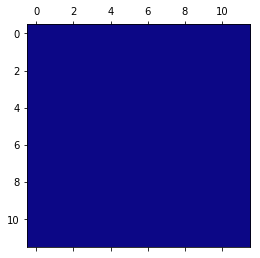

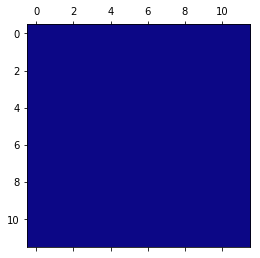

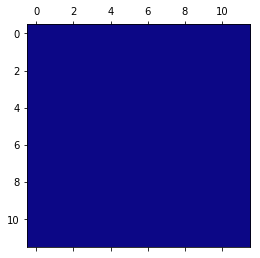

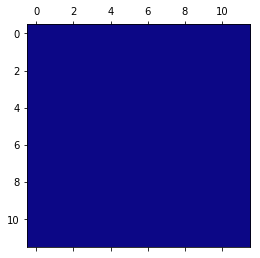

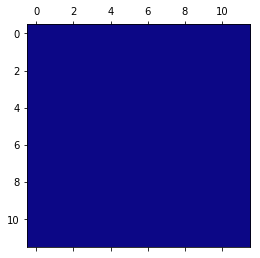

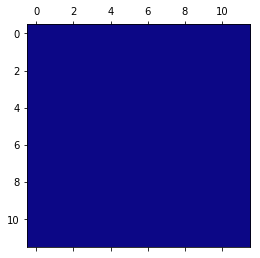

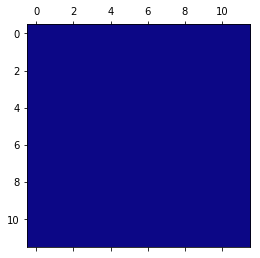

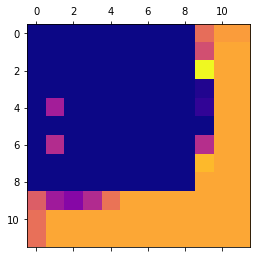

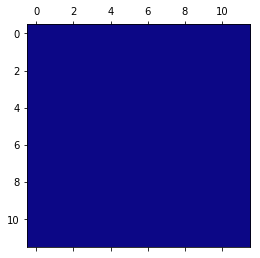

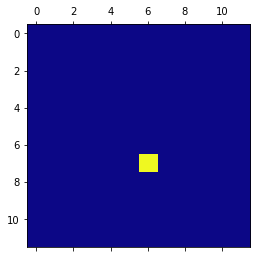

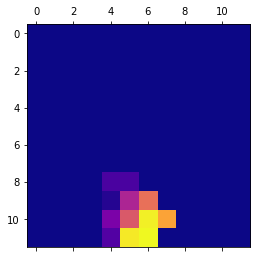

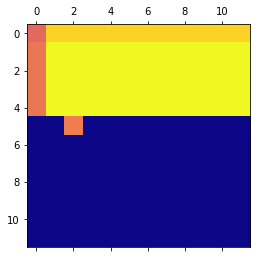

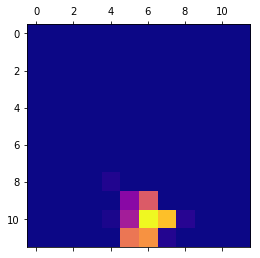

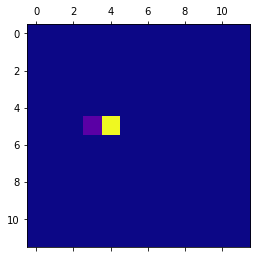

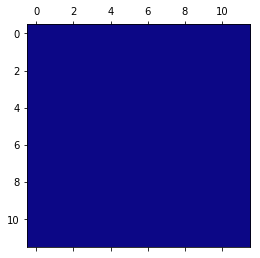

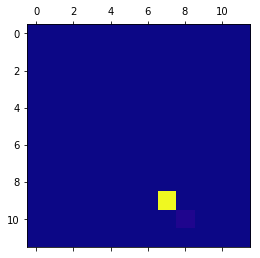

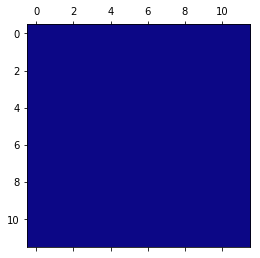

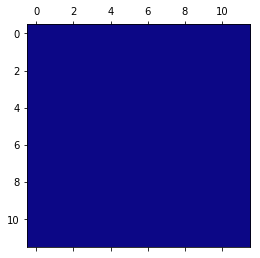

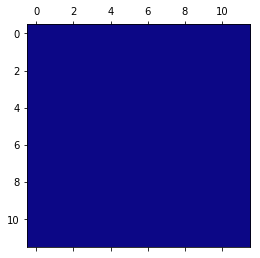

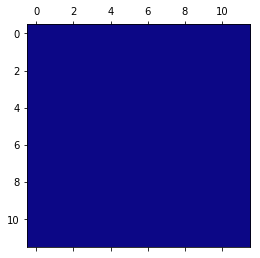

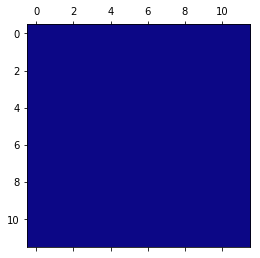

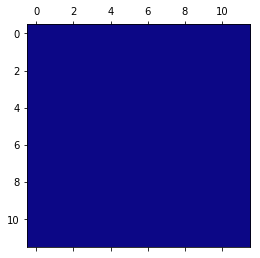

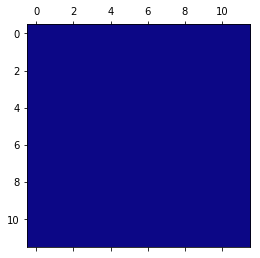

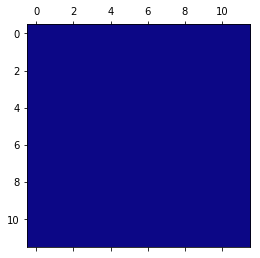

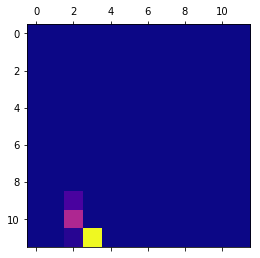

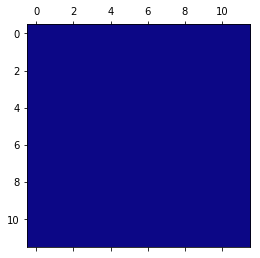

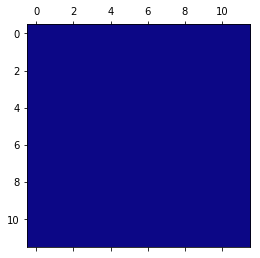

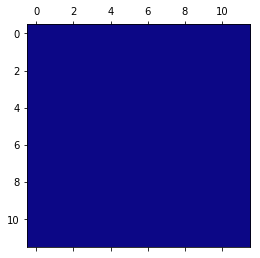

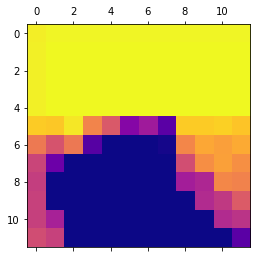

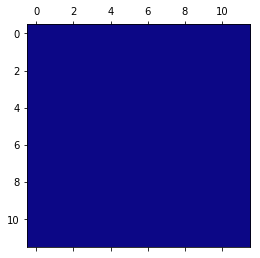

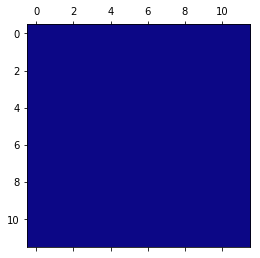

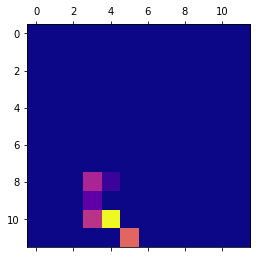

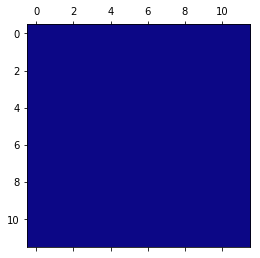

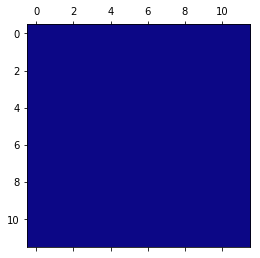

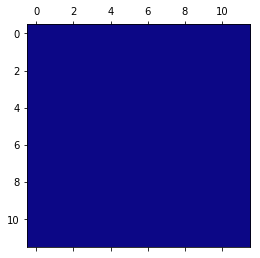

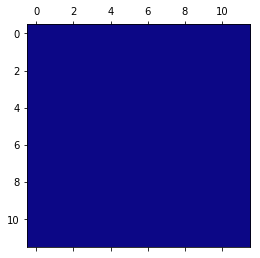

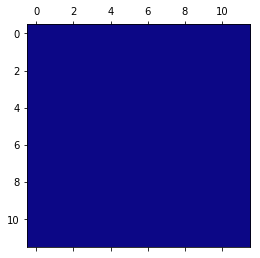

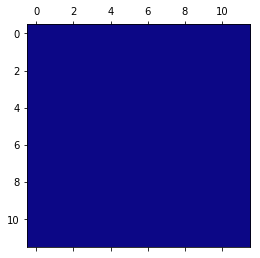

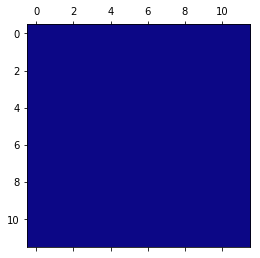

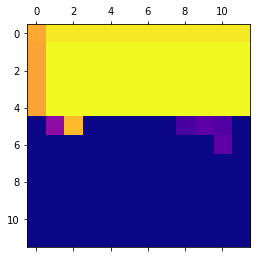

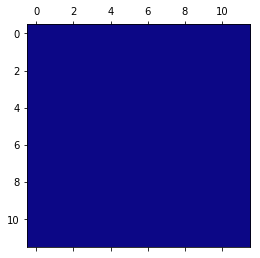

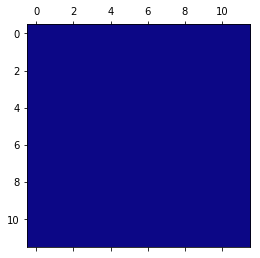

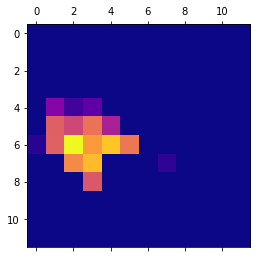

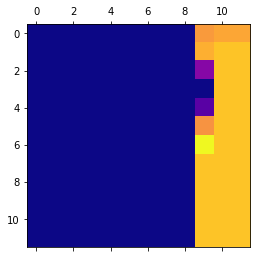

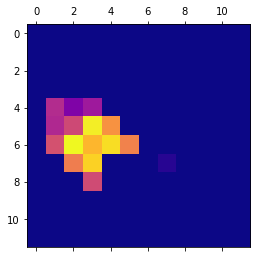

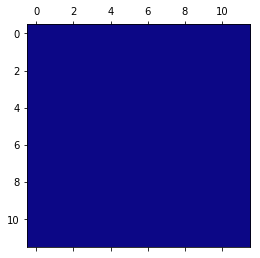

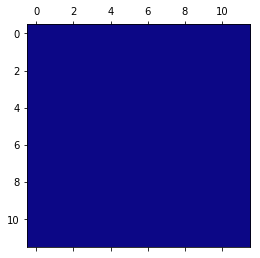

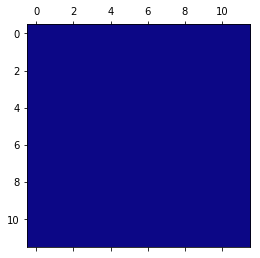

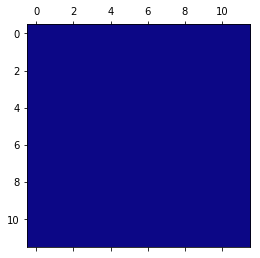

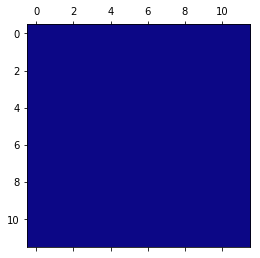

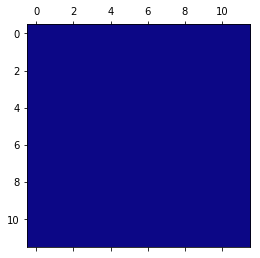

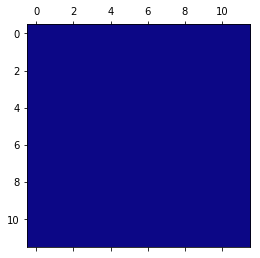

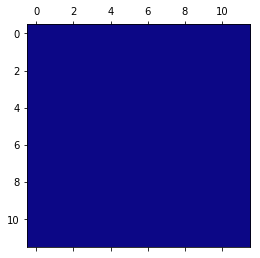

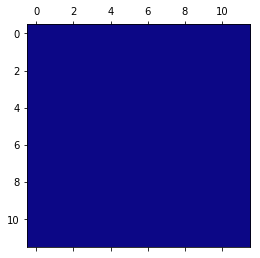

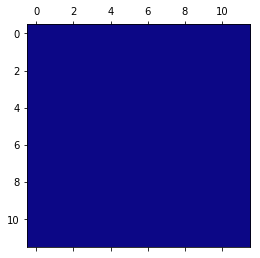

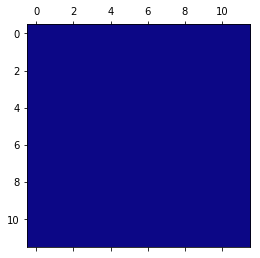

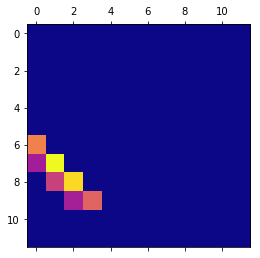

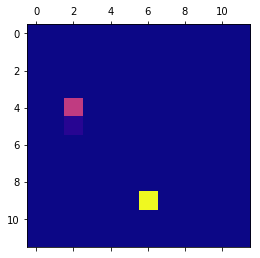

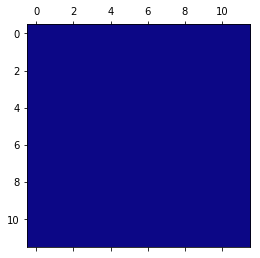

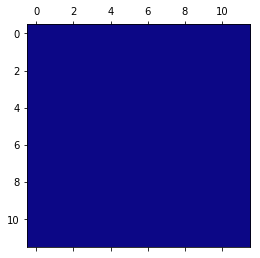

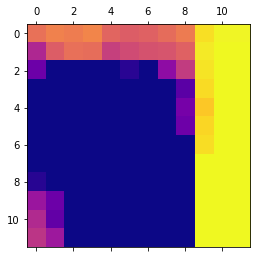

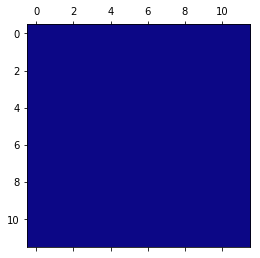

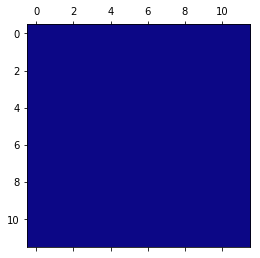

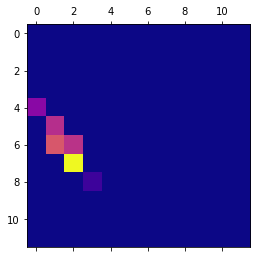

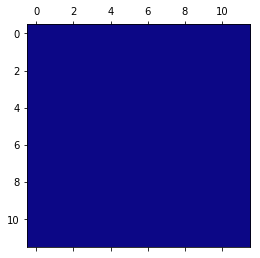

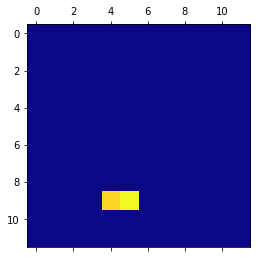

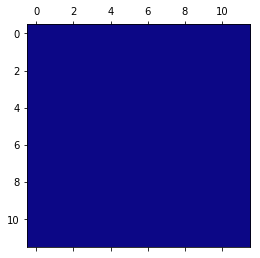

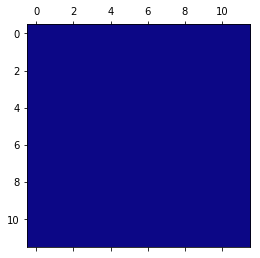

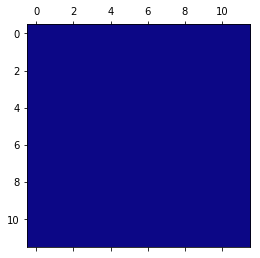

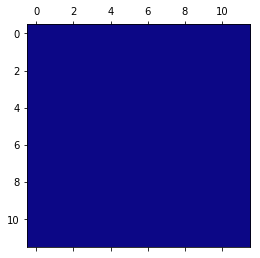

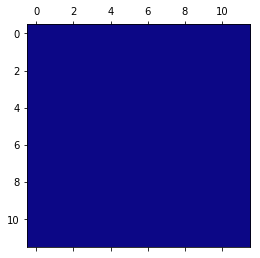

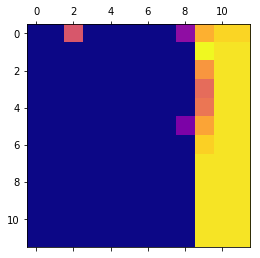

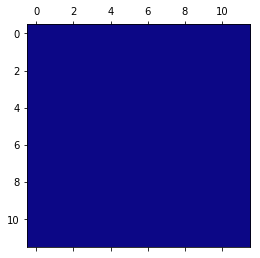

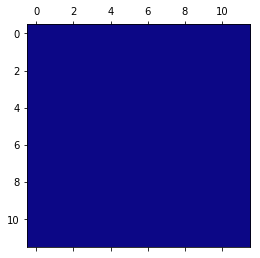

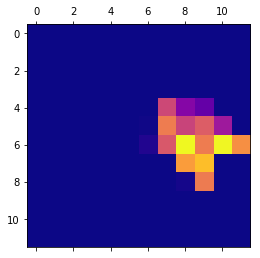

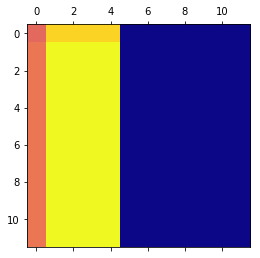

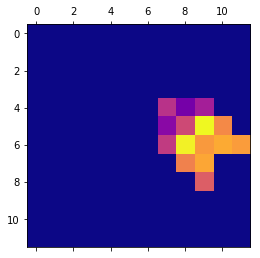

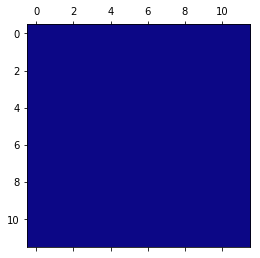

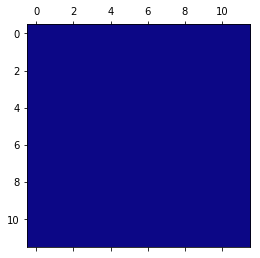

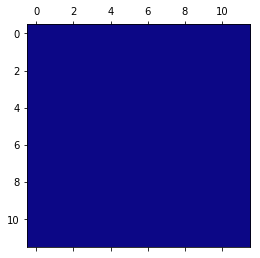

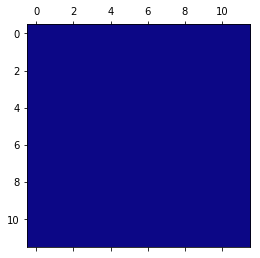

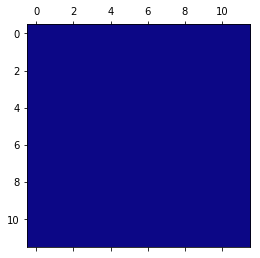

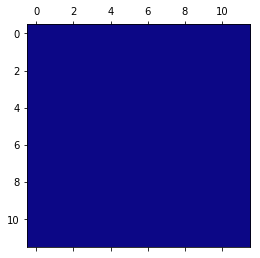

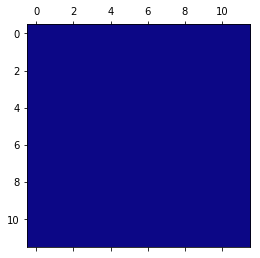

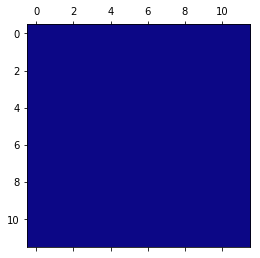

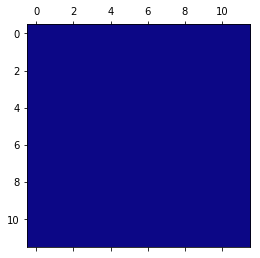

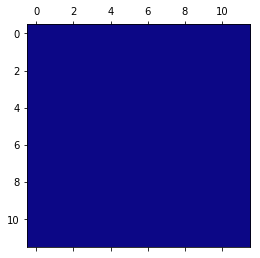

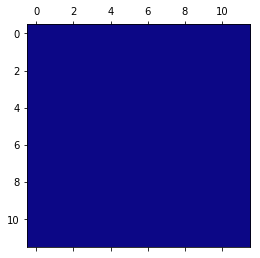

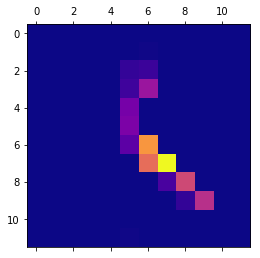

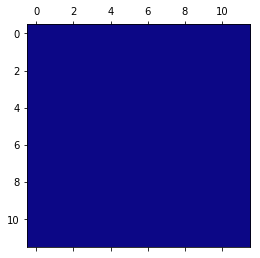

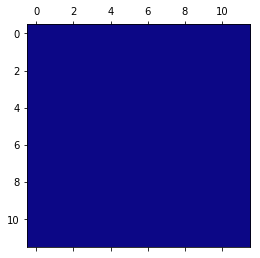

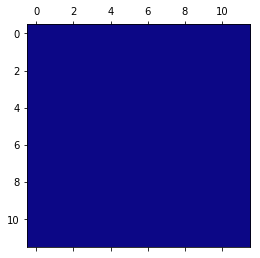

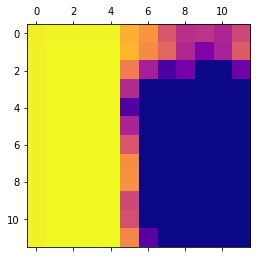

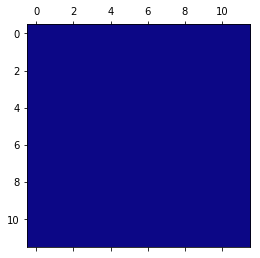

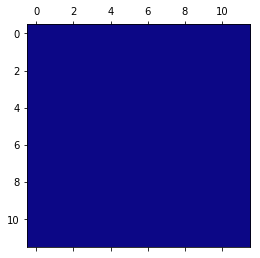

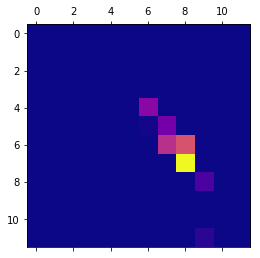

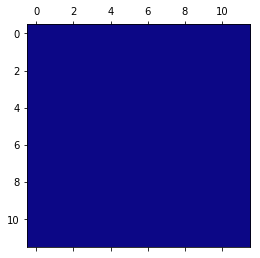

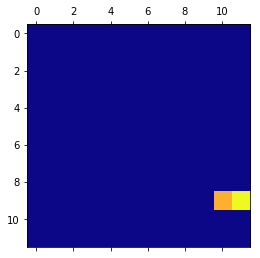

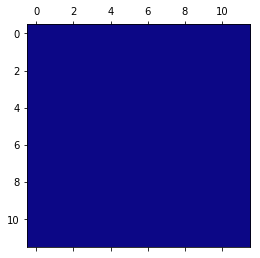

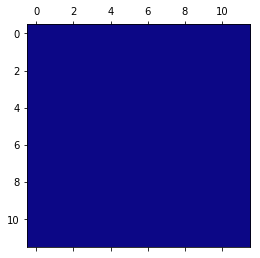

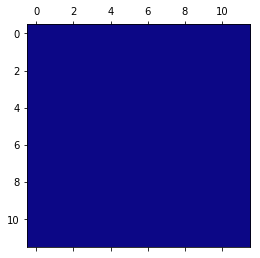

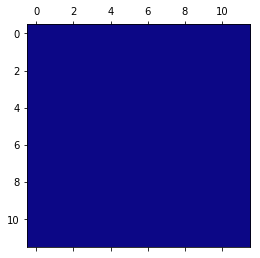

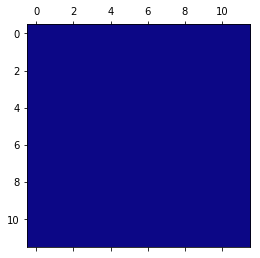

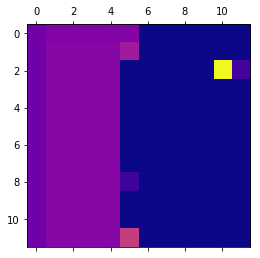

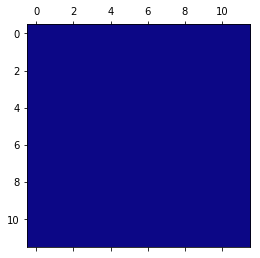

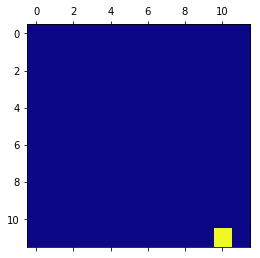

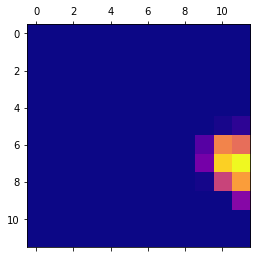

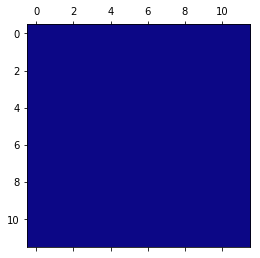

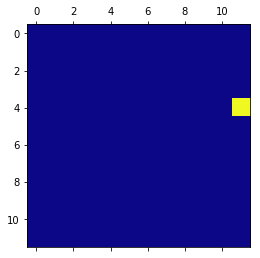

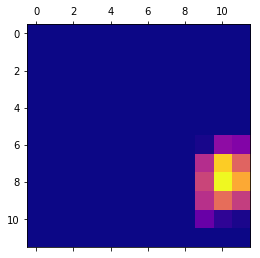

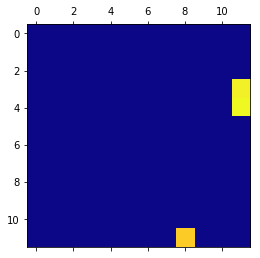

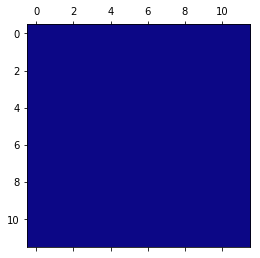

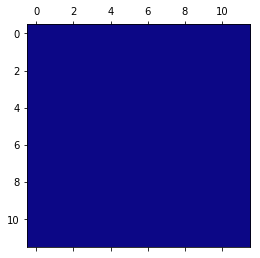

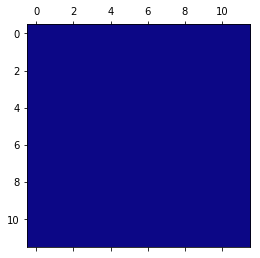

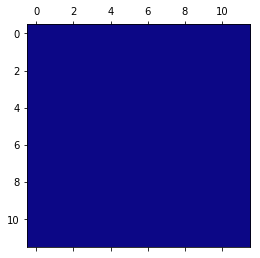

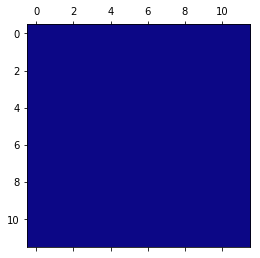

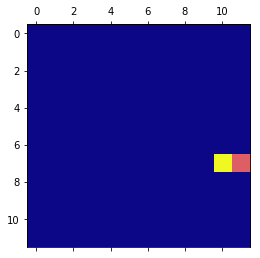

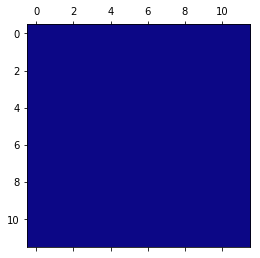

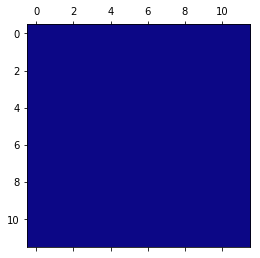

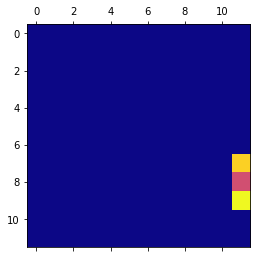

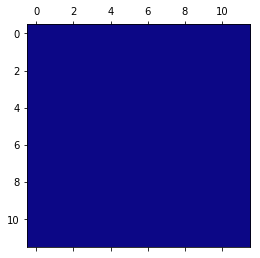

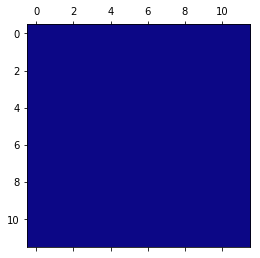

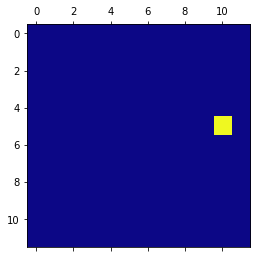

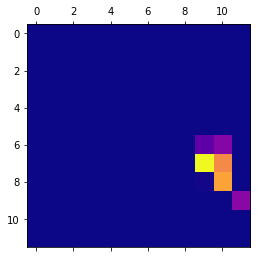

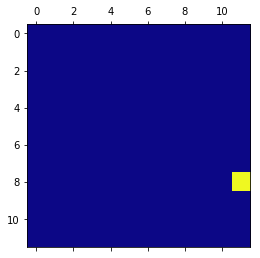

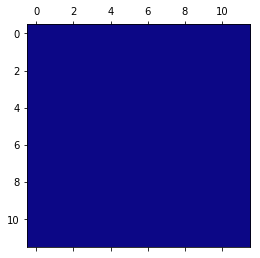

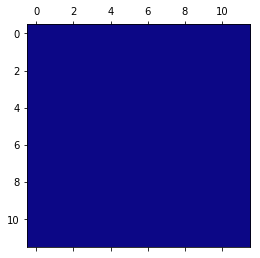

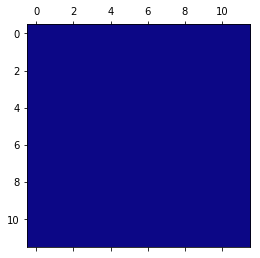

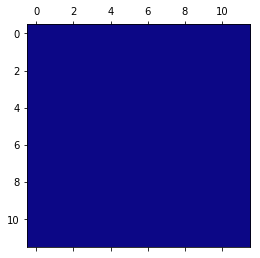

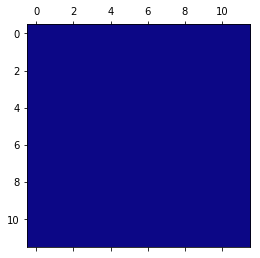

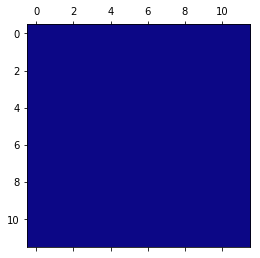

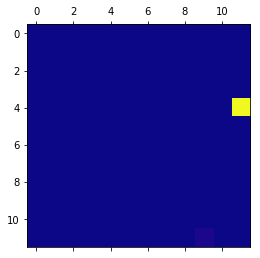

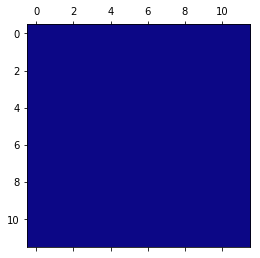

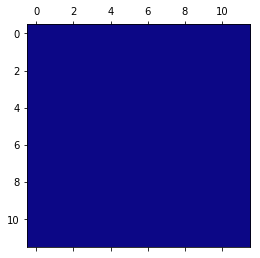

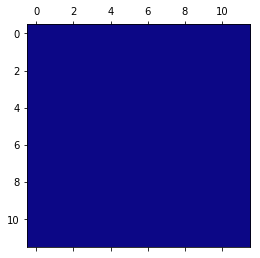

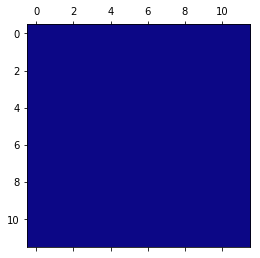

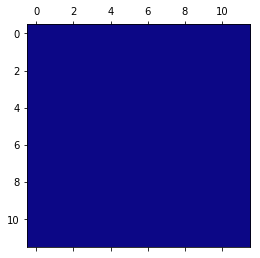

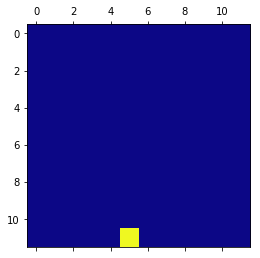

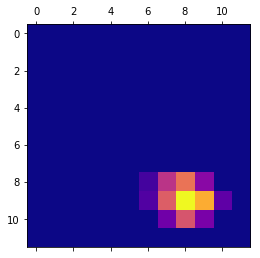

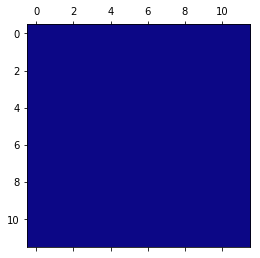

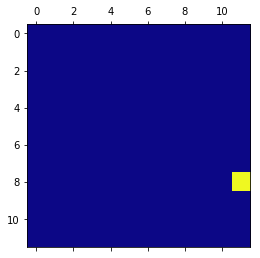

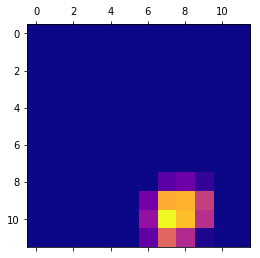

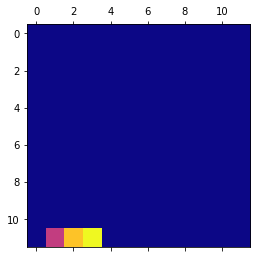

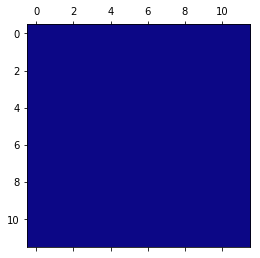

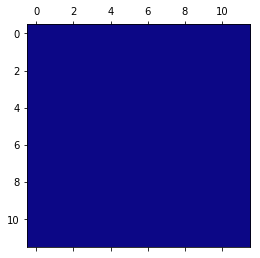

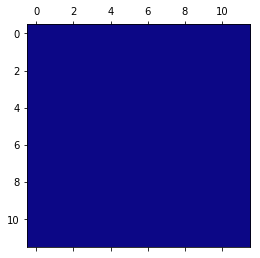

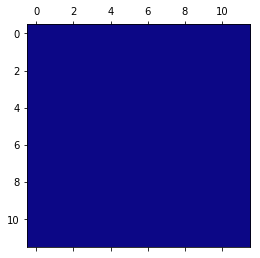

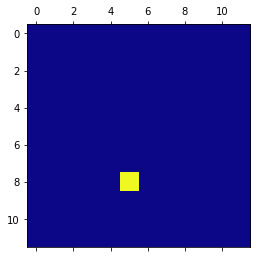

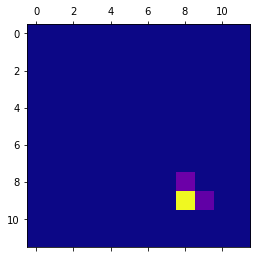

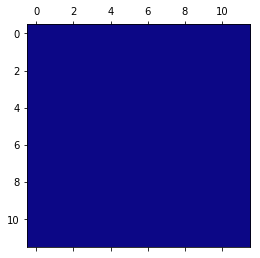

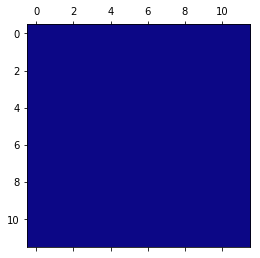

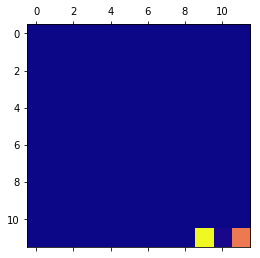

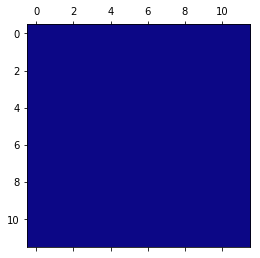

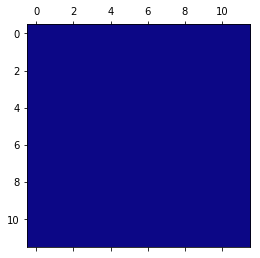

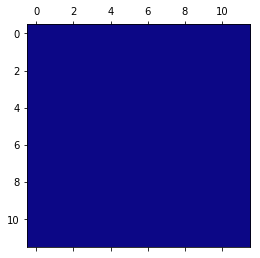

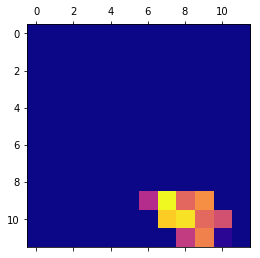

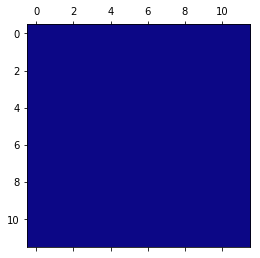

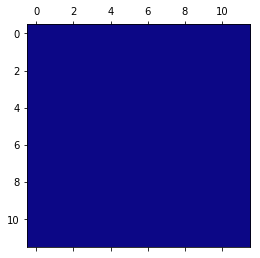

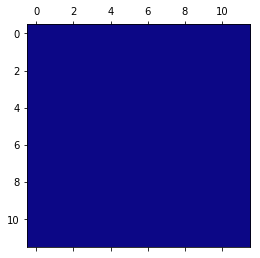

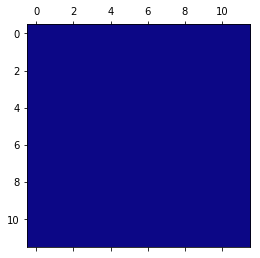

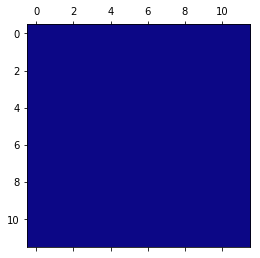

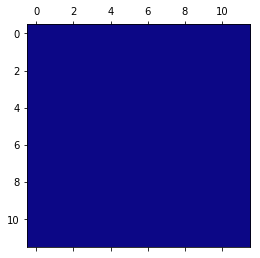

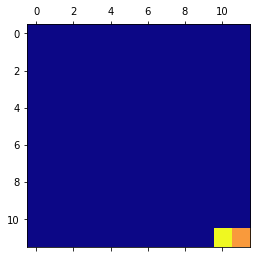

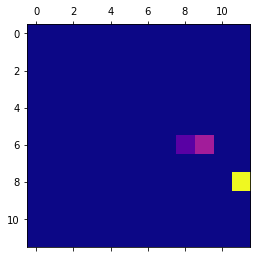

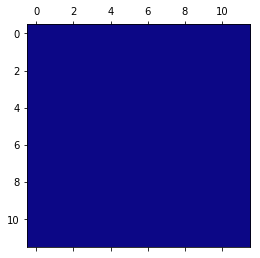

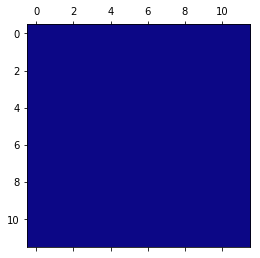

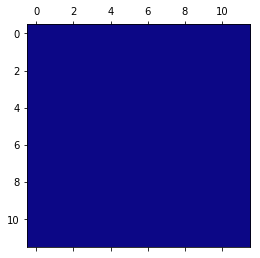

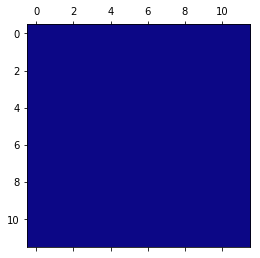

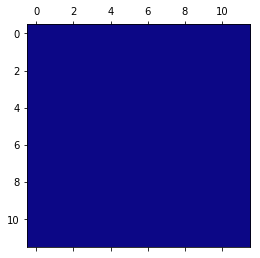

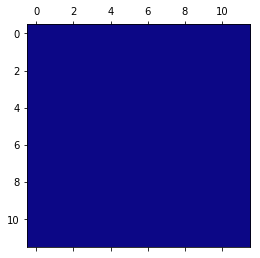

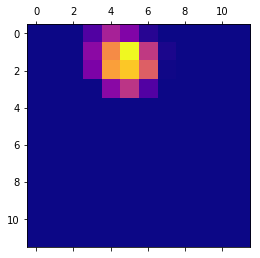

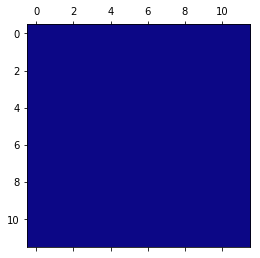

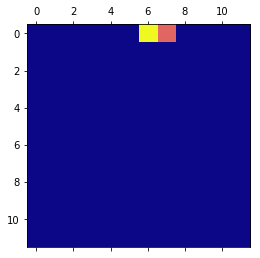

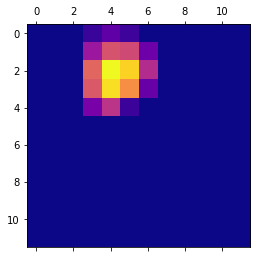

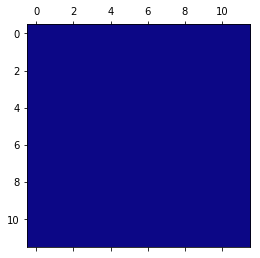

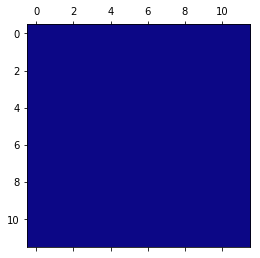

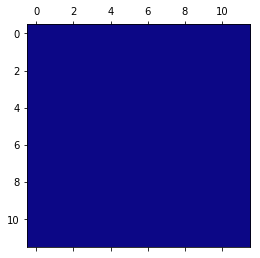

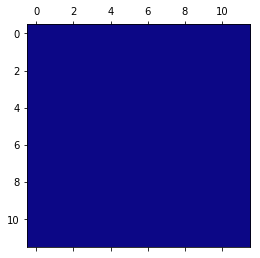

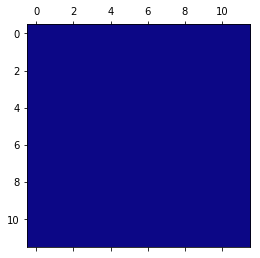

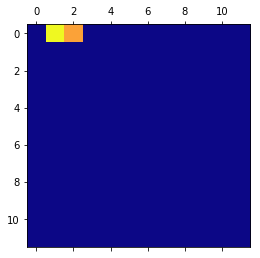

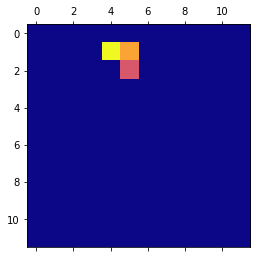

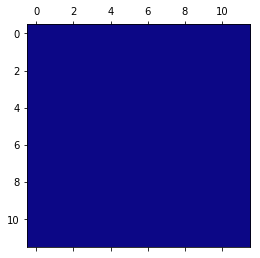

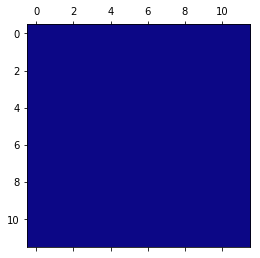

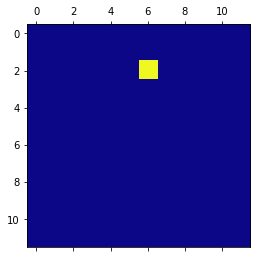

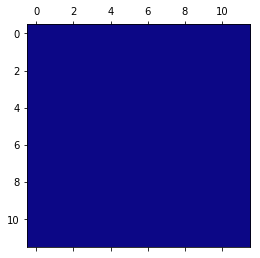

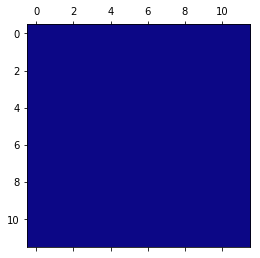

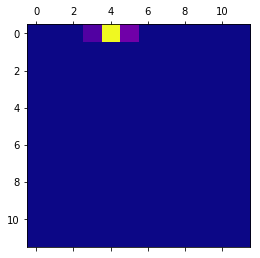

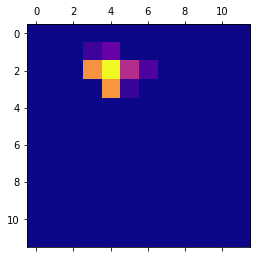

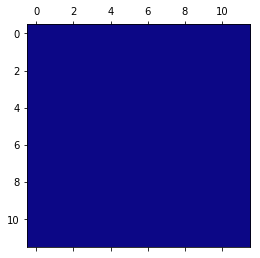

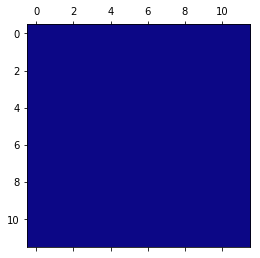

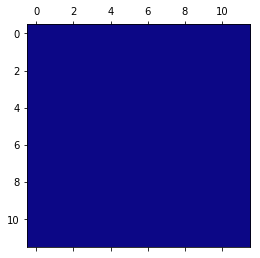

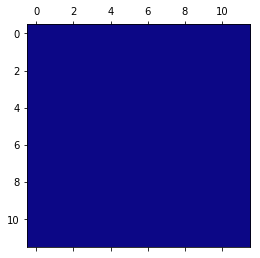

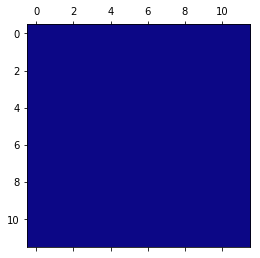

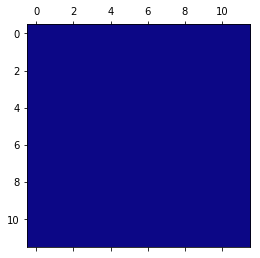

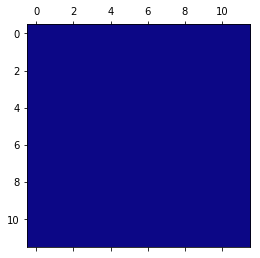

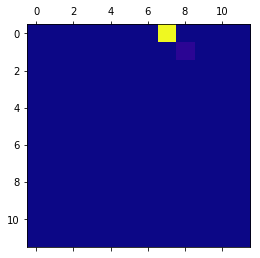

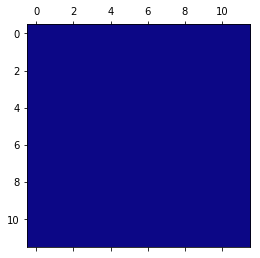

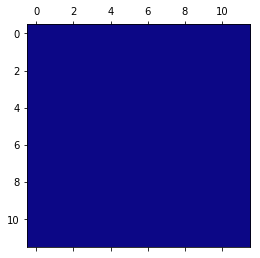

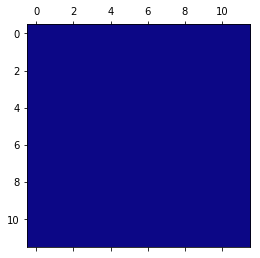

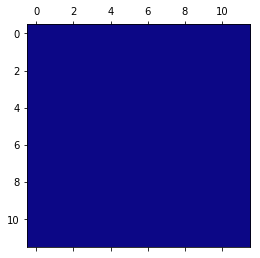

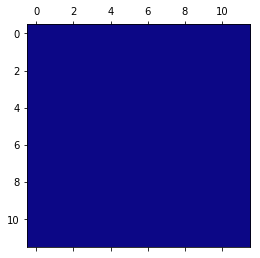

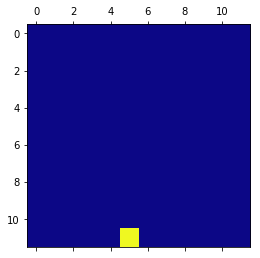

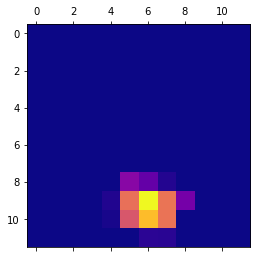

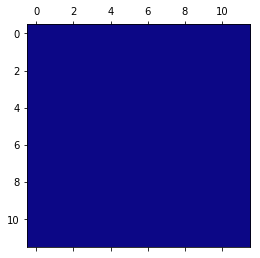

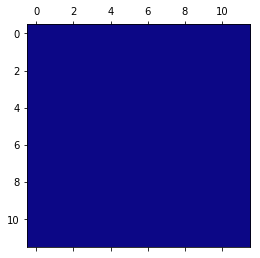

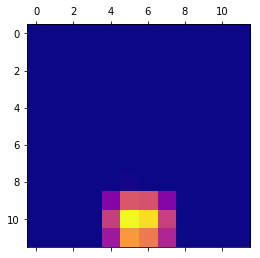

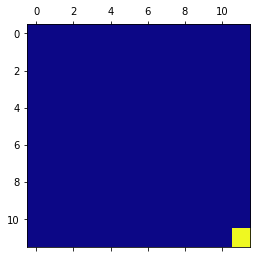

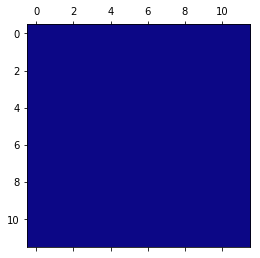

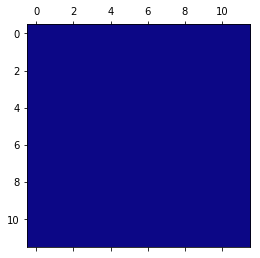

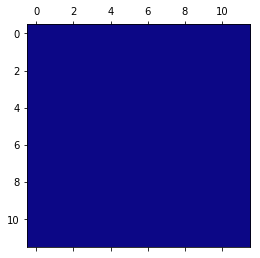

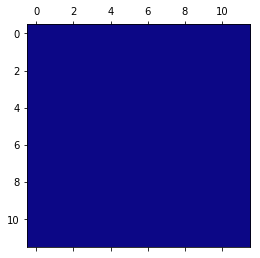

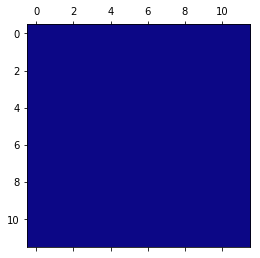

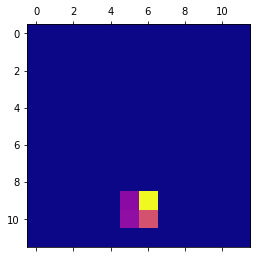

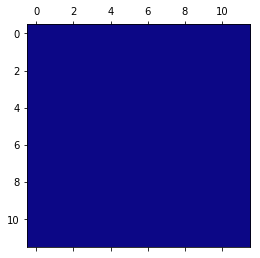

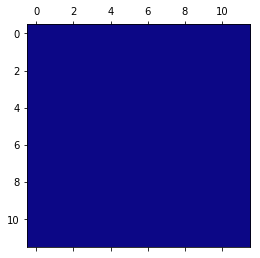

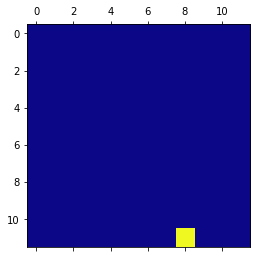

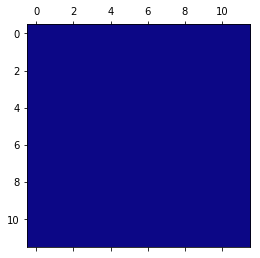

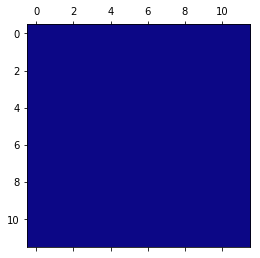

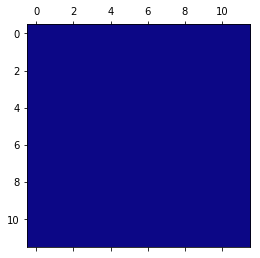

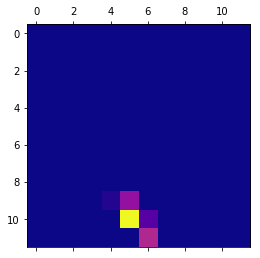

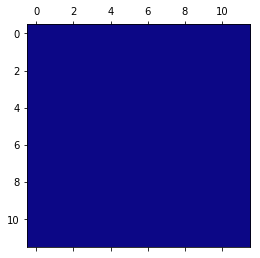

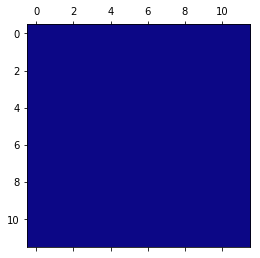

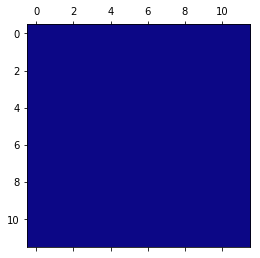

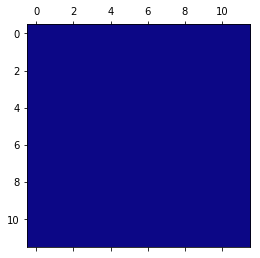

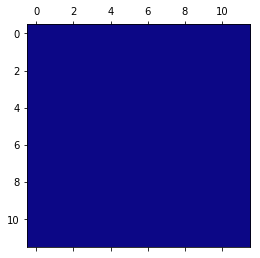

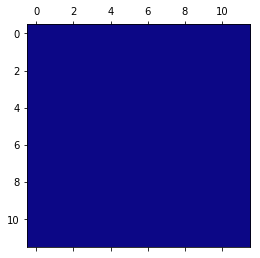

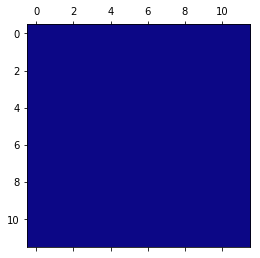

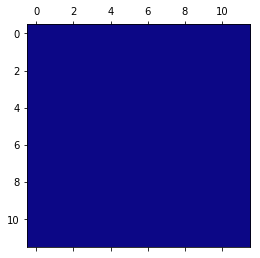

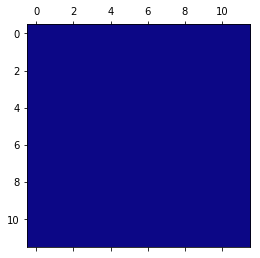

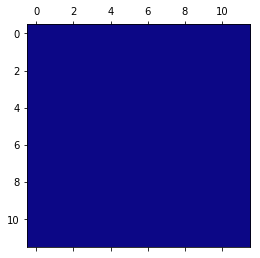

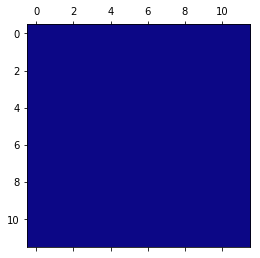

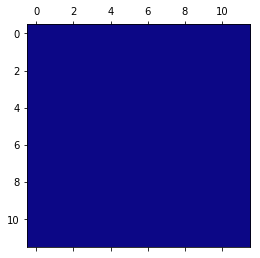

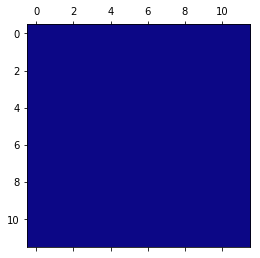

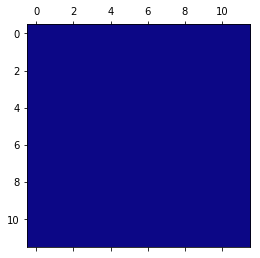

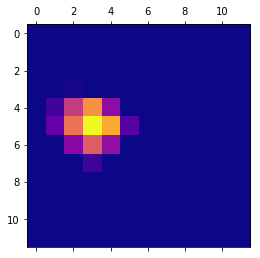

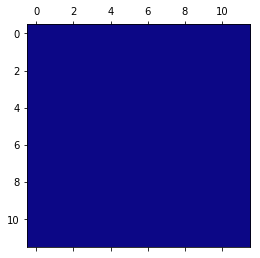

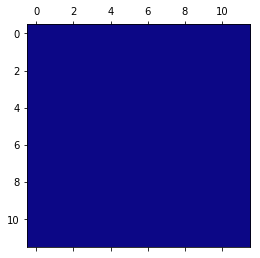

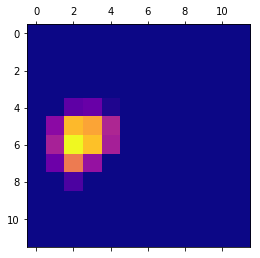

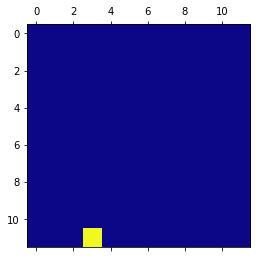

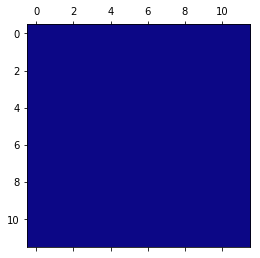

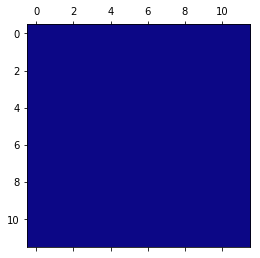

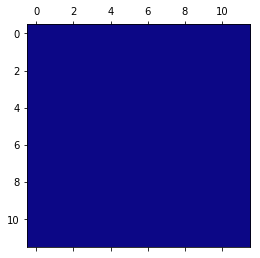

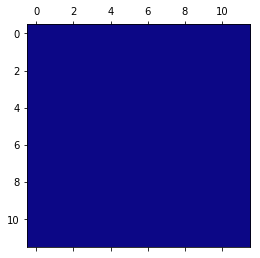

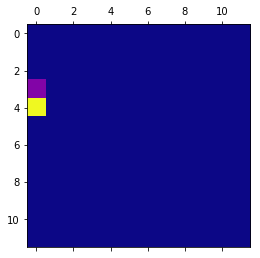

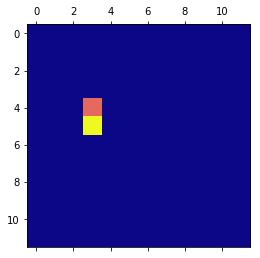

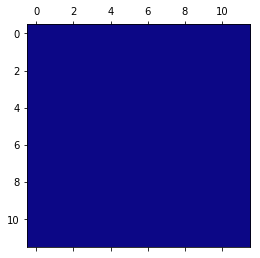

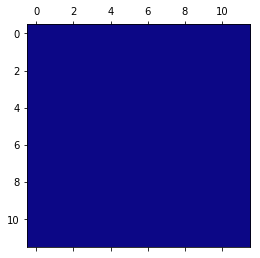

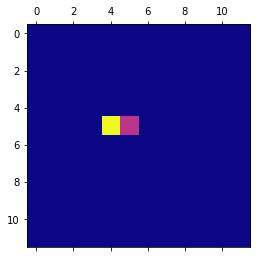

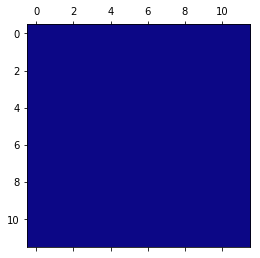

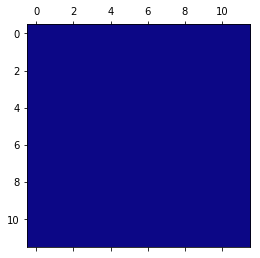

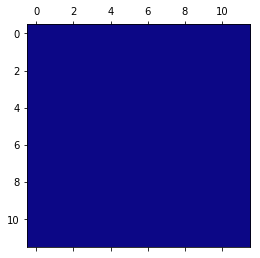

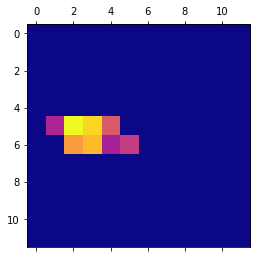

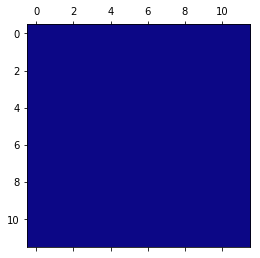

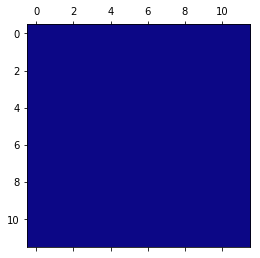

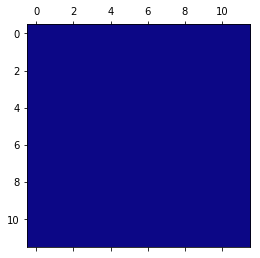

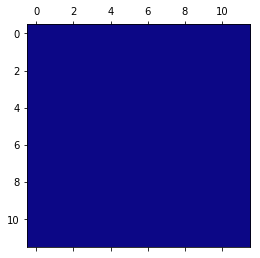

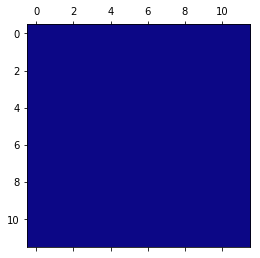

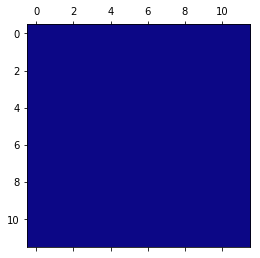

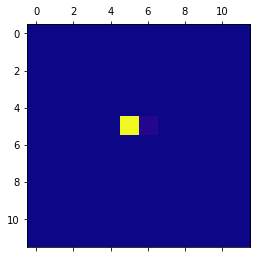

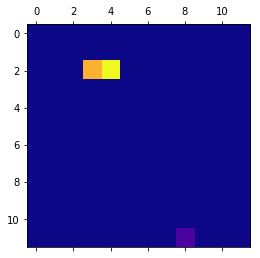

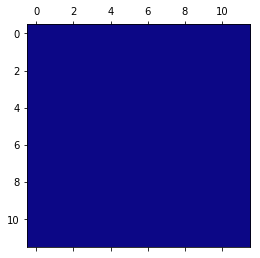

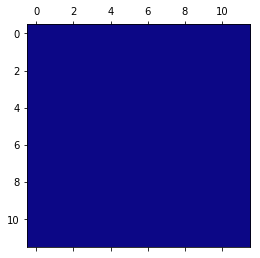

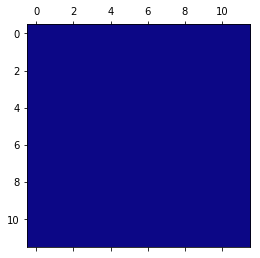

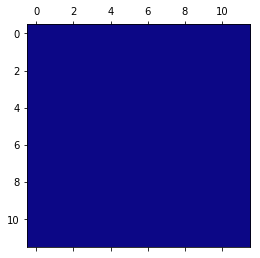

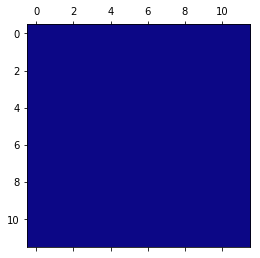

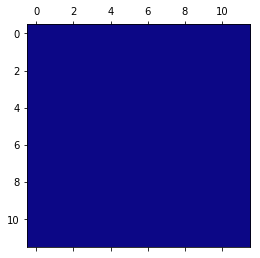

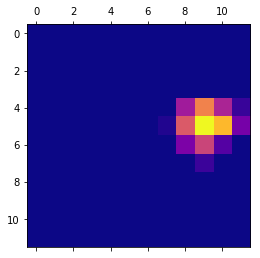

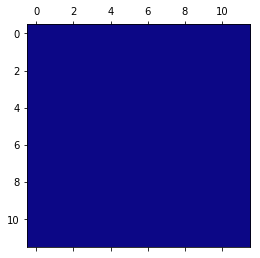

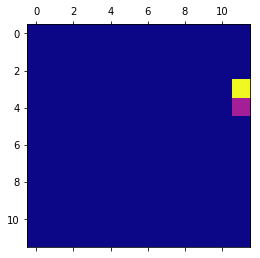

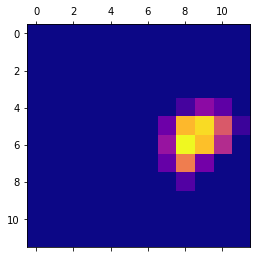

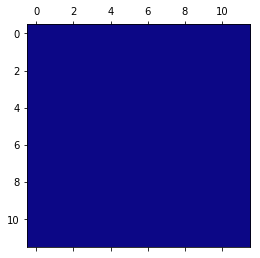

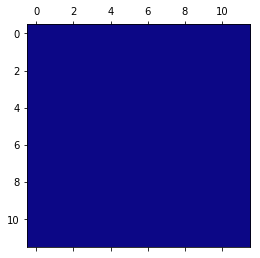

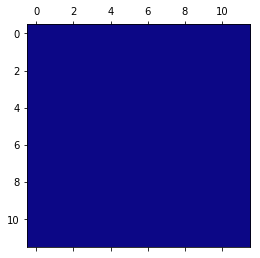

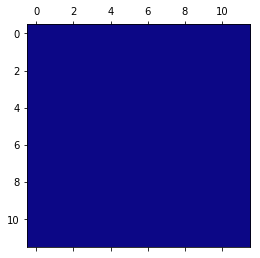

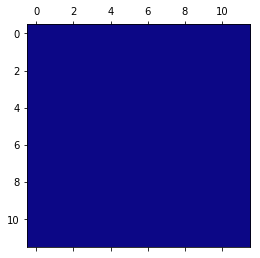

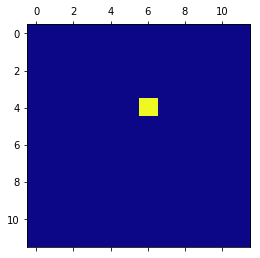

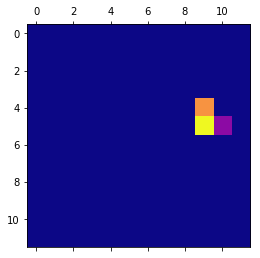

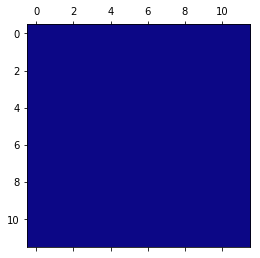

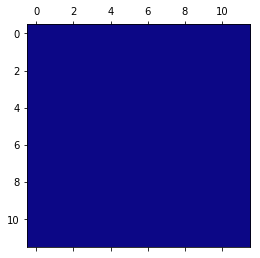

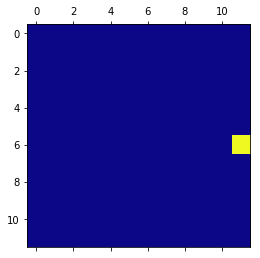

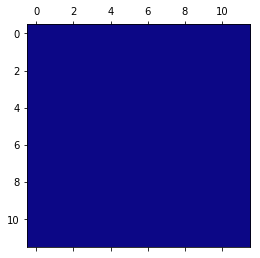

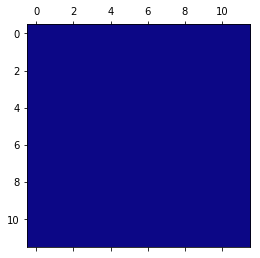

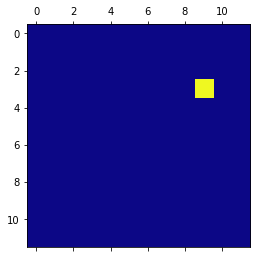

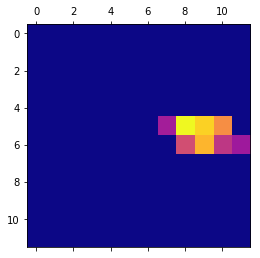

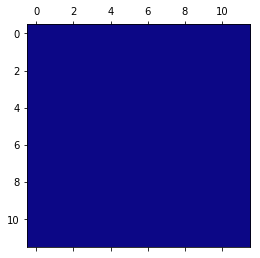

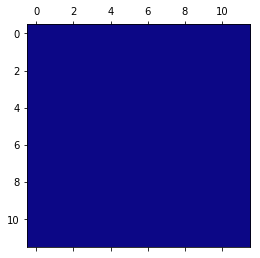

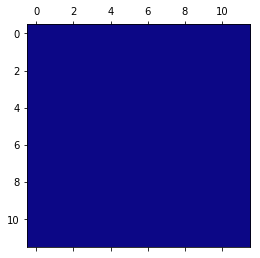

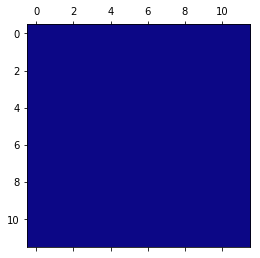

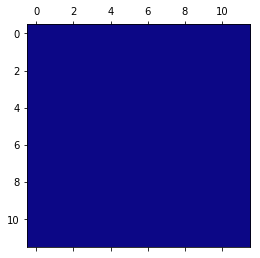

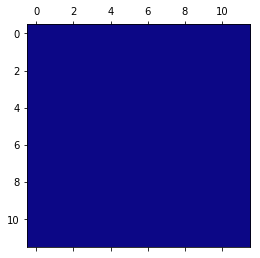

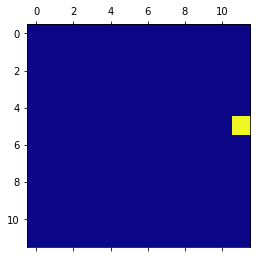

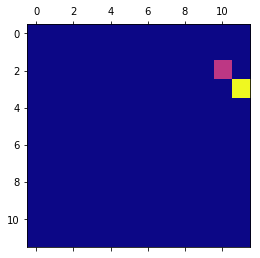

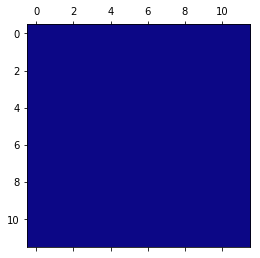

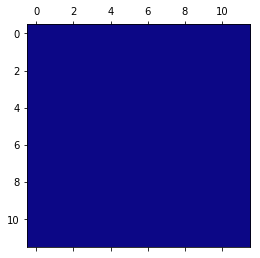

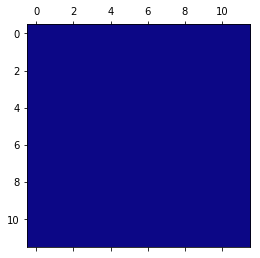

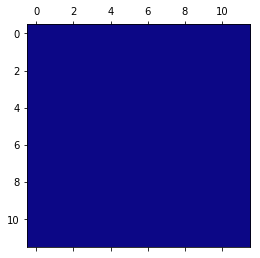

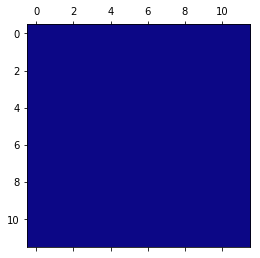

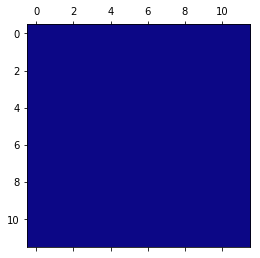

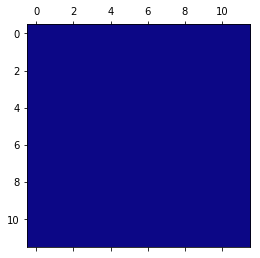

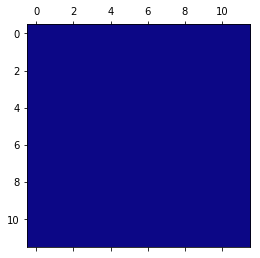

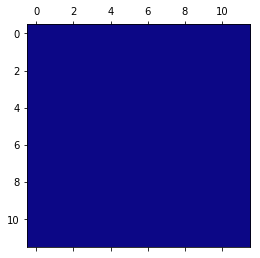

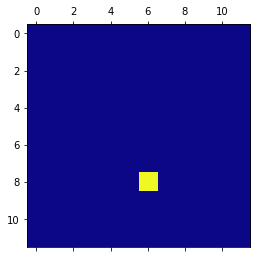

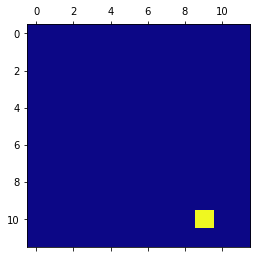

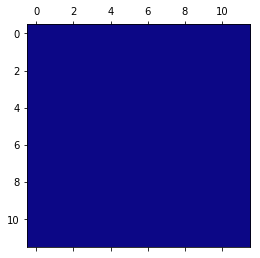

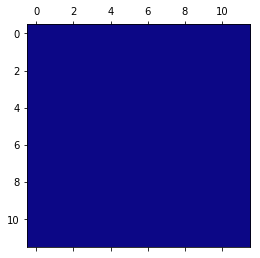

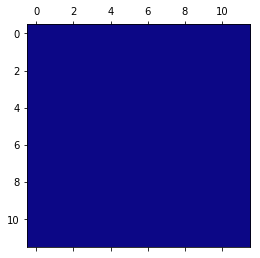

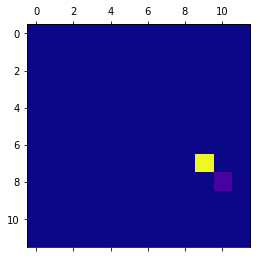

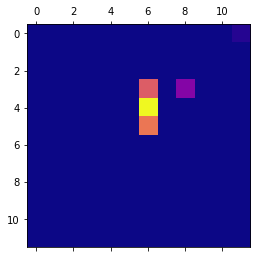

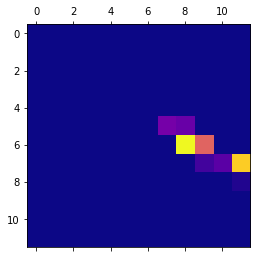

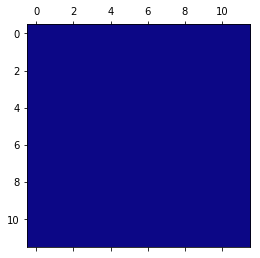

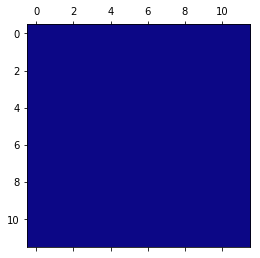

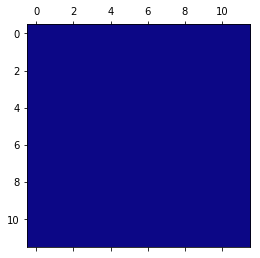

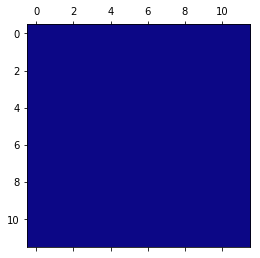

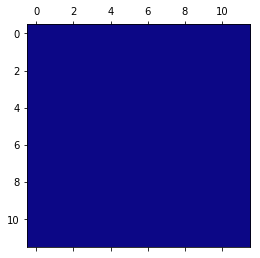

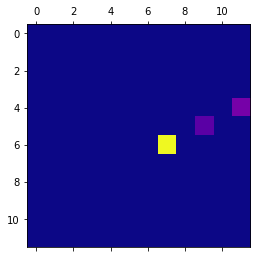

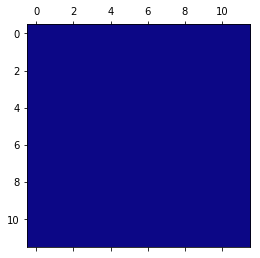

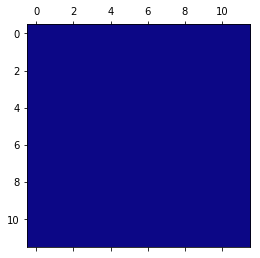

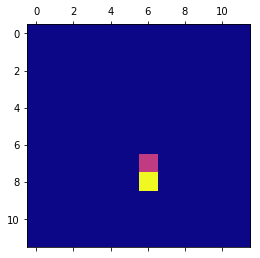

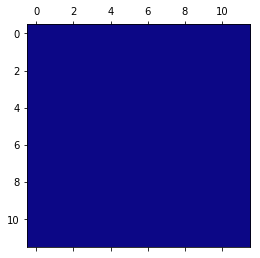

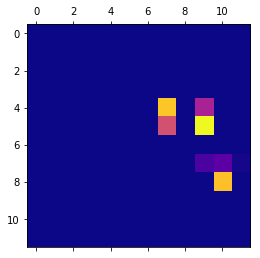

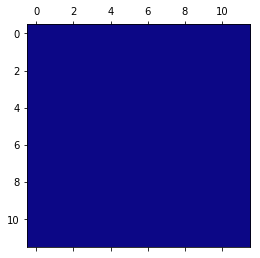

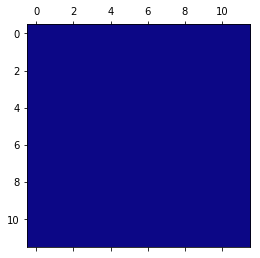

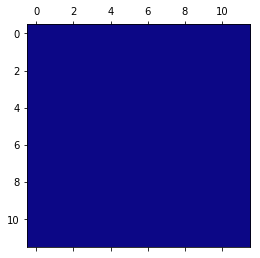

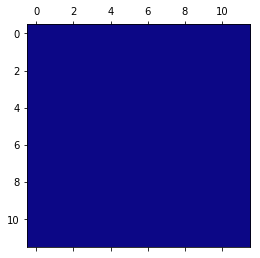

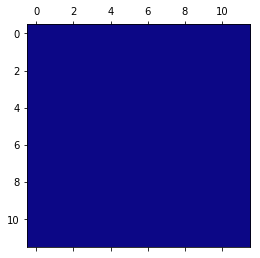

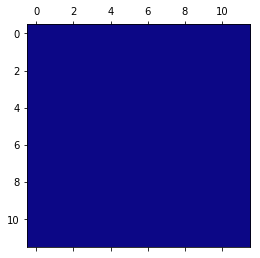

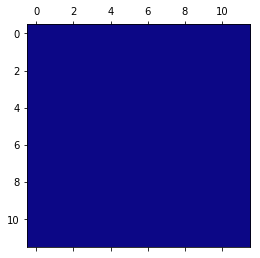

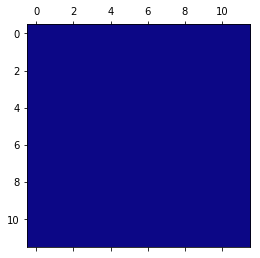

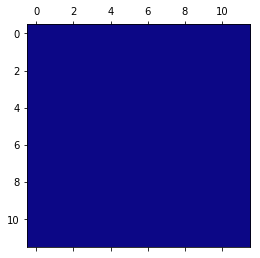

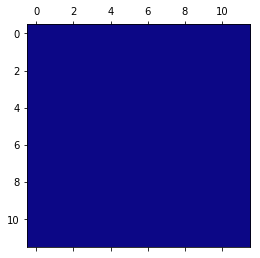

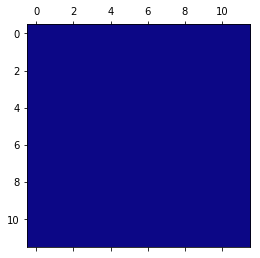

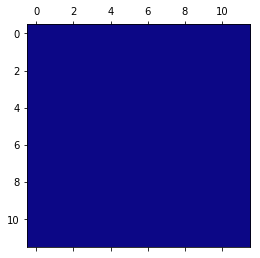

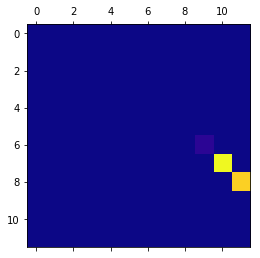

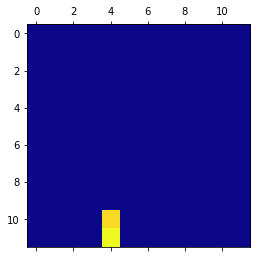

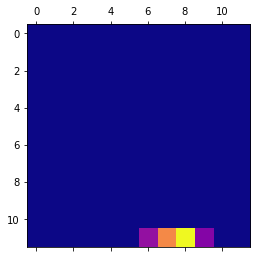

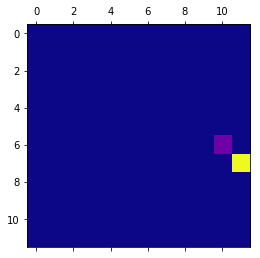

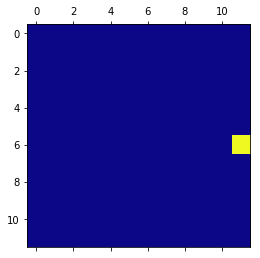

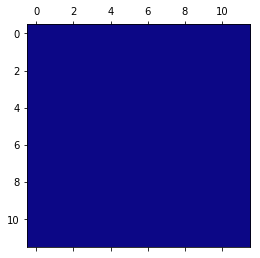

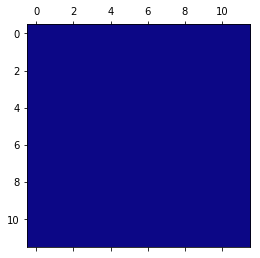

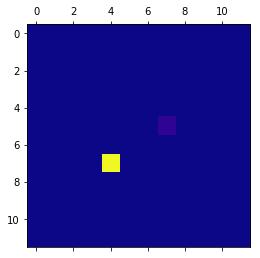

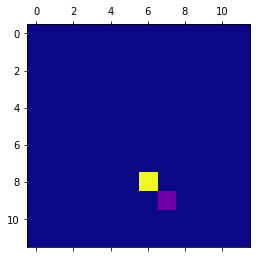

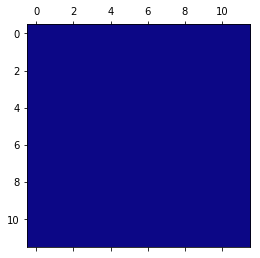

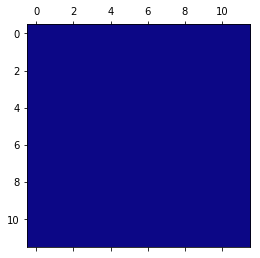

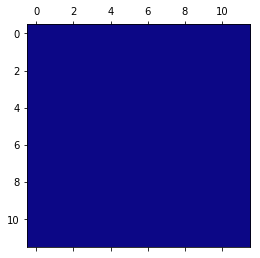

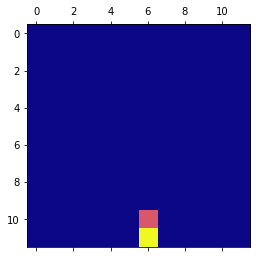

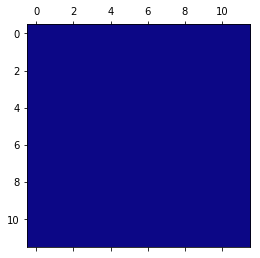

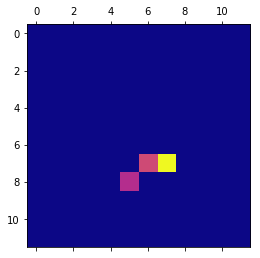

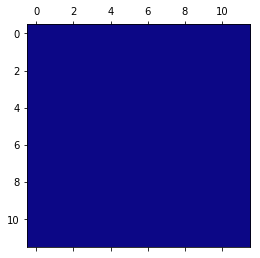

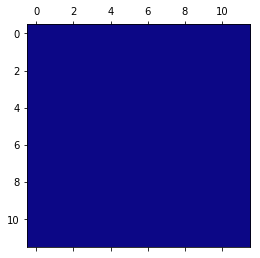

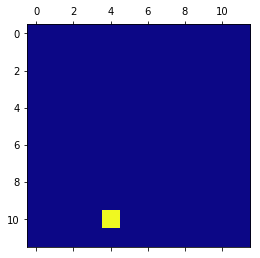

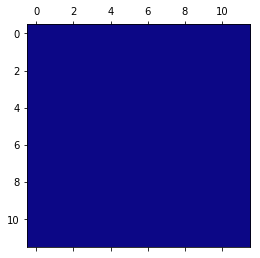

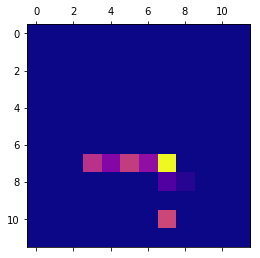

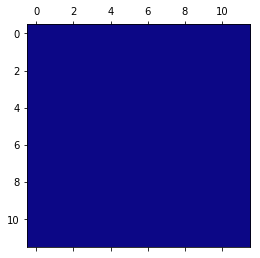

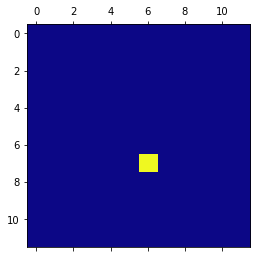

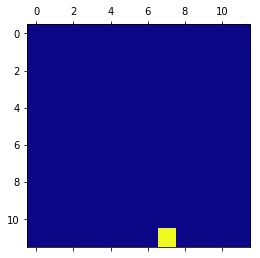

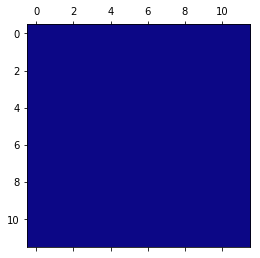

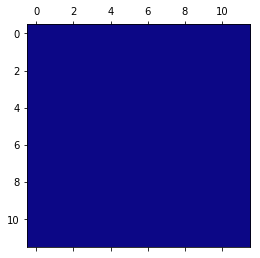

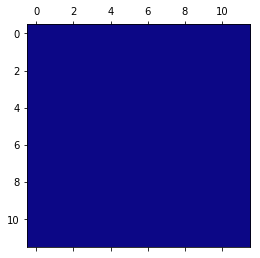

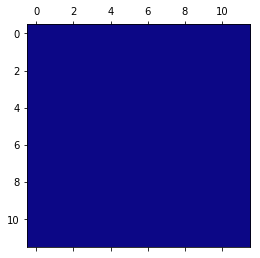

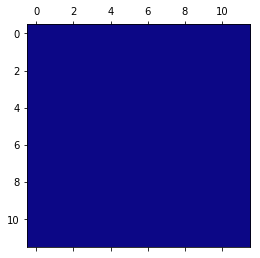

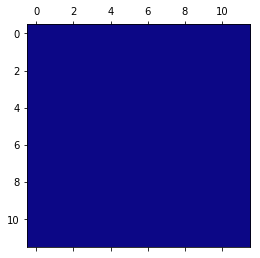

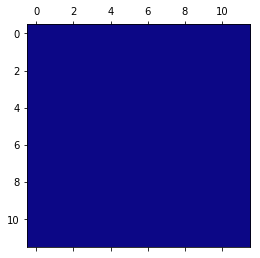

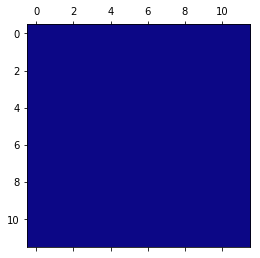

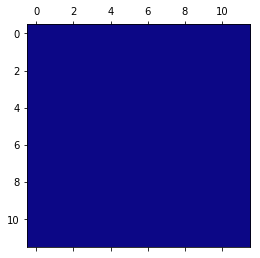

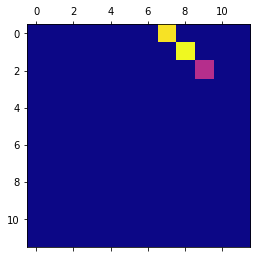

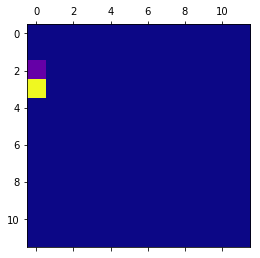

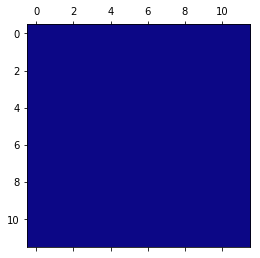

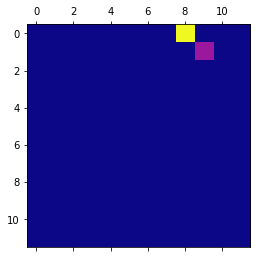

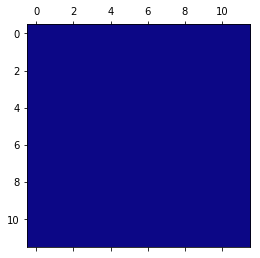

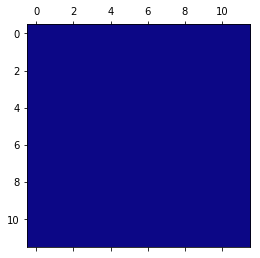

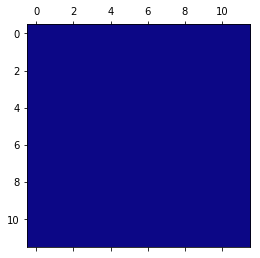

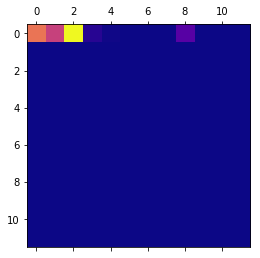

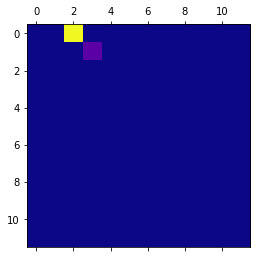

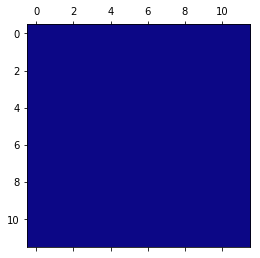

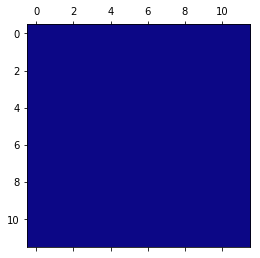

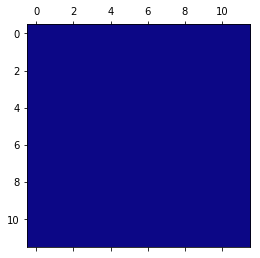

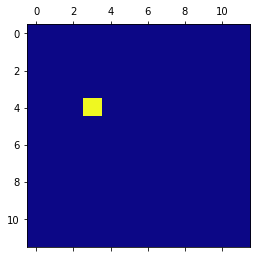

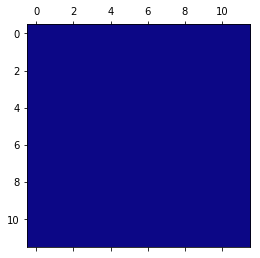

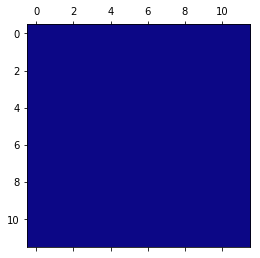

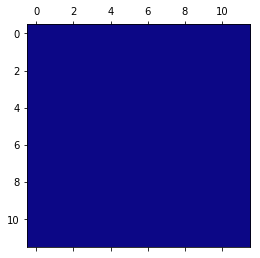

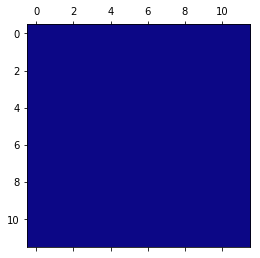

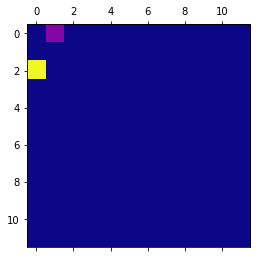

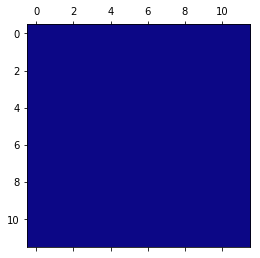

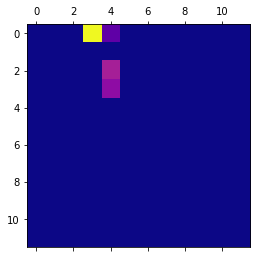

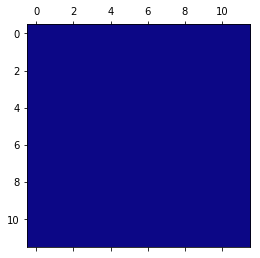

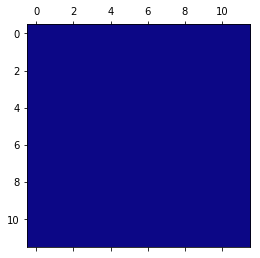

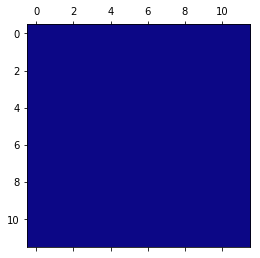

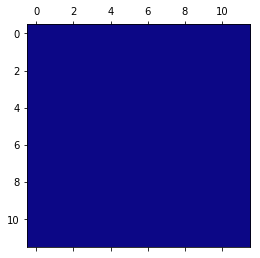

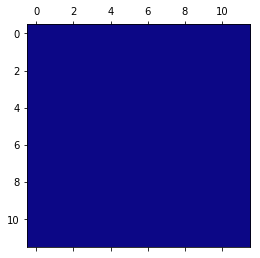

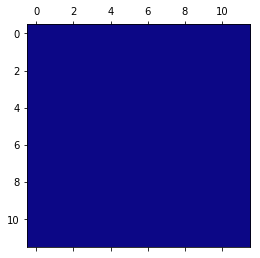

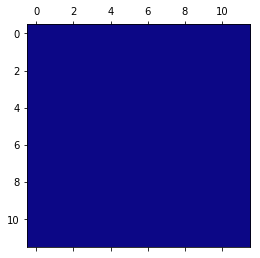

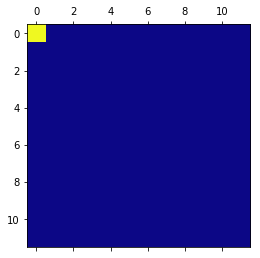

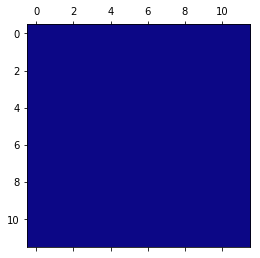

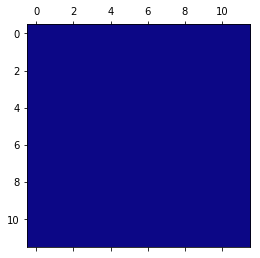

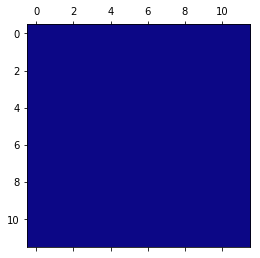

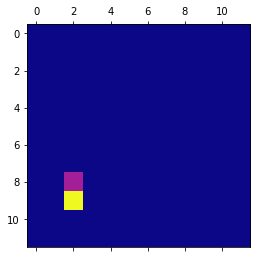

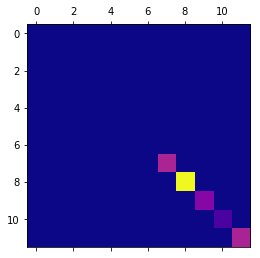

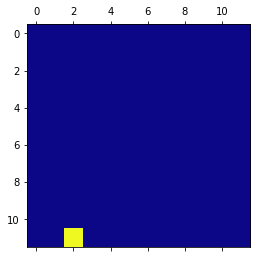

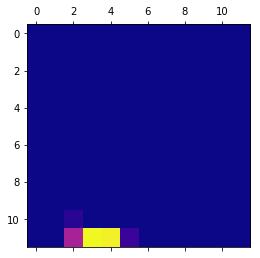

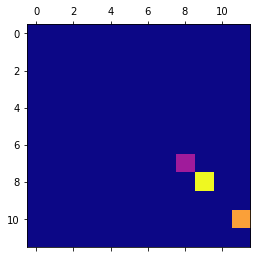

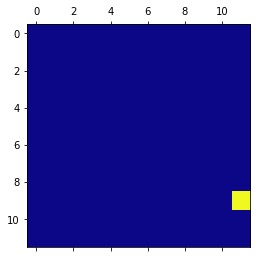

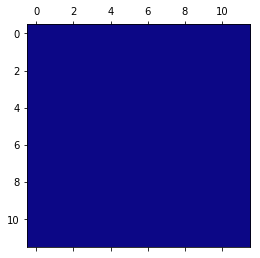

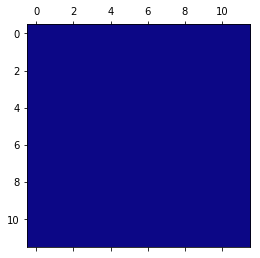

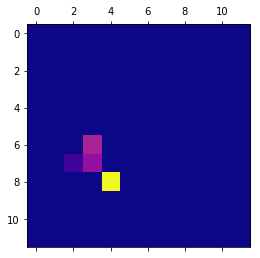

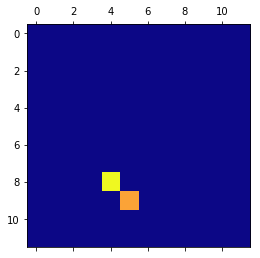

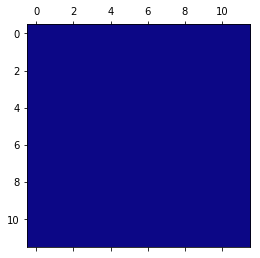

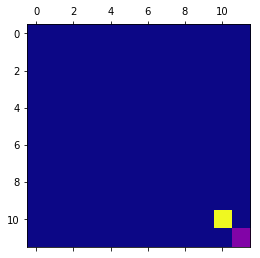

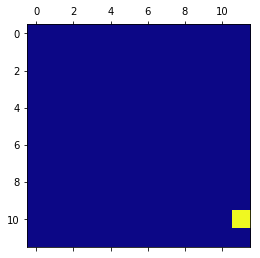

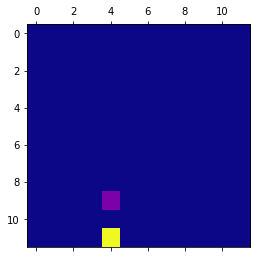

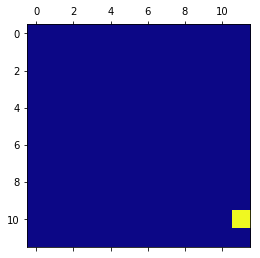

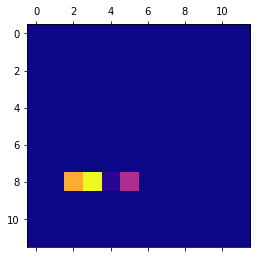

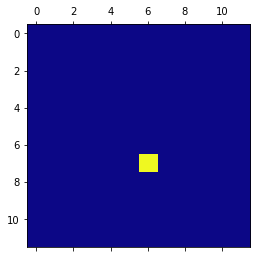

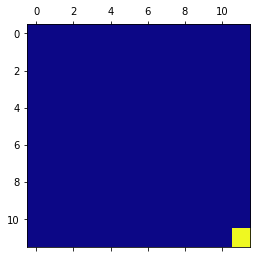

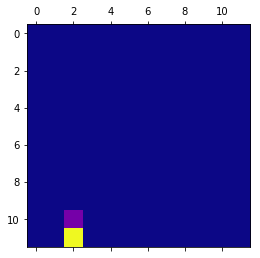

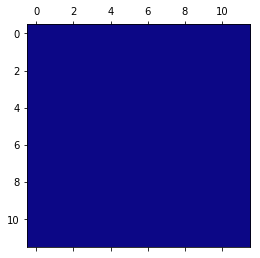

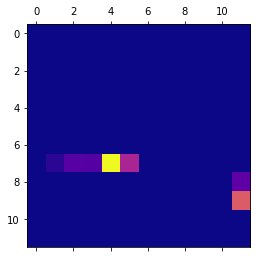

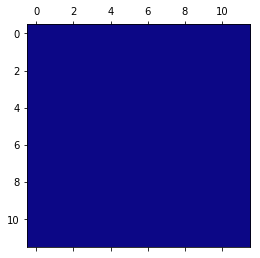

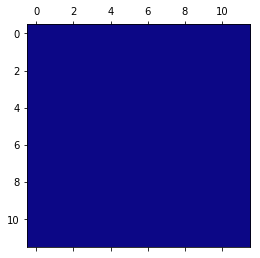

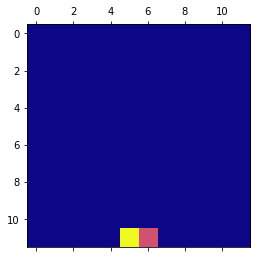

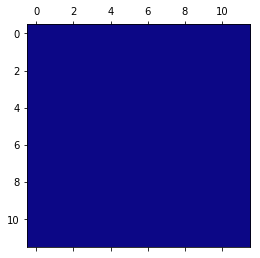

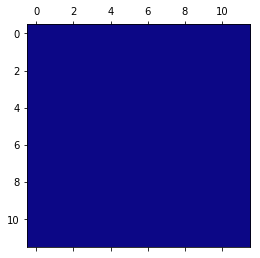

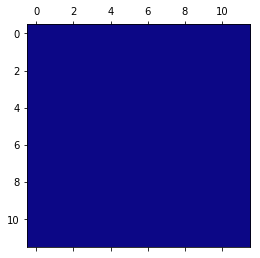

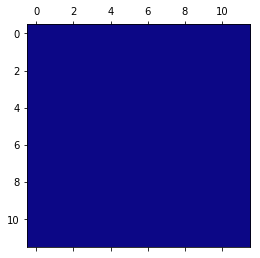

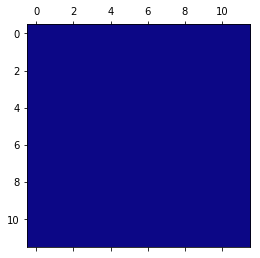

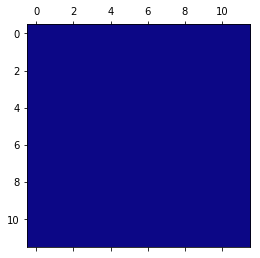

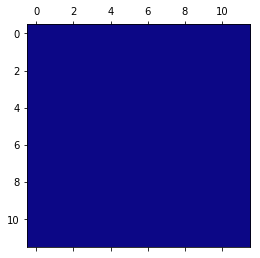

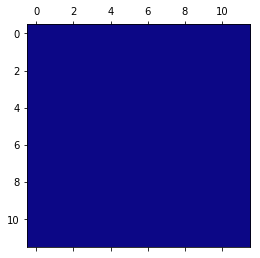

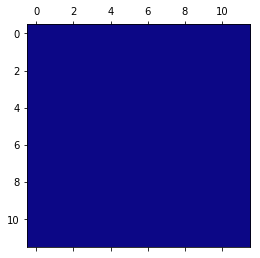

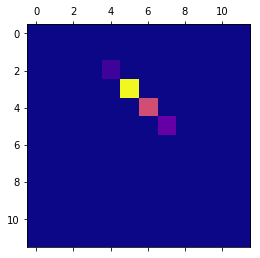

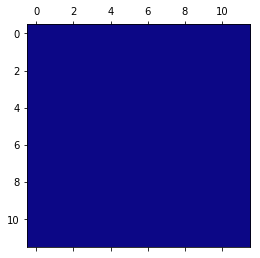

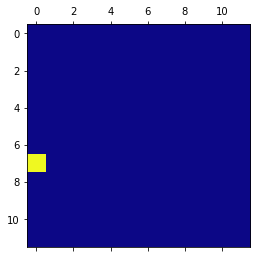

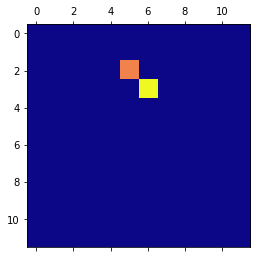

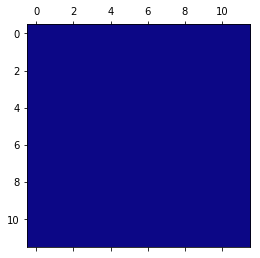

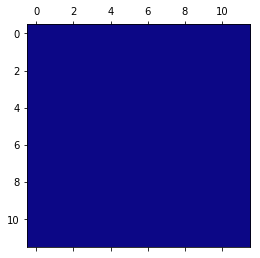

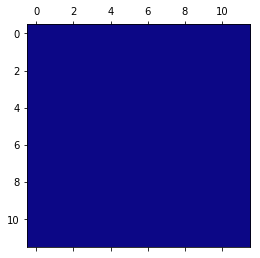

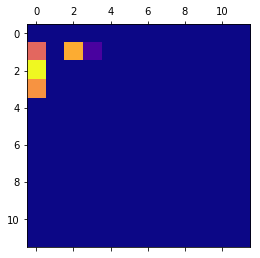

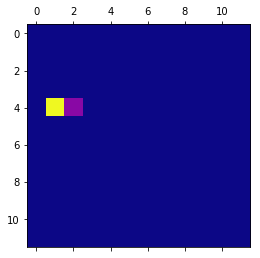

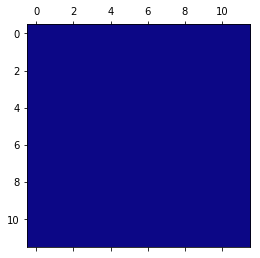

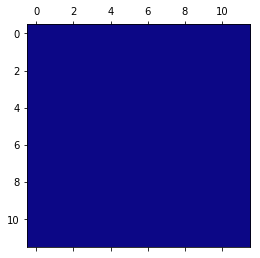

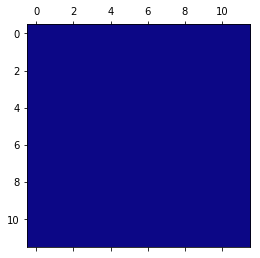

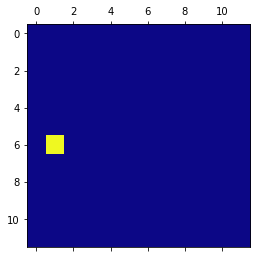

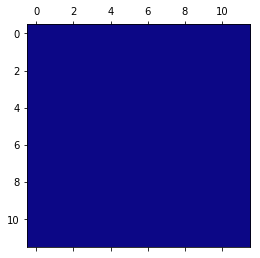

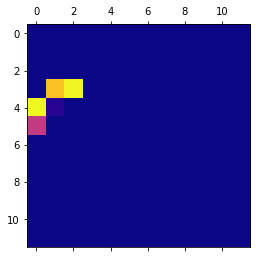

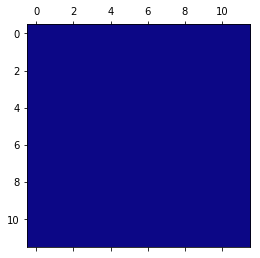

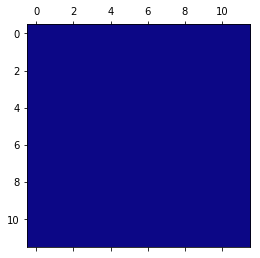

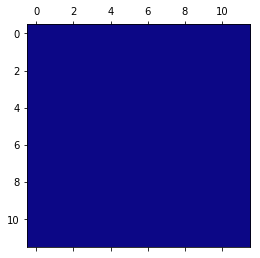

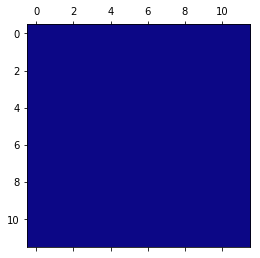

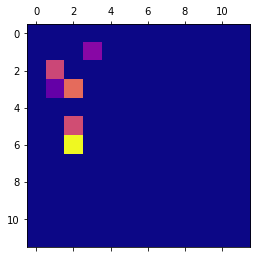

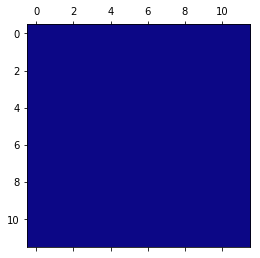

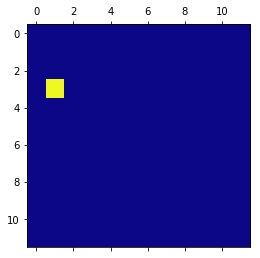

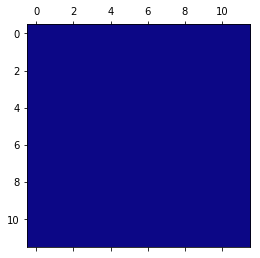

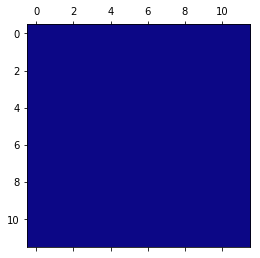

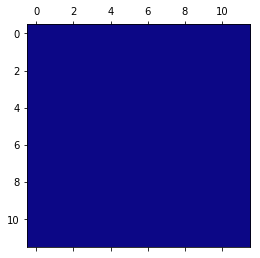

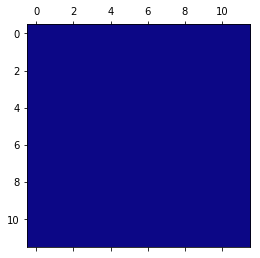

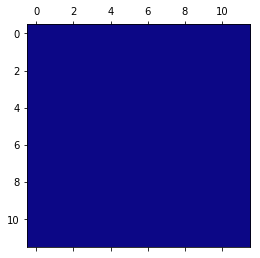

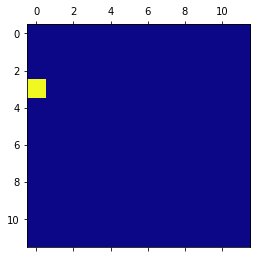

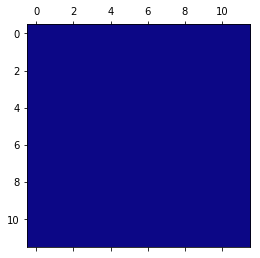

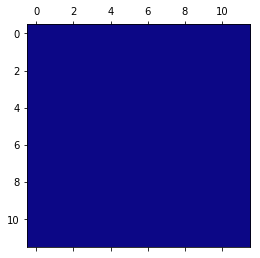

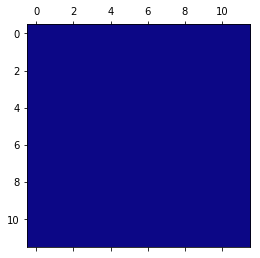

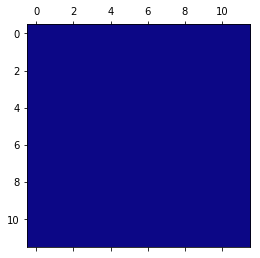

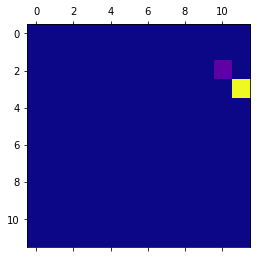

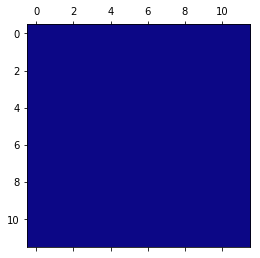

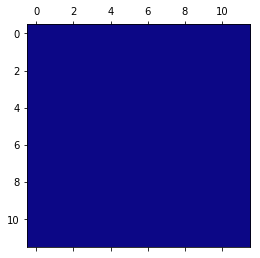

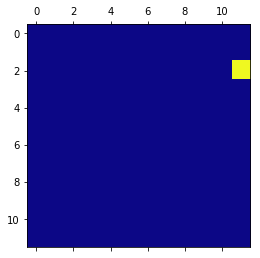

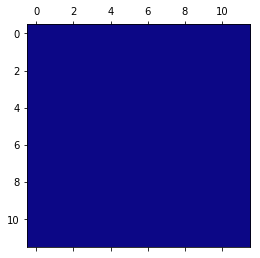

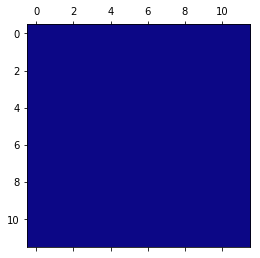

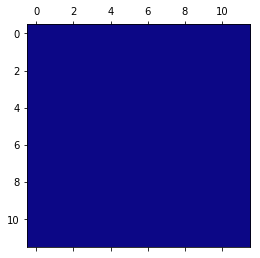

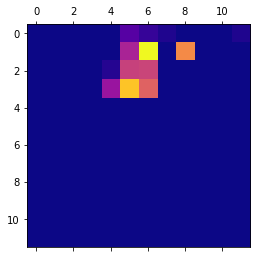

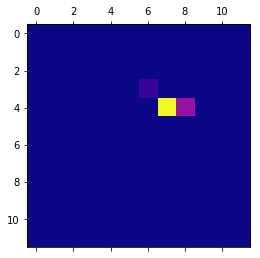

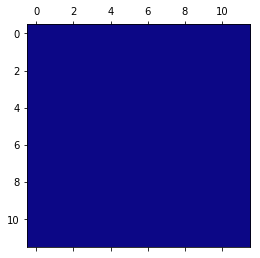

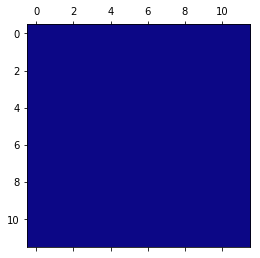

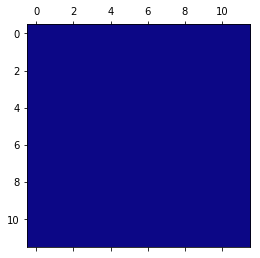

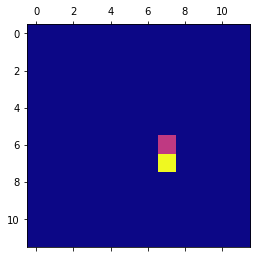

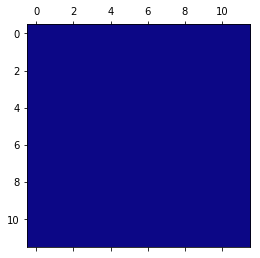

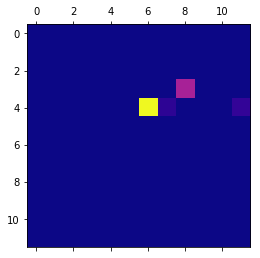

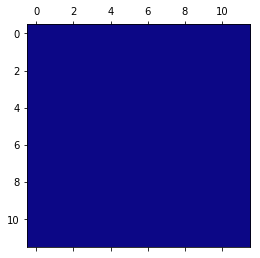

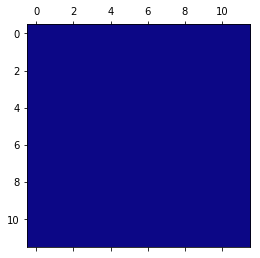

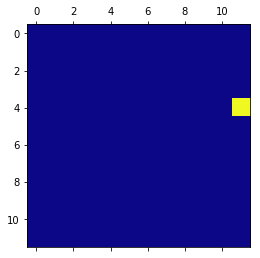

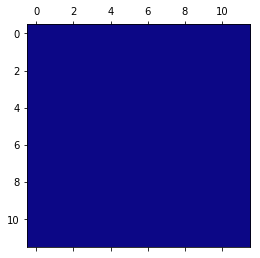

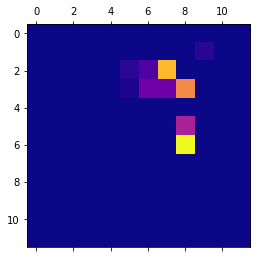

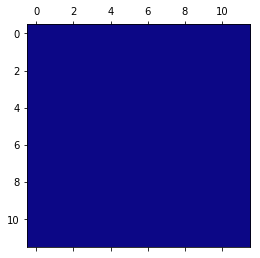

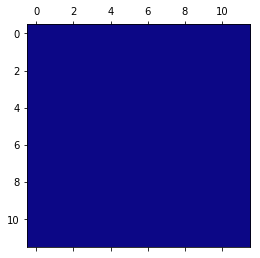

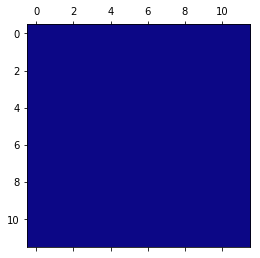

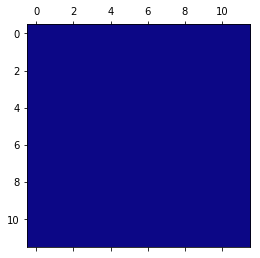

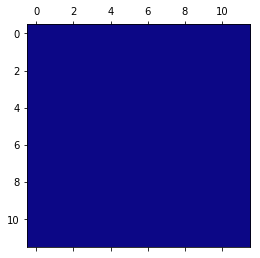

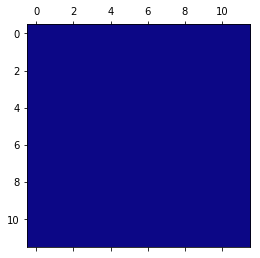

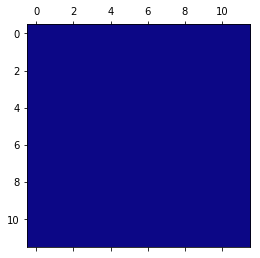

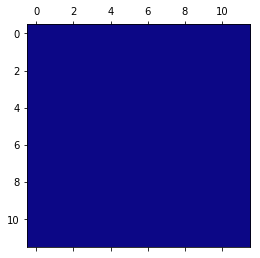

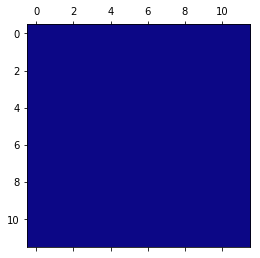

In [28]:
di = "activations/"
for i in range(len(a)):
    for j in range(a[i].shape[0]):
        for k in range(a[i].shape[-1]):
            plt.matshow(a[i][j,:,:,k],cmap='plasma')
            plt.savefig(di+ str(j)+"_"+str(i)+"_"+str(k)+".png")
            plt.show()

In [38]:
weight , biases = model.get_layer('conv2d_1').get_weights()

In [43]:
weight.shape

(3, 3, 3, 32)

In [49]:
final_weight_img=weight[0][:]
final_weight_img.shape

(3, 3, 32)

In [66]:
def deprocess_image(x):
    
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

array([[[0.559243  , 0.33735523, 0.4324219 ],
        [0.4812363 , 0.64790165, 0.48894036],
        [0.48606434, 0.49605468, 0.4685244 ]],

       [[0.45522806, 0.44327828, 0.5165221 ],
        [0.49228477, 0.35154635, 0.51300925],
        [0.39014253, 0.41286227, 0.448732  ]],

       [[0.5929742 , 0.70135975, 0.5475329 ],
        [0.41165107, 0.3691476 , 0.51062524],
        [0.56728345, 0.75738025, 0.6206981 ]]], dtype=float32)

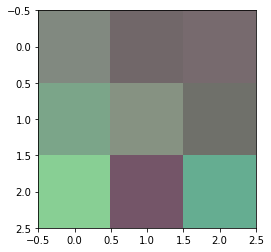

In [68]:
for i in range(weight.shape[-1]):
    plt.imshow(deprocess_image(weight[:,:,:,i]))
#     plt.show()

# # cv2.waitKey(0)
# # cv2.destroyAllWindows()
im = weight[:,:,:,0]
im
# im.shape

In [92]:
for i in range(1,3):
    print (model.layers[i].get_weights()[0].shape) 
print("huha")
for i in range(5,11):
    print (model.layers[i].get_weights()[0].shape)

(3, 3, 3, 32)
(3, 3, 32, 32)
huha
(1, 1, 32, 32)
(1, 1, 32, 32)
(3, 3, 32, 32)
(1, 1, 32, 32)
(3, 3, 32, 32)
(3, 3, 32, 32)


In [98]:
def generate_pattern(layer_name, filter_index, size=28):
    
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3))  + 128.
    step = 1.
    for i in range(80):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

In [99]:
layer_name = 'conv2d_1'
size = 3
margin = 2
results = np.zeros((8 * size + 2 * margin, 8 * size + 2 * margin, 3))

for i in range(8):
    for j in range(8):
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img
        
plt.figure(figsize=(20, 20))
plt.imshow(results)
plt.show()

ValueError: slice index 32 of dimension 3 out of bounds. for 'strided_slice_19' (op: 'StridedSlice') with input shapes: [?,28,28,32], [4], [4], [4] and with computed input tensors: input[1] = <0 0 0 32>, input[2] = <0 0 0 33>, input[3] = <1 1 1 1>.